## Install Libraries & Master Functions

In [1]:
# Core modules import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm

# Scrap/APIs modules
import requests
from bs4 import BeautifulSoup
import quandl
import investpy

#import missingno as msno
from IPython.core import display as ICD
from datetime import date

import pandas_ta as ta


In [2]:
# bitinfochart scrap function - copied from a user in medium.com

URL_array  = set()
def link2df(URL,col_name,join_df,join=True,check_column=True,check_URL = True,clear_URL_array=False,show_details=False):
    '''This function scraps the given link and returns dataframe
    __________
    Parameters:
        URL(string): URL to be scrapped from bitcoin website
        col_name(string): column name for dataframe
        join_df(variable)= dataframe withwhich output dataframe will be left joined on Date
        join(boolean)= iF True,join, else don't join
        check_column(boolean)= check if column name already exists
        check_URL(boolean)= check if URL is already processed
        clear_URL_array(boolean)= if true URL_processed array will be cleared
        show_details(boolean)= various details wil be printed such as scrapping first and last details, df head & df tail     
        '''
        
    print(f'processing {col_name}')

    #clear URL append array
    if clear_URL_array==True:
        URL_array.clear()

    #set join parameters if false
    if join == False:
        join_df = None
        check_column=False

    #process column name by making it lowercase and replacing spaces,commas, full stops
    col_name = col_name.lower().replace(',','').replace(" ", "_").replace(".", "_")

    #col_name validation if exists already
    if check_column==True and col_name in list(join_df.columns):
        print(f'column {col_name} already esists in dataframe, stopped here')
        return join_df

    #URL validation if processes already
    elif check_URL==True and URL in list(URL_array):
        print(f'{URL} is already processed, stopped here')
        return join_df 

    #web scrapping
    page = requests.get(URL)
    soup = page.content
    soup = str(soup)
    scraped_output = (soup.split('[[')[1]).split('{labels')[0][0:-2]
    if show_details == True:
        print('head')
        print({scraped_output[0:30]})
        print('tail')
        print({scraped_output[-30:]})

    processed_str = scraped_output.replace('new Date(','')
    processed_str = processed_str.replace(')','')
    processed_str = processed_str.replace('[','')
    processed_str = processed_str.replace(']','')
    processed_str = processed_str.replace('"','')

    processed_str_list = processed_str.split(',')
    date_list,data_list = processed_str_list[::2],processed_str_list[1::2]

    #validate column lengths
    if len(date_list)!=len(data_list):
        print(f'date & data length:{len(date_list),len(data_list),len(date_list)==len(data_list)}')

    #convert list data to a dataframe
    if join == False:
        df = pd.DataFrame()
        df['Date'] = pd.to_datetime(date_list)
        df[col_name] = data_list
        URL_array.add(URL)
        if show_details == True:
            print('*'*100)
            print('df head')
            print(df.head(1))
            print('*'*100)
            print('df tail')
            print(df.tail(1))
            print('*'*100)
            print(f'df shape{df.shape}')
            print('='*100)
            
        return df

    elif col_name not in list(join_df.columns) and join == True:
        df = pd.DataFrame()
        df['Date'] = pd.to_datetime(date_list)
        df[col_name] = data_list
        join_df = pd.merge(join_df,df,on=['Date'],how='left')
        URL_array.add(URL)
        if show_details == True:
            print('*'*100)
            print('df head')
            print(df.head(1))
            print('*'*100)
            print('df tail')
            print(df.tail(1))
            print('*'*100)
            print(f'output df shape= {df.shape},joined_df shape = {join_df.shape}')
            print('='*100)
            print(f'Number of duplicate columns in dataframe {df.columns.duplicated().sum()}')
            print('='*100)
    
        return join_df

## Web scraping

### 01.BTC Price

In [3]:
final_df = investpy.get_crypto_historical_data(crypto='bitcoin',from_date='01/01/2013',to_date='22/04/2022')
final_df = final_df.reset_index()
final_df.drop(['Currency','Volume'],inplace=True,axis=1)
final_df.columns = ['Date','opening_price','highest_price','lowest_price','closing_price']
final_df

Date  opening_price  highest_price  lowest_price  closing_price
0    2013-01-01           13.5           13.6          13.2           13.3
1    2013-01-02           13.3           13.4          13.2           13.3
2    2013-01-03           13.3           13.5          13.3           13.4
3    2013-01-04           13.4           13.5          13.3           13.5
4    2013-01-05           13.5           13.6          13.3           13.4
...         ...            ...            ...           ...            ...
3394 2022-04-18        39700.0        41095.0       38577.0        40803.0
3395 2022-04-19        40809.0        41746.0       40585.0        41503.0
3396 2022-04-20        41499.0        42203.0       40915.0        41368.0
3397 2022-04-21        41370.0        42969.0       39793.0        40482.0
3398 2022-04-22        40487.0        40792.0       39200.0        39448.0

[3399 rows x 5 columns]

### 02.Number of transactions in blockchain per day

In [4]:
final_df = link2df('https://bitinfocharts.com/comparison/bitcoin-transactions.html',
                   'transactions in blockchain',join_df=final_df,join=True)

processing transactions in blockchain


In [5]:
final_df

Date  opening_price  highest_price  lowest_price  closing_price  \
0    2013-01-01           13.5           13.6          13.2           13.3   
1    2013-01-02           13.3           13.4          13.2           13.3   
2    2013-01-03           13.3           13.5          13.3           13.4   
3    2013-01-04           13.4           13.5          13.3           13.5   
4    2013-01-05           13.5           13.6          13.3           13.4   
...         ...            ...            ...           ...            ...   
3394 2022-04-18        39700.0        41095.0       38577.0        40803.0   
3395 2022-04-19        40809.0        41746.0       40585.0        41503.0   
3396 2022-04-20        41499.0        42203.0       40915.0        41368.0   
3397 2022-04-21        41370.0        42969.0       39793.0        40482.0   
3398 2022-04-22        40487.0        40792.0       39200.0        39448.0   

     transactions_in_blockchain  
0                         31734  
1                         39280  
2                         42147  
3                         48436  
4                         39455  
...                         ...  
3394                     246287  
3395                     273044  
3396                     285495  
3397                     282269  
3398                        NaN  

[3399 rows x 6 columns]

### 03.Average block size

In [6]:
final_df = link2df('https://bitinfocharts.com/comparison/size-btc.html',
                   'avg block size',join_df=final_df,join=True)

processing avg block size


### 04.Number of unique (from) addresses per day

In [7]:
final_df = link2df('https://bitinfocharts.com/comparison/sentbyaddress-btc.html',
                   'sent by adress',join_df=final_df,join=True)

processing sent by adress


### 05.Average mining difficulty per day

In [8]:
final_df = link2df('https://bitinfocharts.com/comparison/bitcoin-difficulty.html',
                   'avg mining difficulty',join_df=final_df,join=True)

processing avg mining difficulty


### 06.Average hashrate (hash/s) per day

In [9]:
final_df = link2df('https://bitinfocharts.com/comparison/bitcoin-hashrate.html',
                   'avg hashrate',join_df=final_df,join=True)

processing avg hashrate


### 07.Mining Profitability USD/Day for 1 Hash/s

In [10]:
final_df = link2df('https://bitinfocharts.com/comparison/bitcoin-mining_profitability.html',
                   'mining profitability',join_df=final_df,join=True)

processing mining profitability


### 08.Sent coins in USD per day

In [11]:
final_df = link2df('https://bitinfocharts.com/comparison/sentinusd-btc.html',
                   'Sent coins in USD',join_df=final_df,join=True)

processing Sent coins in USD


### 09.Average transaction fee, USD

In [12]:
final_df = link2df('https://bitinfocharts.com/comparison/bitcoin-transactionfees.html',
                   'avg transaction fees',join_df=final_df,join=True)

processing avg transaction fees


### 10.Median transaction fee, USD

In [13]:
final_df = link2df('https://bitinfocharts.com/comparison/bitcoin-median_transaction_fee.html',
                   'median transaction fees',join_df=final_df,join=True)

processing median transaction fees


### 11.Average block time (minutes)

In [14]:
final_df = link2df('https://bitinfocharts.com/comparison/bitcoin-confirmationtime.html',
                   'avg block time',join_df=final_df,join=True)

processing avg block time


### 12.Avg. Transaction Value, USD

In [15]:
final_df = link2df('https://bitinfocharts.com/comparison/transactionvalue-btc.html',
                   'avg transaction value',join_df=final_df,join=True)

processing avg transaction value


### 13.Median Transaction Value, USD

In [16]:
final_df = link2df('https://bitinfocharts.com/comparison/mediantransactionvalue-btc.html',
                   'median transaction value',join_df=final_df,join=True)

processing median transaction value


### 14.Tweets per day

In [17]:
final_df = link2df('https://bitinfocharts.com/comparison/tweets-btc.html',
                   'tweets_day',join_df=final_df,join=True)

processing tweets_day


### 15.Google Trends to "Bitcoin" @ 2012-01-01

In [18]:
final_df = link2df('https://bitinfocharts.com/comparison/google_trends-btc.html',
                   'google trends',join_df=final_df,join=True)

processing google trends


### 16.Number of unique (from or to) addresses per day

In [19]:
final_df = link2df('https://bitinfocharts.com/comparison/activeaddresses-btc.html',
                   'active addresses',join_df=final_df,join=True)

processing active addresses


### 17.Top 100 Richest Addresses to Total coins %

In [20]:
final_df = link2df('https://bitinfocharts.com/comparison/top100cap-btc.html',
                   'top100 to total percentage',join_df=final_df,join=True)

processing top100 to total percentage


### 18.Average Fee Percentage in Total Block Reward

In [21]:
final_df = link2df('https://bitinfocharts.com/comparison/fee_to_reward-btc.html',
                   'avg fee to reward',join_df=final_df,join=True)

processing avg fee to reward


### 19. Avg Price

In [22]:
final_df = link2df('https://bitinfocharts.com/comparison/bitcoin-price.html',
                   'avg price USD',join_df=final_df,join=True)

processing avg price USD


### 20. Avg Price

In [23]:
final_df = link2df('https://bitinfocharts.com/comparison/bitcoin-marketcap.html',
                   'market cap USD',join_df=final_df,join=True)




processing market cap USD


### 21.Total number of bitcoins in circulation and stockflow ratio

In [24]:
btc_in_circulation_df = quandl.get("BCHAIN/TOTBC",authtoken='9ztFCcK4_e1xGo_gjzK7')
btc_in_circulation_df = btc_in_circulation_df.rename(columns={'Value': 'number_of_coins_in_circulation'})

"""""Stockflow ratio:
    Stock – total bitcoin available at any given time 
    Flow – annual bitcoin “production” rate"""



df = btc_in_circulation_df.copy()
df=df.reset_index()

df['reward'] =  df['number_of_coins_in_circulation'] - df['number_of_coins_in_circulation'].shift(+1)
df['reward'][0] = 50

df['year'] = df['Date'].dt.year
reward = {i: df.loc[df['year'] ==i, 'reward'].sum() for i in df['year'].unique()}

reward[2022]= (reward[2022]/106)*365 # lo anualizo

for i in df['year'].unique():
    df.loc[df['year'] ==i, 'annual_flow'] = reward[i]

df['sf_ratio'] = df['number_of_coins_in_circulation']/df['annual_flow']

final_df =  pd.merge(final_df,df[['sf_ratio','Date']],on=['Date'],how='left')
final_df = pd.merge(final_df,df[['number_of_coins_in_circulation','Date']],on=['Date'],how='left')

In [25]:
final_df

Date  opening_price  highest_price  lowest_price  closing_price  \
0    2013-01-01           13.5           13.6          13.2           13.3   
1    2013-01-02           13.3           13.4          13.2           13.3   
2    2013-01-03           13.3           13.5          13.3           13.4   
3    2013-01-04           13.4           13.5          13.3           13.5   
4    2013-01-05           13.5           13.6          13.3           13.4   
...         ...            ...            ...           ...            ...   
3394 2022-04-18        39700.0        41095.0       38577.0        40803.0   
3395 2022-04-19        40809.0        41746.0       40585.0        41503.0   
3396 2022-04-20        41499.0        42203.0       40915.0        41368.0   
3397 2022-04-21        41370.0        42969.0       39793.0        40482.0   
3398 2022-04-22        40487.0        40792.0       39200.0        39448.0   

     transactions_in_blockchain avg_block_size sent_by_adress  \
0                         31734          89033          26174   
1                         39280         114077          31809   
2                         42147         108023          38197   
3                         48436         141811          34990   
4                         39455         118240          38008   
...                         ...            ...            ...   
3394                     246287         695206         432612   
3395                     273044         754059         459319   
3396                     285495         621030         438882   
3397                     282269         598510         328328   
3398                        NaN            NaN            NaN   

     avg_mining_difficulty         avg_hashrate  ... median_transaction_value  \
0                  2979637       24331539528899  ...                   14.518   
1                  2979637       22804647966378  ...                   14.514   
2                  2979637       23724885599725  ...                   19.732   
3                  2979637       22608181137438  ...                   11.384   
4                  2979637       22590695489434  ...                   13.945   
...                    ...                  ...  ...                      ...   
3394        28225928151211  2.0893249470243E+20  ...                  537.041   
3395        28225928151211  1.8094759060039E+20  ...                  567.854   
3396        28225928151211  2.0181374473911E+20  ...                  541.199   
3397        28225928151211  2.3103477823489E+20  ...                  542.834   
3398                   NaN                  NaN  ...                      NaN   

     tweets_day google_trends active_addresses top100_to_total_percentage  \
0           NaN         1.194            37846                     19.536   
1           NaN         1.497            43104                     19.597   
2           NaN         1.798            51268                     19.621   
3           NaN         1.841            47341                      19.54   
4           NaN         1.826            53417                     19.543   
...         ...           ...              ...                        ...   
3394     157955           NaN           775398                     15.401   
3395     166556           NaN           828681                     15.411   
3396     196643           NaN           874665                     15.474   
3397     244872           NaN           861921                      15.46   
3398     174451           NaN           813555                     15.452   

     avg_fee_to_reward avg_price_usd market_cap_usd   sf_ratio  \
0                0.627        13.407      142303807   6.694616   
1                0.835        13.201      140170026   6.694868   
2                0.925        13.212      140337362   6.699359   
3                    1        13.219      140459939   6.701707   
4                0.885        13.173      140021528   6.702195   

### 22.Bitcoin Miners Revenue
Total value of coinbase block rewards and transaction fees paid to miners.

In [26]:
miners_revenue_df = quandl.get("BCHAIN/MIREV",authtoken='9ztFCcK4_e1xGo_gjzK7')
miners_revenue_df = miners_revenue_df.rename(columns={'Value': 'miner_revenue'})
final_df = pd.merge(final_df,miners_revenue_df,on=['Date'],how='left')

### 23. LBMA GOLD

In [27]:
lbma_gold_df = quandl.get("LBMA/GOLD",authtoken='9ztFCcK4_e1xGo_gjzK7')
lbma_gold_df=pd.DataFrame(lbma_gold_df.iloc[:,1])
lbma_gold_df.rename(columns={ lbma_gold_df.columns[0]: "lbma_gold" }, inplace = True)
final_df = pd.merge(final_df,lbma_gold_df,on=['Date'],how='left')

### 24. CBOE VIX

In [28]:
VIX_df = pd.read_csv("https://cdn.cboe.com/api/global/us_indices/daily_prices/VIX_History.csv")
VIX_df=pd.DataFrame(VIX_df[['DATE','CLOSE']])
VIX_df.rename(columns={ 'DATE':"Date", 'CLOSE':"VIX_spot" }, inplace = True)
VIX_df['Date'] = pd.to_datetime(
                          VIX_df['Date'],
                          format='%m/%d/%Y')
final_df = pd.merge(final_df,VIX_df,on=['Date'],how='left')

### 25. SP 500

In [29]:
import yfinance as yf
SP500_df = yf.download('SPY', start='2012-02-01', end='2022-04-09')
SP500_df=pd.DataFrame(SP500_df[['Adj Close']])
SP500_df.rename(columns={ 'Adj Close':"SP500_spot" }, inplace = True)
final_df = pd.merge(final_df,SP500_df,on=['Date'],how='left')

[*********************100%***********************]  1 of 1 completed


### 26. DXY

In [30]:
dxy_df= yf.download('DX-Y.NYB', start='1993-02-01', end='2022-04-09') 
dxy_df=pd.DataFrame(dxy_df[['Adj Close']])
dxy_df.rename(columns={ 'Adj Close':"DXY_spot" }, inplace = True)
final_df = pd.merge(final_df,dxy_df,on=['Date'],how='left')

[*********************100%***********************]  1 of 1 completed


### 26. ETHEREUM PRICE

In [31]:
ETH_df = investpy.get_crypto_historical_data(crypto='ethereum',from_date='01/01/2013',to_date='09/04/2022')
ETH_df = ETH_df.reset_index()


In [32]:
ETH_df.rename(columns={ 'Close':"ETH_spot" }, inplace = True)
final_df = pd.merge(final_df,ETH_df[["ETH_spot",'Date']],on=['Date'],how='left')

final_df

Date  opening_price  highest_price  lowest_price  closing_price  \
0    2013-01-01           13.5           13.6          13.2           13.3   
1    2013-01-02           13.3           13.4          13.2           13.3   
2    2013-01-03           13.3           13.5          13.3           13.4   
3    2013-01-04           13.4           13.5          13.3           13.5   
4    2013-01-05           13.5           13.6          13.3           13.4   
...         ...            ...            ...           ...            ...   
3394 2022-04-18        39700.0        41095.0       38577.0        40803.0   
3395 2022-04-19        40809.0        41746.0       40585.0        41503.0   
3396 2022-04-20        41499.0        42203.0       40915.0        41368.0   
3397 2022-04-21        41370.0        42969.0       39793.0        40482.0   
3398 2022-04-22        40487.0        40792.0       39200.0        39448.0   

     transactions_in_blockchain avg_block_size sent_by_adress  \
0                         31734          89033          26174   
1                         39280         114077          31809   
2                         42147         108023          38197   
3                         48436         141811          34990   
4                         39455         118240          38008   
...                         ...            ...            ...   
3394                     246287         695206         432612   
3395                     273044         754059         459319   
3396                     285495         621030         438882   
3397                     282269         598510         328328   
3398                        NaN            NaN            NaN   

     avg_mining_difficulty         avg_hashrate  ... avg_price_usd  \
0                  2979637       24331539528899  ...        13.407   
1                  2979637       22804647966378  ...        13.201   
2                  2979637       23724885599725  ...        13.212   
3                  2979637       22608181137438  ...        13.219   
4                  2979637       22590695489434  ...        13.173   
...                    ...                  ...  ...           ...   
3394        28225928151211  2.0893249470243E+20  ...         39660   
3395        28225928151211  1.8094759060039E+20  ...         41050   
3396        28225928151211  2.0181374473911E+20  ...         41462   
3397        28225928151211  2.3103477823489E+20  ...         41706   
3398                   NaN                  NaN  ...         39291   

     market_cap_usd   sf_ratio number_of_coins_in_circulation miner_revenue  \
0         142303807   6.694616                    10621175.00  5.264860e+04   
1         140170026   6.694868                    10621575.00  5.486525e+04   
2         140337362   6.699359                    10628700.00  4.811833e+04   
3         140459939   6.701707                    10632425.00  5.087274e+04   
4         140021528   6.702195                    10633200.00  5.139673e+04   
...             ...        ...                            ...           ...   
3394   754146332876  54.090254                    19015387.50  3.355478e+07   
3395   780600912715  54.092779                    19016275.00  3.220995e+07   
3396   788482381435  54.095268                    19017150.00  4.182694e+07   
3397   793163519553  54.098379                    19018243.75  4.450289e+07   
3398            NaN        NaN                            NaN           NaN   

     lbma_gold VIX_spot  SP500_spot   DXY_spot ETH_spot  
0          NaN      NaN         NaN        NaN      NaN  
1      1693.75    14.68  122.894394  79.849998      NaN  
2      1679.50    14.56  122.616737  80.430000      NaN  
3      1648.00    13.83  123.155220  80.500000      NaN  
4          NaN      NaN         NaN        NaN      NaN  
...        ...      ...         ...        ...      ...  
3394       NaN    22.17         NaN        NaN      NaN  
3395   1964.00    21.37         NaN    

### 27. MSCIACW

In [33]:
##load csv from "https://es.investing.com/indices/msci-world-stock-historical-data"
MSCIACW_df = pd.read_csv('data/MSCIACW.csv')
MSCIACW_df=pd.DataFrame(MSCIACW_df[['Fecha','Último']])
MSCIACW_df['Fecha'] = pd.to_datetime(
                          MSCIACW_df['Fecha'],
                          format='%d.%m.%Y')
MSCIACW_df.rename(columns={ 'Último':"MSCIACW_spot",'Fecha':"Date" }, inplace = True)

final_df = pd.merge(final_df,MSCIACW_df,on=['Date'],how='left')

### 27. WTI USD

In [34]:
## https://es.investing.com/currencies/wti-usd-historical-data
WTI_df = pd.read_csv('data/WTI_USD.csv')
WTI_df=pd.DataFrame(WTI_df[['Fecha','Último']])
WTI_df['Fecha'] = pd.to_datetime(
                          WTI_df['Fecha'],
                          format='%d.%m.%Y')
WTI_df.rename(columns={ 'Último':"WTI_spot",'Fecha':"Date" }, inplace = True)

final_df = pd.merge(final_df,WTI_df,on=['Date'],how='left')

### 27. BDM excluding large caps - spglobal.com

In [35]:
BDM_df = pd.read_excel('data/BDM.xls', header=6, nrows=1337)
BDM_df['Effective date '] = pd.to_datetime(
                          BDM_df['Effective date '],
                          format='%Y-%m-%d')
BDM_df.rename(columns={ 'S&P Cryptocurrency BDM Ex-MegaCap Index (USD)':"BDM_spot",'Effective date ':"Date" }, inplace = True)

final_df = pd.merge(final_df,BDM_df,on=['Date'],how='left')

## 28-37 - FUTURES

## 28-37 - FUTURES & SWAPS

Futures from investing.es

https://es.investing.com/indices/ice-mini-msci-acwi-ntr-c1-futures-historical-data
FUTMSCIACWI

https://es.investing.com/commodities/crude-oil-historical-data
FUTWTI

https://es.investing.com/indices/us-spx-500-futures-historical-data
FUT500

https://es.investing.com/commodities/gold-historical-data
FUTGOLD

https://es.investing.com/indices/us-spx-vix-futures-historical-data
FUTVIX

https://es.investing.com/crypto/bitcoin/bitcoin-futures-historical-data
FUTBTC

https://es.investing.com/currencies/us-dollar-index-historical-data
FUTDXY

Futures from intotheblock.com
FUTBASIS / SWAPBASIS
    

In [36]:
# Download futures historical data for Altcoins index from ftx.com

FUTALT_df = requests.get('https://ftx.com/api/markets/ALT-PERP/candles?resolution=86400&start_time=0').json()
FUTALT_df = pd.DataFrame(FUTALT_df['result'])
FUTALT_df.drop(['startTime'], axis = 1, inplace=True)
FUTALT_df['time'] = pd.to_datetime(FUTALT_df['time'], unit='ms')
FUTALT_df

time     open     high      low    close        volume
0    2019-07-20   767.50   805.70   745.40   780.40  1.521348e+06
1    2019-07-21   780.40   789.60   747.40   774.80  1.976499e+05
2    2019-07-22   774.80   784.00   731.50   743.80  1.429478e+05
3    2019-07-23   743.80   746.50   706.70   719.60  8.440968e+04
4    2019-07-24   719.60   746.40   692.40   739.70  1.139567e+05
...         ...      ...      ...      ...      ...           ...
1003 2022-04-18  3391.45  3481.55  3282.20  3476.30  6.221487e+06
1004 2022-04-19  3476.30  3551.60  3459.55  3536.60  7.127800e+06
1005 2022-04-20  3536.60  3589.15  3459.55  3494.95  5.119262e+06
1006 2022-04-21  3494.95  3601.95  3349.70  3392.35  7.224858e+06
1007 2022-04-22  3392.35  3440.25  3352.90  3387.70  3.597508e+06

[1008 rows x 6 columns]

In [37]:
futures_list = ['FUTMSCIACWI','FUTWTI','FUT500','FUTGOLD','FUTVIX','FUTBTC','FUTDXY','SWAPBASIS','FUTBASIS']
for x in futures_list:
    globals()[str(x)+"_df"] = pd.read_csv('data/Futures/'+x+'.csv')

In [38]:
futures_list = ['FUTMSCIACWI_df','FUTWTI_df','FUT500_df','FUTGOLD_df','FUTVIX_df','FUTBTC_df','FUTDXY_df','SWAPBASIS_df','FUTBASIS_df','FUTALT_df']
SWAPBASIS_df.rename(columns = {'DateTime':'Fecha','Binance':'Último'},inplace=True)
FUTBASIS_df.rename(columns = {'DateTime':'Fecha', 'Huobi':'Último'},inplace=True)
FUTALT_df.rename(columns = {'time':'Fecha', 'close':'Último' },inplace=True)

SWAPBASIS_df['Fecha'] = pd.to_datetime(
                          SWAPBASIS_df['Fecha'],
                          format='%Y-%m-%d')

FUTBASIS_df['Fecha'] = pd.to_datetime(
                          FUTBASIS_df['Fecha'],
                          format='%Y-%m-%d')

for x in futures_list:
    print(x)
    ICD.display(globals()[x])
    globals()[x].drop_duplicates(subset='Fecha', keep='first', inplace=True, ignore_index=True)
    globals()[x].sort_values('Fecha', axis=0, ascending=True, inplace=True, ignore_index=True)
    print('from '+ str(globals()[x]['Fecha'][0])+ 'to '+ str(globals()[x]['Fecha'][(globals()[x].shape[0])-1]))
    print('len = ' +str(globals()[x].shape[0]))
    
    globals()[x]['Fecha'] = pd.to_datetime(
                          globals()[x]['Fecha'],
                          format='%d.%m.%Y')
    print('days between start and end period: ' + str((globals()[x]['Fecha'][(globals()[x].shape[0])-1]-globals()[x]['Fecha'][0]).days))
    print('\n')

FUTMSCIACWI_df


Fecha  Último Apertura  Máximo  Mínimo   Vol.  % var.
0    08.04.2022  363,52   363,52  363,52  363,52      -  -0,24%
1    07.04.2022  364,40   361,85  361,85  361,85  0,00K   0,18%
2    06.04.2022  363,75   366,63  366,95  363,00  0,09K  -1,07%
3    05.04.2022  367,70   372,05  372,83  367,45  0,07K  -1,40%
4    04.04.2022  372,92   372,92  372,92  372,92      -   0,88%
..          ...     ...      ...     ...     ...    ...     ...
581  10.01.2020  285,55   286,80  286,80  286,77  0,05K  -0,27%
582  09.01.2020  286,33   286,00  286,13  285,88  0,05K   0,61%
583  08.01.2020  284,60   283,73  283,73  283,67  0,01K   0,44%
584  07.01.2020  283,35   283,52  283,92  283,13  0,03K  -0,26%
585  06.01.2020  284,10   283,35  283,35  283,35  0,00K   0,23%

[586 rows x 7 columns]

from 01.02.2021to 31.12.2021
len = 586
days between start and end period: 333


FUTWTI_df


Fecha  Último Apertura  Máximo  Mínimo     Vol.  % var.
0     08.04.2022   97,73    96,31   98,12   94,72        -   1,77%
1     07.04.2022   96,03    97,16   98,82   93,81  367,32K  -0,21%
2     06.04.2022   96,23   101,24  104,02   95,73  366,04K  -5,62%
3     05.04.2022  101,96   103,66  105,59   99,88  280,28K  -1,28%
4     04.04.2022  103,28    98,95  103,94   98,05  288,13K   4,04%
...          ...     ...      ...     ...     ...      ...     ...
2635  15.03.2012  105,11   105,50  106,18  103,78  371,04K  -0,30%
2636  14.03.2012  105,43   106,69  107,02  105,12  283,51K  -1,20%
2637  13.03.2012  106,71   106,55  107,35  105,67  282,35K   0,35%
2638  12.03.2012  106,34   107,50  107,56  105,38  234,73K  -0,99%
2639  09.03.2012  107,40   106,91  108,20  106,13  292,69K   0,77%

[2640 rows x 7 columns]

from 01.01.2014to 31.12.2021
len = 2640
days between start and end period: 2921


FUT500_df


Fecha    Último  Apertura    Máximo    Mínimo     Vol.  % var.
0     08.04.2022  4.483,50  4.494,75  4.519,75  4.468,75    1,30M  -0,28%
1     07.04.2022  4.496,25  4.471,25  4.517,25  4.444,50    1,45M   0,46%
2     06.04.2022  4.475,75  4.526,25  4.528,75  4.444,50    1,80M  -0,98%
3     05.04.2022  4.520,25  4.576,25  4.588,75  4.507,75    1,30M  -1,26%
4     04.04.2022  4.577,75  4.538,25  4.580,00  4.527,75    1,03M   0,86%
...          ...       ...       ...       ...       ...      ...     ...
2648  15.03.2012  1.401,75  1.394,00  1.403,00  1.390,50  354,75K   0,54%
2649  14.03.2012  1.394,25  1.396,50  1.399,75  1.390,00  511,16K  -0,14%
2650  13.03.2012  1.396,25  1.372,50  1.397,00  1.371,50    1,03M   1,73%
2651  12.03.2012  1.372,50  1.372,75  1.372,75  1.366,00  905,37K   0,00%
2652  09.03.2012  1.372,50  1.366,25  1.374,50  1.363,25  904,65K   0,44%

[2653 rows x 7 columns]

from 01.01.2014to 31.12.2021
len = 2653
days between start and end period: 2921


FUTGOLD_df


Fecha    Último  Apertura    Máximo    Mínimo     Vol.  % var.
0     14.04.2022  1.974,90  1.981,60  1.984,00  1.962,70        -  -0,49%
1     13.04.2022  1.984,70  1.970,50  1.985,80  1.966,30  132,03K   0,44%
2     12.04.2022  1.976,10  1.957,40  1.982,70  1.953,00  172,39K   1,43%
3     11.04.2022  1.948,20  1.949,60  1.974,60  1.942,90  184,39K   0,13%
4     08.04.2022  1.945,60  1.934,30  1.952,20  1.930,40  142,50K   0,40%
...          ...       ...       ...       ...       ...      ...     ...
2643  21.03.2012  1.650,00  1.657,80  1.660,00  1.646,10    0,55K   0,20%
2644  20.03.2012  1.646,70  1.648,10  1.652,30  1.642,00    0,25K  -1,21%
2645  19.03.2012  1.666,90  1.661,20  1.668,00  1.652,10    0,46K   0,69%
2646  16.03.2012  1.655,50  1.660,00  1.663,40  1.641,30    0,32K  -0,22%
2647  15.03.2012  1.659,10  1.646,30  1.660,20  1.640,00    0,41K   1,01%

[2648 rows x 7 columns]

from 01.01.2014to 31.12.2021
len = 2648
days between start and end period: 2921


FUTVIX_df


Fecha Último Apertura Máximo Mínimo    Vol.  % var.
0     14.04.2022  23,42    22,90  23,65  21,95  58,31K   3,24%
1     13.04.2022  22,69    24,90  25,00  22,50  58,56K  -9,49%
2     12.04.2022  25,06    24,75  25,55  23,30  68,45K   1,46%
3     11.04.2022  24,70    22,75  24,86  22,66  63,57K   8,13%
4     08.04.2022  22,85    23,10  23,70  22,00  49,98K  -0,56%
...          ...    ...      ...    ...    ...     ...     ...
2631  21.03.2012  18,08    19,17  19,27  18,08       -  -5,49%
2632  20.03.2012  19,13    20,30  20,83  19,13       -  -4,26%
2633  19.03.2012  19,98    21,67  21,75  19,98       -  23,88%
2634  16.03.2012  16,13    16,88  16,98  16,13       -  -5,43%
2635  15.03.2012  17,05    17,42  17,88  16,92       -  -4,08%

[2636 rows x 7 columns]

from 01.01.2014to 31.12.2021
len = 2636
days between start and end period: 2921


FUTBTC_df


Fecha    Último  Apertura    Máximo    Mínimo   Vol.  % var.
0     08.04.2022  42.715,0  43.565,0  44.090,0  42.445,0      -  -1,53%
1     07.04.2022  43.380,0  43.880,0  43.885,0  42.720,0  4,61K  -0,90%
2     06.04.2022  43.775,0  45.995,0  46.060,0  43.130,0  7,11K  -5,13%
3     05.04.2022  46.140,0  46.600,0  47.445,0  45.550,0  7,49K   0,12%
4     04.04.2022  46.085,0  47.225,0  47.610,0  45.205,0  5,29K  -1,05%
...          ...       ...       ...       ...       ...    ...     ...
1532  01.03.2017     921,0     921,0     921,0     921,0      -   0,00%
1533  28.02.2017     921,0     921,0     921,0     921,0      -   0,00%
1534  27.02.2017     921,0     921,0     921,0     921,0      -   0,00%
1535  24.02.2017     921,0     921,0     921,0     921,0      -   0,00%
1536  23.02.2017     921,0     921,0     921,0     921,0      -   0,00%

[1537 rows x 7 columns]

from 01.01.2018to 31.12.2021
len = 1537
days between start and end period: 1460


FUTDXY_df


Fecha   Último Apertura   Máximo  Mínimo    Vol.  % var.
0     14.04.2022  100,552   99,823  100,765  99,565       -   0,64%
1     13.04.2022   99,913  100,320  100,515  99,805  33,30K  -0,38%
2     12.04.2022  100,292  100,020  100,335  99,740  21,00K   0,37%
3     11.04.2022   99,924   99,690  100,050  99,610  14,58K   0,17%
4     08.04.2022   99,753   99,825  100,200  99,745  25,96K  -0,01%
...          ...      ...      ...      ...     ...     ...     ...
2602  20.03.2012   79,825   79,755   80,100  79,685  13,89K   0,14%
2603  19.03.2012   79,712   80,065   80,185  79,605  20,19K  -0,03%
2604  16.03.2012   79,734   80,230   80,385  79,730       -  -0,50%
2605  15.03.2012   80,136   80,630   80,725  80,025  22,10K  -0,50%
2606  14.03.2012   80,536   80,150   80,620  80,135  38,98K   0,41%

[2607 rows x 7 columns]

from 01.01.2014to 31.12.2021
len = 2607
days between start and end period: 2921


SWAPBASIS_df


Fecha    Último    Bitget   Gate.io
0   2020-02-09  0.002404       NaN  0.001193
1   2020-02-10  0.000445       NaN  0.002426
2   2020-02-11 -0.000506       NaN  0.000590
3   2020-02-12  0.002913       NaN  0.001417
4   2020-02-13 -0.000055       NaN  0.001582
..         ...       ...       ...       ...
788 2022-04-07  0.000849  0.000239  0.000535
789 2022-04-08 -0.000980 -0.000969 -0.001629
790 2022-04-09 -0.001801 -0.001502 -0.001930
791 2022-04-10  0.001098  0.001568  0.001887
792 2022-04-11  0.000241 -0.000306  0.000167

[793 rows x 4 columns]

from 2020-02-09 00:00:00to 2022-04-11 00:00:00
len = 793
days between start and end period: 792


FUTBASIS_df


Fecha    Último       OKX
0   2021-11-02  0.004819       NaN
1   2021-11-03  0.004506       NaN
2   2021-11-04  0.002417       NaN
3   2021-11-05  0.005814       NaN
4   2021-11-06  0.005288       NaN
..         ...       ...       ...
156 2022-04-07 -0.000830 -0.002503
157 2022-04-08 -0.001034  0.004009
158 2022-04-09 -0.001641 -0.000011
159 2022-04-10 -0.000504  0.001760
160 2022-04-11 -0.000149  0.000151

[161 rows x 3 columns]

from 2021-11-02 00:00:00to 2022-04-11 00:00:00
len = 161
days between start and end period: 160


FUTALT_df


Fecha     open     high      low   Último        volume
0    2019-07-20   767.50   805.70   745.40   780.40  1.521348e+06
1    2019-07-21   780.40   789.60   747.40   774.80  1.976499e+05
2    2019-07-22   774.80   784.00   731.50   743.80  1.429478e+05
3    2019-07-23   743.80   746.50   706.70   719.60  8.440968e+04
4    2019-07-24   719.60   746.40   692.40   739.70  1.139567e+05
...         ...      ...      ...      ...      ...           ...
1003 2022-04-18  3391.45  3481.55  3282.20  3476.30  6.221487e+06
1004 2022-04-19  3476.30  3551.60  3459.55  3536.60  7.127800e+06
1005 2022-04-20  3536.60  3589.15  3459.55  3494.95  5.119262e+06
1006 2022-04-21  3494.95  3601.95  3349.70  3392.35  7.224858e+06
1007 2022-04-22  3392.35  3440.25  3352.90  3387.70  3.597508e+06

[1008 rows x 6 columns]

from 2019-07-20 00:00:00to 2022-04-22 00:00:00
len = 1008
days between start and end period: 1007




In [39]:
for x in futures_list:
    globals()[x].rename(columns = {'Último': x[:-3],'Fecha':'Date'},inplace=True)
    final_df = pd.merge(final_df,globals()[x][[x[:-3],'Date']],on=['Date'],how='left')


In [40]:
 final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3399 entries, 0 to 3398
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   Date                            3399 non-null   datetime64[ns]
 1   opening_price                   3399 non-null   float64       
 2   highest_price                   3399 non-null   float64       
 3   lowest_price                    3399 non-null   float64       
 4   closing_price                   3399 non-null   float64       
 5   transactions_in_blockchain      3398 non-null   object        
 6   avg_block_size                  3398 non-null   object        
 7   sent_by_adress                  3398 non-null   object        
 8   avg_mining_difficulty           3398 non-null   object        
 9   avg_hashrate                    3398 non-null   object        
 10  mining_profitability            3398 non-null   object        
 11  sent

## 38-50 - INTOTHEBLOCK VARIABLES

In [41]:
import os
current_file= ''
block_df_list=[]

block_list= list(os.listdir('data/Block'))
block_list.reverse()    # to have initial files first 
for x in block_list:
    if current_file!=x[4:11]:  # 4 for avoid naming of the file btc 
        globals()[str(x[4:-4])+"_df"] = pd.read_csv('data/Block/'+x) # 4 for avoid naming of the file btc and -4 to avoid ending csv
        current_file = x[4:11]
        
        block_df_list.append(str(x[4:-4])+"_df")
        
        df_name = str(x[4:-4])+"_df"
    
    else:
        temp_df= pd.read_csv('data/Block/'+x)
        globals()[df_name] = pd.concat([globals()[df_name],temp_df],axis=0)
        


In [42]:


for x in block_df_list:
    globals()[x].drop_duplicates(subset='DateTime', keep='first', inplace=True, ignore_index=True)
    globals()[x].sort_values('DateTime', axis=0, ascending=True, inplace=True, ignore_index=True)
    print(x)
    ICD.display(globals()[x])
    print('from '+ str(globals()[x]['DateTime'][0])+ 'to '+ str(globals()[x]['DateTime'][(globals()[x].shape[0])-1]))
    print('len = ' +str(globals()[x].shape[0]))
    
    globals()[x]['DateTime'] = pd.to_datetime(
                          globals()[x]['DateTime'],
                          format='%Y-%m-%d')
    print('days between start and end period: ' + str((globals()[x]['DateTime'][(globals()[x].shape[0])-1]-globals()[x]['DateTime'][0]).days))
    print('\n')

volatility_df


DateTime  Volatility     Price
0     2017-01-01 00:00:00    0.317969    978.86
1     2017-01-02 00:00:00    0.326711   1010.94
2     2017-01-03 00:00:00    0.324877   1021.00
3     2017-01-04 00:00:00    0.367290   1085.43
4     2017-01-05 00:00:00    0.458322   1012.58
...                   ...         ...       ...
1922  2022-04-07 00:00:00    0.404228  43330.58
1923  2022-04-08 00:00:00    0.367508  43052.91
1924  2022-04-09 00:00:00    0.370888  42474.54
1925  2022-04-10 00:00:00    0.352933  42682.04
1926  2022-04-11 00:00:00    0.357669  41576.59

[1927 rows x 3 columns]

from 2017-01-01 00:00:00to 2022-04-11 00:00:00
len = 1927
days between start and end period: 1926


unspent_age_df


DateTime      Price           >5y         3y-5y  \
0     2009-01-03 00:00:00        NaN  0.000000e+00  0.000000e+00   
1     2009-01-04 00:00:00        NaN  0.000000e+00  0.000000e+00   
2     2009-01-05 00:00:00        NaN  0.000000e+00  0.000000e+00   
3     2009-01-06 00:00:00        NaN  0.000000e+00  0.000000e+00   
4     2009-01-07 00:00:00        NaN  0.000000e+00  0.000000e+00   
...                   ...        ...           ...           ...   
4841  2022-04-06 00:00:00  44324.040  4.356845e+06  2.860324e+06   
4842  2022-04-07 00:00:00  43330.575  4.357217e+06  2.860813e+06   
4843  2022-04-08 00:00:00  43052.905  4.358382e+06  2.859575e+06   
4844  2022-04-09 00:00:00  42474.540  4.358987e+06  2.859099e+06   
4845  2022-04-10 00:00:00  42682.035  4.359675e+06  2.858475e+06   

             2y-3y        18m-24m       12m-18m        6m-12m         3m-6m  \
0     0.000000e+00       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
1     0.000000e+00       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
2     0.000000e+00       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
3     0.000000e+00       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
4     0.000000e+00       0.000000  0.000000e+00  0.000000e+00  0.000000e+00   
...            ...            ...           ...           ...           ...   
4841  1.258761e+06  750220.242336  2.829728e+06  2.190463e+06  1.649760e+06   
4842  1.259645e+06  749133.683320  2.833936e+06  2.187318e+06  1.654384e+06   
4843  1.259869e+06  748852.763052  2.844998e+06  2.183759e+06  1.644318e+06   
4844  1.260958e+06  749224.673036  2.850323e+06  2.188936e+06  1.639707e+06   
4845  1.262918e+06  749210.421243  2.878070e+06  2.179263e+06  1.626036e+06   

             1m-3m          1w-1m          1d-1w            <1d  
0     0.000000e+00       0.000000       0.000000      50.000000  
1     0.000000e+00       0.000000      50.000000       0.000000  
2     0.000000e+00       0.000000      50.000000       0.000000  
3     0.000000e+00       0.000000      50.000000       0.000000  
4     0.000000e+00       0.000000      50.000000       0.000000  
...            ...            ...            ...            ...  
4841  1.438278e+06  886594.666920  469799.446779  313978.409863  
4842  1.443704e+06  929717.880544  396636.934211  333109.479294  
4843  1.480746e+06  927486.422558  373563.911970  324904.077405  
4844  1.487995e+06  925909.060693  482755.436910  203514.656650  
4845  1.549392e+06  857971.252476  489630.588798  197641.193062  

[4846 rows x 13 columns]

from 2009-01-03 00:00:00to 2022-04-10 00:00:00
len = 4846
days between start and end period: 4845


twitter_df


DateTime  Positive  Neutral  Negative      Price
0    2019-07-19 00:00:00     908.0   6289.0     297.0  10446.285
1    2019-07-20 00:00:00    1553.0   9950.0     429.0  10736.755
2    2019-07-21 00:00:00    1392.0   9478.0     360.0  10581.940
3    2019-07-22 00:00:00    1706.0  10734.0     444.0  10374.335
4    2019-07-23 00:00:00    1554.0  10801.0     473.0  10074.525
..                   ...       ...      ...       ...        ...
992  2022-04-06 00:00:00   10834.0  24877.0    1480.0  44324.040
993  2022-04-07 00:00:00    4456.0  10947.0     601.0  43330.575
994  2022-04-08 00:00:00    4649.0  11731.0     445.0  43052.905
995  2022-04-09 00:00:00   10897.0  20660.0    1196.0  42474.540
996  2022-04-10 00:00:00   10165.0  21812.0    1389.0  42682.035

[997 rows x 5 columns]

from 2019-07-19 00:00:00to 2022-04-10 00:00:00
len = 997
days between start and end period: 996


transactions_volume_df


DateTime  Total Volume      Price
0     2009-01-03 00:00:00  0.000000e+00        NaN
1     2009-01-04 00:00:00  0.000000e+00        NaN
2     2009-01-05 00:00:00  0.000000e+00        NaN
3     2009-01-06 00:00:00  0.000000e+00        NaN
4     2009-01-07 00:00:00  0.000000e+00        NaN
...                   ...           ...        ...
4841  2022-04-06 00:00:00  4.902828e+10  44324.040
4842  2022-04-07 00:00:00  5.069629e+10  43330.575
4843  2022-04-08 00:00:00  5.521767e+10  43052.905
4844  2022-04-09 00:00:00  1.957337e+10  42474.540
4845  2022-04-10 00:00:00  2.190315e+10  42682.035

[4846 rows x 3 columns]

from 2009-01-03 00:00:00to 2022-04-10 00:00:00
len = 4846
days between start and end period: 4845


telegram_df


DateTime  Positive  Neutral  Negative      Price
0    2019-07-19 00:00:00       4.0     26.0       4.0  10446.285
1    2019-07-20 00:00:00       2.0     17.0       2.0  10736.755
2    2019-07-21 00:00:00       1.0     17.0       0.0  10581.940
3    2019-07-22 00:00:00       0.0     26.0       2.0  10374.335
4    2019-07-23 00:00:00       1.0     13.0       1.0  10074.525
..                   ...       ...      ...       ...        ...
992  2022-04-06 00:00:00   18625.0   7978.0     625.0  44324.040
993  2022-04-07 00:00:00   14058.0   3646.0     230.0  43330.575
994  2022-04-08 00:00:00   10430.0   4044.0     262.0  43052.905
995  2022-04-09 00:00:00    2909.0   4823.0     382.0  42474.540
996  2022-04-10 00:00:00    2957.0   4297.0     342.0  42682.035

[997 rows x 5 columns]

from 2019-07-19 00:00:00to 2022-04-10 00:00:00
len = 997
days between start and end period: 996


number_of_transactions_df


DateTime  Number of Transactions      Price
0     2009-01-03 00:00:00                       1        NaN
1     2009-01-04 00:00:00                       0        NaN
2     2009-01-05 00:00:00                       0        NaN
3     2009-01-06 00:00:00                       0        NaN
4     2009-01-07 00:00:00                       0        NaN
...                   ...                     ...        ...
4841  2022-04-06 00:00:00                  273640  44324.040
4842  2022-04-07 00:00:00                  269404  43330.575
4843  2022-04-08 00:00:00                  266805  43052.905
4844  2022-04-09 00:00:00                  232792  42474.540
4845  2022-04-10 00:00:00                  216446  42682.035

[4846 rows x 3 columns]

from 2009-01-03 00:00:00to 2022-04-10 00:00:00
len = 4846
days between start and end period: 4845


large_transactions_usd_df


DateTime  Total Volume     Price  \
0     2011-12-26 00:00:00           NaN      4.06   
1     2011-12-27 00:00:00           NaN      4.03   
2     2011-12-28 00:00:00           NaN      4.12   
3     2011-12-29 00:00:00           NaN      4.22   
4     2011-12-30 00:00:00  0.000000e+00      4.18   
...                   ...           ...       ...   
3754  2022-04-06 00:00:00  4.787584e+10  44324.04   
3755  2022-04-07 00:00:00  4.955920e+10  43330.58   
3756  2022-04-08 00:00:00  5.414556e+10  43052.91   
3757  2022-04-09 00:00:00  1.871991e+10  42474.54   
3758  2022-04-10 00:00:00  2.113165e+10  42682.04   

      Number of Large Transactions  
0                              0.0  
1                              0.0  
2                              0.0  
3                              0.0  
4                              NaN  
...                            ...  
3754                           NaN  
3755                           NaN  
3756                           NaN  
3757                           NaN  
3758                           NaN  

[3759 rows x 4 columns]

from 2011-12-26 00:00:00to 2022-04-10 00:00:00
len = 3759
days between start and end period: 3758


large_holders_netflow_df


DateTime       Netflow     Price
0     2011-12-13 00:00:00     -0.020000      3.20
1     2011-12-14 00:00:00      0.000000      3.12
2     2011-12-15 00:00:00  17901.000000      3.16
3     2011-12-16 00:00:00  19249.900000      3.19
4     2011-12-17 00:00:00   9676.290000      3.20
...                   ...           ...       ...
3767  2022-04-06 00:00:00  -3523.486164  44324.04
3768  2022-04-07 00:00:00  51963.240000  43330.58
3769  2022-04-08 00:00:00  49638.000000  43052.91
3770  2022-04-09 00:00:00     74.200000  42474.54
3771  2022-04-10 00:00:00   3934.030000  42682.04

[3772 rows x 3 columns]

from 2011-12-13 00:00:00to 2022-04-10 00:00:00
len = 3772
days between start and end period: 3771


in_outs_df


DateTime     Price       Out       At        In
0     2011-12-27 00:00:00      4.03    373106    19148    119834
1     2011-12-28 00:00:00      4.12    372322    16315    123709
2     2011-12-29 00:00:00      4.22    371990    12894    128064
3     2011-12-30 00:00:00      4.18    372008    17153    124183
4     2011-12-31 00:00:00      4.60    370089     4652    138663
...                   ...       ...       ...      ...       ...
3750  2022-04-06 00:00:00  44324.04  13007950  1487564  30795607
3751  2022-04-07 00:00:00  43330.58  13659331  1570947  30088522
3752  2022-04-08 00:00:00  43052.91  13903995  1665081  29809240
3753  2022-04-09 00:00:00  42474.54  14302803  2034774  29081118
3754  2022-04-10 00:00:00  42682.04  13882217  2329582  29240673

[3755 rows x 5 columns]

from 2011-12-27 00:00:00to 2022-04-10 00:00:00
len = 3755
days between start and end period: 3757


github_df


DateTime  Commits  Stars  Open Issues
0    2020-05-05 00:00:00    26966  47465          579
1    2020-05-06 00:00:00    26988  47475          579
2    2020-05-07 00:00:00    27006  47491          572
3    2020-05-08 00:00:00    27010  47509          568
4    2020-05-09 00:00:00    27026  47525          504
..                   ...      ...    ...          ...
702  2022-04-07 00:00:00    37014  69855          618
703  2022-04-08 00:00:00    37019  69886          619
704  2022-04-09 00:00:00    37024  69911          618
705  2022-04-10 00:00:00    37033  69935          619
706  2022-04-11 00:00:00    37039  70030          619

[707 rows x 4 columns]

from 2020-05-05 00:00:00to 2022-04-11 00:00:00
len = 707
days between start and end period: 706


daily_active_addresses_df


DateTime  New Addresses  Active Addresses  \
0     2009-01-03 00:00:00              1                 1   
1     2009-01-04 00:00:00              0                 0   
2     2009-01-05 00:00:00              0                 0   
3     2009-01-06 00:00:00              0                 0   
4     2009-01-07 00:00:00              0                 0   
...                   ...            ...               ...   
4841  2022-04-06 00:00:00         422760            928405   
4842  2022-04-07 00:00:00         431582            943697   
4843  2022-04-08 00:00:00         426364            932330   
4844  2022-04-09 00:00:00         376801            813141   
4845  2022-04-10 00:00:00         349640            756941   

      Zero Balance Addresses      Price  
0                          0        NaN  
1                          0        NaN  
2                          0        NaN  
3                          0        NaN  
4                          0        NaN  
...                      ...        ...  
4841                  436017  44324.040  
4842                  434885  43330.575  
4843                  430449  43052.905  
4844                  371224  42474.540  
4845                  348558  42682.035  

[4846 rows x 5 columns]

from 2009-01-03 00:00:00to 2022-04-10 00:00:00
len = 4846
days between start and end period: 4845


bulls_and_bears_V_df


DateTime       Bulls       Bears  Difference
0     2011-12-11 00:00:00    68128.90  -105325.16   -37196.26
1     2011-12-12 00:00:00    92178.62  -117862.66   -25684.04
2     2011-12-13 00:00:00    50018.26   -57132.21    -7113.95
3     2011-12-14 00:00:00   134851.96  -134774.26       77.70
4     2011-12-15 00:00:00    83874.90   -88889.81    -5014.91
...                   ...         ...         ...         ...
3628  2022-04-06 00:00:00  4857165.60 -4857440.53     -274.93
3629  2022-04-07 00:00:00  4064742.27 -4064137.64      604.63
3630  2022-04-08 00:00:00  3465573.03 -3465720.47     -147.44
3631  2022-04-09 00:00:00  2719068.41 -2718990.69       77.72
3632  2022-04-10 00:00:00  2769505.60 -2769038.39      467.21

[3633 rows x 4 columns]

from 2011-12-11 00:00:00to 2022-04-10 00:00:00
len = 3633
days between start and end period: 3773


break_even_df


DateTime     Price    Losses  Break Even    Profit
0     2011-12-26 00:00:00      4.06    375224       15610    120556
1     2011-12-27 00:00:00      4.03    375204       17039    119845
2     2011-12-28 00:00:00      4.12    374431       14465    123450
3     2011-12-29 00:00:00      4.22    374101       11407    127440
4     2011-12-30 00:00:00      4.18    374174       15181    123989
...                   ...       ...       ...         ...       ...
3753  2022-04-06 00:00:00  44324.04  13087218     1340304  30863599
3754  2022-04-07 00:00:00  43330.58  13709046     1413996  30195758
3755  2022-04-08 00:00:00  43052.91  13968266     1463072  29946978
3756  2022-04-09 00:00:00  42474.54  14338468     1810305  29269922
3757  2022-04-10 00:00:00  42682.04  13972847     2060170  29419455

[3758 rows x 5 columns]

from 2011-12-26 00:00:00to 2022-04-10 00:00:00
len = 3758
days between start and end period: 3758




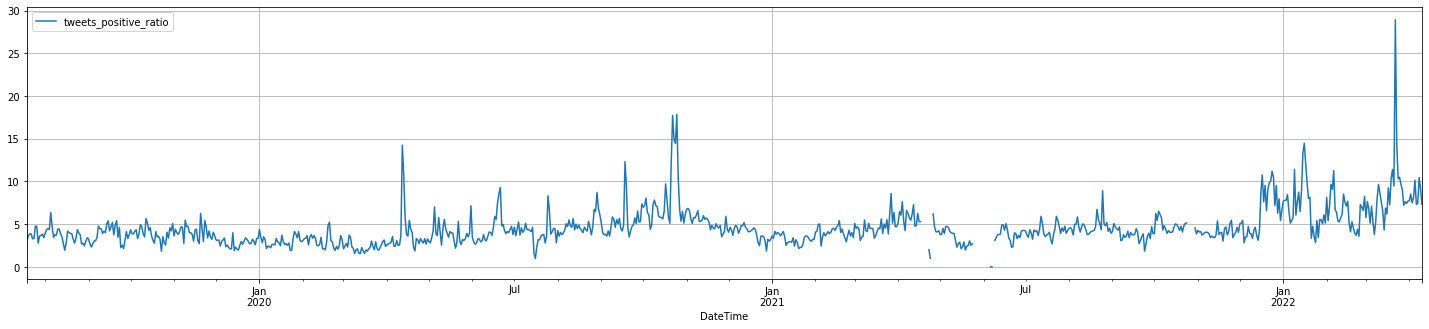

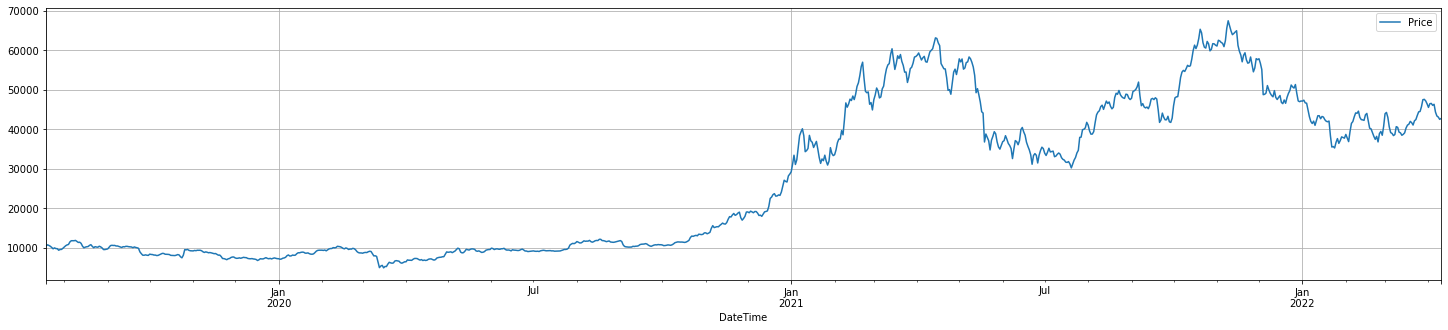

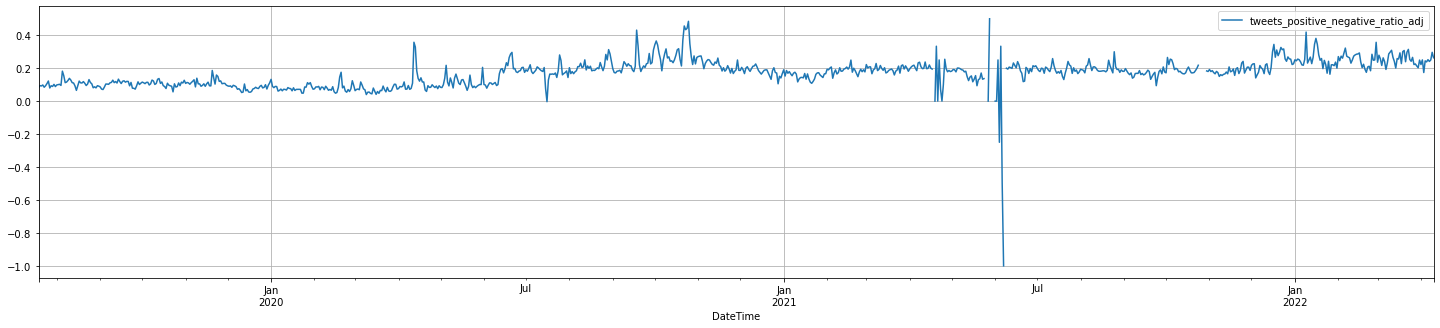

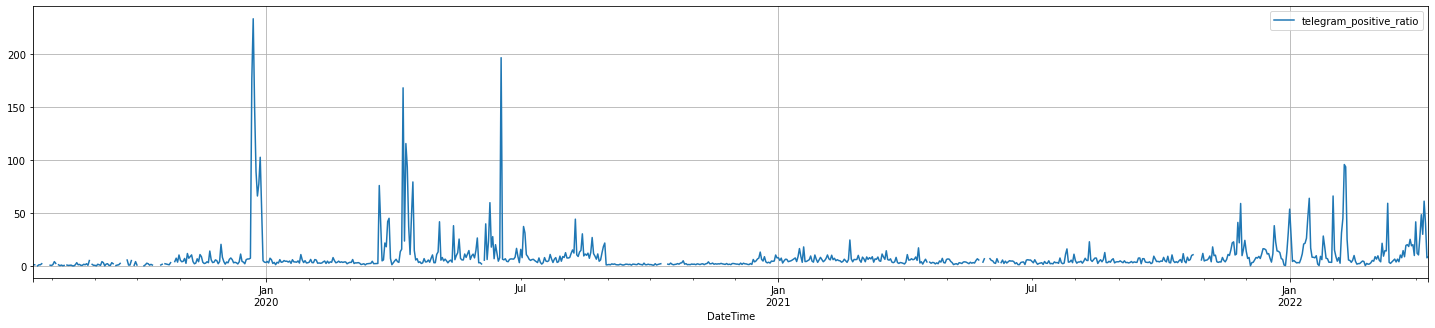

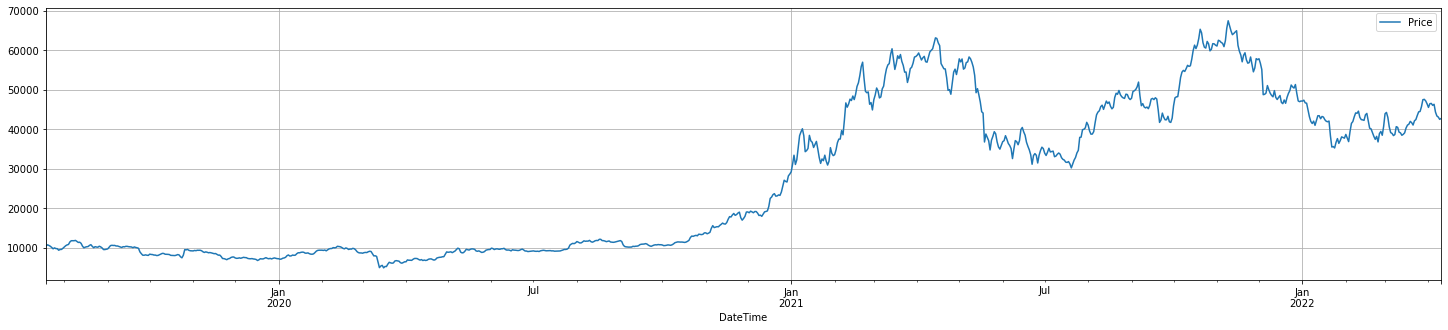

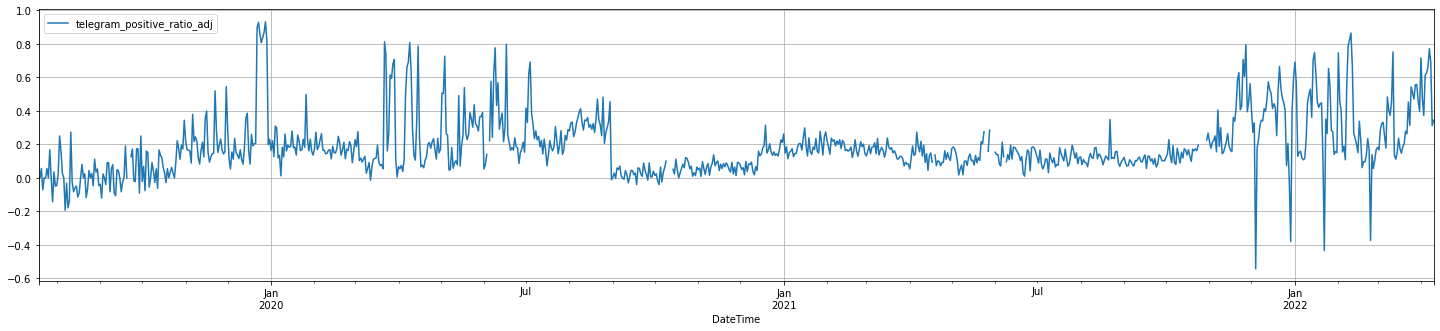

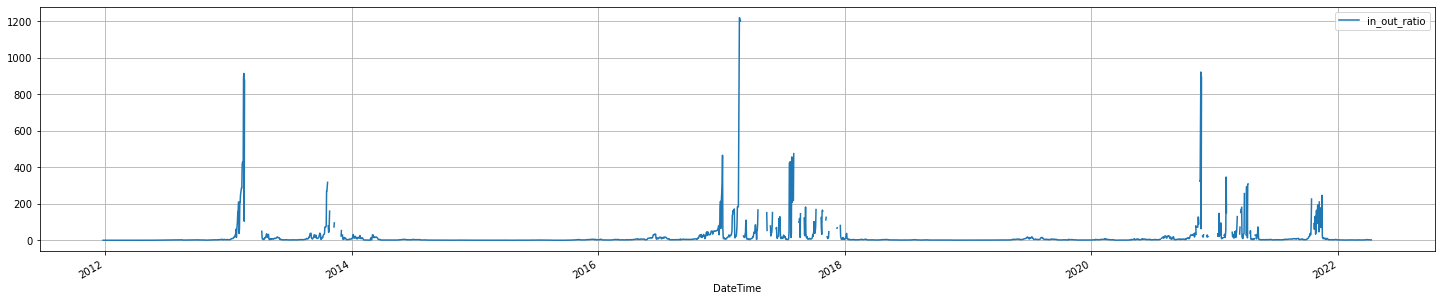

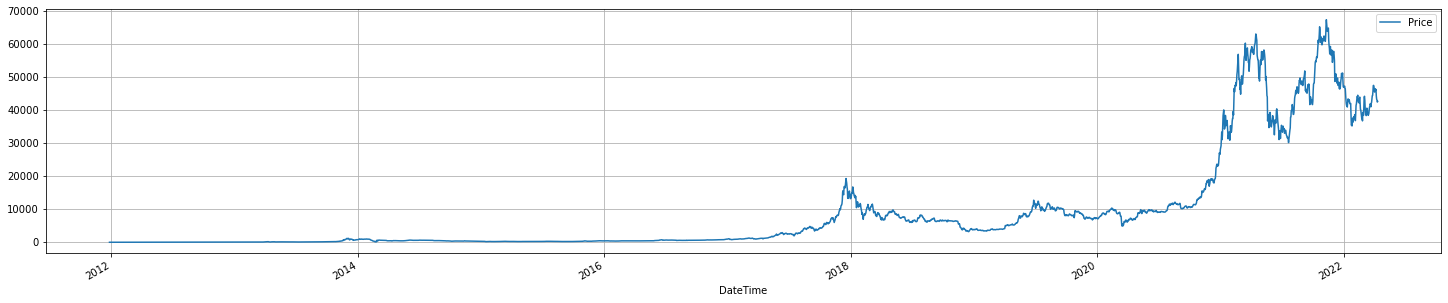

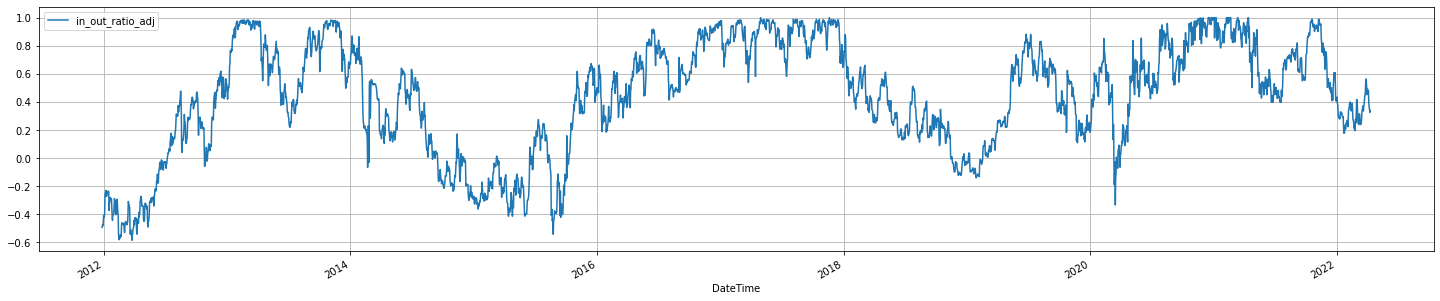

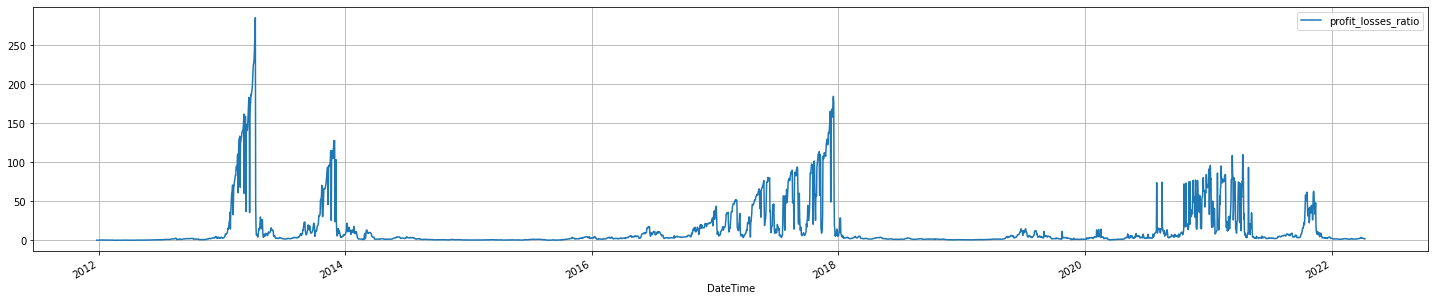

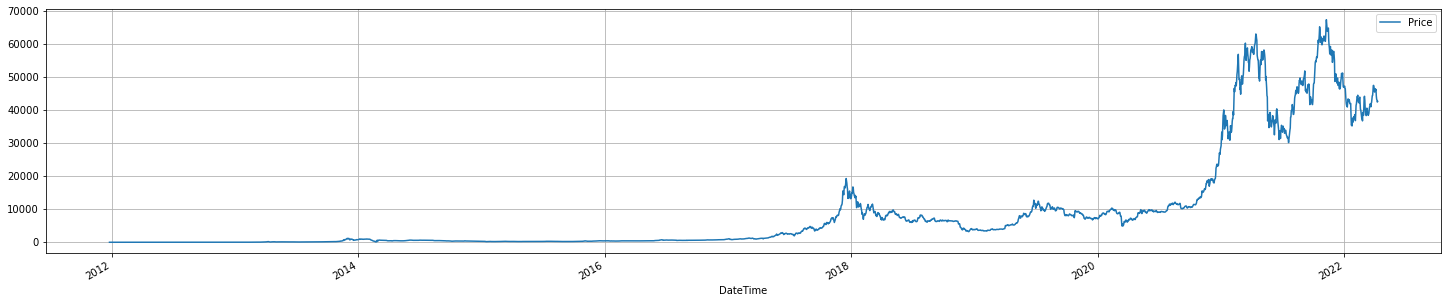

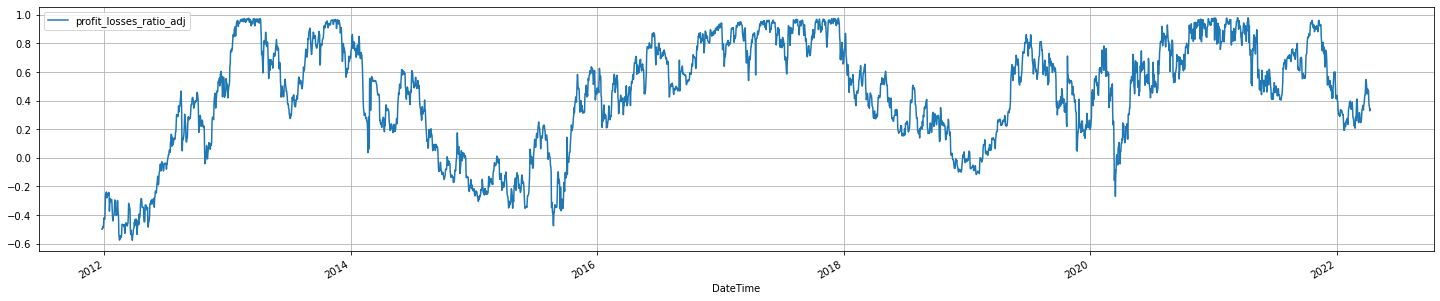

In [43]:
##RATIOS CALCULATION 

#Tweets
twitter_df['tweets_positive_ratio']= (twitter_df['Positive'] / twitter_df['Negative'])
twitter_df['tweets_positive_negative_ratio_adj']= (twitter_df['Positive'] - twitter_df['Negative'])/ (twitter_df['Positive'] + twitter_df['Negative'] + twitter_df['Neutral'] )


twitter_df.plot(x='DateTime',y=['tweets_positive_ratio'],figsize=(25,5),grid=True)
plt.show()

twitter_df.plot(x='DateTime',y=['Price'],figsize=(25,5),grid=True)
plt.show()

twitter_df.plot(x='DateTime',y=['tweets_positive_negative_ratio_adj'],figsize=(25,5),grid=True)
plt.show()



telegram_df['telegram_positive_ratio']= telegram_df['Positive'] / telegram_df['Negative']
telegram_df['telegram_positive_ratio_adj']= (telegram_df['Positive'] - telegram_df['Negative']) / (telegram_df['Positive'] + telegram_df['Negative'] + telegram_df['Neutral'])

telegram_df.plot(x='DateTime',y=['telegram_positive_ratio'],figsize=(25,5),grid=True)
plt.show()

telegram_df.plot(x='DateTime',y=['Price'],figsize=(25,5),grid=True)
plt.show()


telegram_df.plot(x='DateTime',y=['telegram_positive_ratio_adj'],figsize=(25,5),grid=True)
plt.show()



# In/out the money and profit/looses ratio    by number of addresses both

in_outs_df['in_out_ratio']= in_outs_df['In'] / in_outs_df['Out']
in_outs_df['in_out_ratio_adj']= (in_outs_df['In'] - in_outs_df['Out'])/(in_outs_df['In'] + in_outs_df['Out'] + in_outs_df['At'])
in_outs_df

in_outs_df.plot(x='DateTime',y=['in_out_ratio'],figsize=(25,5),grid=True)
plt.show()

in_outs_df.plot(x='DateTime',y=['Price'],figsize=(25,5),grid=True)
plt.show()

in_outs_df.plot(x='DateTime',y=['in_out_ratio_adj'],figsize=(25,5),grid=True)
plt.show()

break_even_df['profit_losses_ratio']= break_even_df['Profit'] / break_even_df['Losses']
break_even_df['profit_losses_ratio_adj']= (break_even_df['Profit'] - break_even_df['Losses']) / (break_even_df['Profit'] + break_even_df['Losses'] + break_even_df['Break Even'])
#final_df = pd.merge(final_df,break_even_df.rename(columns = {'DateTime':'Date'})[['profit_losses_ratio','Date']],on=['Date'],how='left')


break_even_df.plot(x='DateTime',y=['profit_losses_ratio'],figsize=(25,5),grid=True)
plt.show()

break_even_df.plot(x='DateTime',y=['Price'],figsize=(25,5),grid=True)
plt.show()

break_even_df.plot(x='DateTime',y=['profit_losses_ratio_adj'],figsize=(25,5),grid=True)
plt.show()

In [44]:
### I prefer dividing between the total but lets see the outliers in twitter and telegram

twitter_df.nsmallest(20, 'tweets_positive_negative_ratio_adj')
#df[df.Points == df.Points.min()])

DateTime  Positive  Neutral  Negative      Price  tweets_positive_ratio  \
689 2021-06-07       0.0      0.0       1.0  35078.755               0.000000   
688 2021-06-06       0.0      1.0       1.0  35859.075               0.000000   
686 2021-06-04       0.0      9.0       3.0  37445.260               0.000000   
363 2020-07-16   13297.0  49082.0   13558.0   9122.850               0.980749   
640 2021-04-19       0.0      4.0       0.0  55940.860                    NaN   
642 2021-04-21       0.0     13.0       0.0  55221.375                    NaN   
645 2021-04-24       1.0      4.0       1.0  49996.670               1.000000   
678 2021-05-27       0.0      1.0       0.0  38810.395                    NaN   
683 2021-06-01       0.0      1.0       0.0  36821.855                    NaN   
684 2021-06-02       0.0      3.0       0.0  37080.260                    NaN   
234 2020-03-09    1698.0  12605.0    1086.0   7932.580               1.563536   
241 2020-03-16    1367.0  10059.0     862.0   4909.575               1.585847   
238 2020-03-13    2444.0  15759.0    1574.0   4966.735               1.552732   
237 2020-03-12    2621.0  16184.0    1660.0   6360.185               1.578916   
243 2020-03-18    1139.0   9149.0     624.0   5237.865               1.825321   
212 2020-02-16    1493.0  14499.0     691.0   9838.500               2.160637   
188 2020-01-23    1113.0   9334.0     582.0   8485.955               1.912371   
189 2020-01-24     714.0   6012.0     370.0   8371.665               1.929730   
145 2019-12-11    1083.0   9251.0     517.0   7225.935               2.094778   
213 2020-02-17    1502.0  12053.0     755.0   9720.585               1.989404   

     tweets_positive_negative_ratio_adj  
689                           -1.000000  
688                           -0.500000  
686                           -0.250000  
363                           -0.003437  
640                            0.000000  
642                            0.000000  
645                            0.000000  
678                            0.000000  
683                            0.000000  
684                            0.000000  
234                            0.039769  
241                            0.041097  
238                            0.043990  
237                            0.046958  
243                            0.047196  
212                            0.048073  
188                            0.048146  
189                            0.048478  
145                            0.052161  
213                            0.052201

In [45]:
twitter_df['number_tweets'] = twitter_df['Positive'] + twitter_df['Negative'] + twitter_df['Neutral']
twitter_df.nsmallest(20, 'number_tweets')

DateTime  Positive  Neutral  Negative      Price  tweets_positive_ratio  \
678 2021-05-27       0.0      1.0       0.0  38810.395                    NaN   
683 2021-06-01       0.0      1.0       0.0  36821.855                    NaN   
689 2021-06-07       0.0      0.0       1.0  35078.755               0.000000   
681 2021-05-30       1.0      1.0       0.0  34941.135                    inf   
688 2021-06-06       0.0      1.0       1.0  35859.075               0.000000   
641 2021-04-20       1.0      2.0       0.0  55265.390                    inf   
684 2021-06-02       0.0      3.0       0.0  37080.260                    NaN   
687 2021-06-05       1.0      2.0       0.0  36378.960                    inf   
640 2021-04-19       0.0      4.0       0.0  55940.860                    NaN   
685 2021-06-03       1.0      3.0       0.0  38341.190                    inf   
645 2021-04-24       1.0      4.0       1.0  49996.670               1.000000   
679 2021-05-28       3.0      3.0       0.0  36806.680                    inf   
643 2021-04-22       2.0      6.0       0.0  52989.195                    inf   
646 2021-04-25       1.0      9.0       0.0  48824.735                    inf   
686 2021-06-04       0.0      9.0       3.0  37445.260               0.000000   
642 2021-04-21       0.0     13.0       0.0  55221.375                    NaN   
644 2021-04-23       2.0     11.0       1.0  49803.995               2.000000   
647 2021-04-26     161.0    344.0      26.0  51616.560               6.192308   
808 2021-10-04     215.0    466.0      33.0  48222.745               6.515152   
691 2021-06-09     278.0    572.0      90.0  34981.800               3.088889   

     tweets_positive_negative_ratio_adj  number_tweets  
678                            0.000000            1.0  
683                            0.000000            1.0  
689                           -1.000000            1.0  
681                            0.500000            2.0  
688                           -0.500000            2.0  
641                            0.333333            3.0  
684                            0.000000            3.0  
687                            0.333333            3.0  
640                            0.000000            4.0  
685                            0.250000            4.0  
645                            0.000000            6.0  
679                            0.500000            6.0  
643                            0.250000            8.0  
646                            0.100000           10.0  
686                           -0.250000           12.0  
642                            0.000000           13.0  
644                            0.071429           14.0  
647                            0.254237          531.0  
808                            0.254902          714.0  
691                            0.200000          940.0

In [46]:
# Set the value to non relevant datapoints to Nan (it wil be filled later)
mask= twitter_df.number_tweets < 100
twitter_df.loc[mask, 'tweets_positive_negative_ratio_adj'] = np.nan
twitter_df.loc[mask, 'tweets_positive_negative_ratio_adj']

640   NaN
641   NaN
642   NaN
643   NaN
644   NaN
645   NaN
646   NaN
678   NaN
679   NaN
681   NaN
683   NaN
684   NaN
685   NaN
686   NaN
687   NaN
688   NaN
689   NaN
Name: tweets_positive_negative_ratio_adj, dtype: float64

In [47]:
telegram_df.nsmallest(20,'telegram_positive_ratio_adj')

DateTime  Positive  Neutral  Negative      Price  \
869 2021-12-04     362.0   1789.0    3355.0  48717.135   
918 2022-01-22    3857.0   5691.0   14188.0  35471.105   
894 2021-12-29    1899.0   4121.0    6765.0  47126.565   
951 2022-02-24     931.0   4081.0    4483.0  36766.010   
19  2019-08-07       1.0     23.0       7.0  11766.265   
21  2019-08-09       1.0     30.0       8.0  11850.815   
10  2019-07-29       0.0     18.0       3.0   9552.295   
22  2019-08-10       2.0     15.0       5.0  11601.885   
45  2019-09-02       0.0     29.0       4.0  10111.880   
34  2019-08-22       3.0     24.0       7.0  10004.525   
28  2019-08-16       0.0     31.0       4.0  10154.645   
55  2019-09-12       2.0     21.0       5.0  10264.580   
29  2019-08-17       0.0     20.0       2.0  10242.700   
54  2019-09-11       3.0     24.0       6.0  10063.050   
72  2019-09-29       2.0     16.0       4.0   8104.660   
25  2019-08-13       2.0     29.0       5.0  11102.390   
51  2019-09-08       0.0     11.0       1.0  10441.280   
59  2019-09-16       1.0     20.0       3.0  10257.465   
76  2019-10-03       2.0     20.0       4.0   8269.825   
3   2019-07-22       0.0     26.0       2.0  10374.335   

     telegram_positive_ratio  telegram_positive_ratio_adj  
869                 0.107899                    -0.543589  
918                 0.271849                    -0.435246  
894                 0.280710                    -0.380602  
951                 0.207673                    -0.374092  
19                  0.142857                    -0.193548  
21                  0.125000                    -0.179487  
10                  0.000000                    -0.142857  
22                  0.400000                    -0.136364  
45                  0.000000                    -0.121212  
34                  0.428571                    -0.117647  
28                  0.000000                    -0.114286  
55                  0.400000                    -0.107143  
29                  0.000000                    -0.090909  
54                  0.500000                    -0.090909  
72                  0.500000                    -0.090909  
25                  0.400000                    -0.083333  
51                  0.000000                    -0.083333  
59                  0.333333                    -0.083333  
76                  0.500000                    -0.076923  
3                   0.000000                    -0.071429

In [48]:
telegram_df.nlargest(20,'telegram_positive_ratio_adj')

DateTime  Positive  Neutral  Negative      Price  \
162 2019-12-28    2052.0    108.0      20.0   7310.850   
157 2019-12-23    3969.0    271.0      17.0   7484.965   
156 2019-12-22    1943.0    199.0      11.0   7335.285   
161 2019-12-27    1625.0    201.0      21.0   7164.535   
937 2022-02-10   23568.0   3136.0     252.0  44545.715   
158 2019-12-24    2529.0    372.0      17.0   7302.460   
160 2019-12-26    1122.0    183.0      17.0   7304.825   
936 2022-02-09   15511.0   2936.0     162.0  44008.555   
163 2019-12-29    1564.0    274.0      30.0   7417.990   
247 2020-03-22    1442.0    291.0      19.0   6082.910   
265 2020-04-09    1875.0    267.0      80.0   7249.445   
159 2019-12-25    1785.0    382.0      20.0   7206.410   
334 2020-06-17    4524.0   1093.0      23.0   9396.560   
862 2021-11-27   24455.0   5334.0     415.0  54492.800   
935 2022-02-08   16123.0   3529.0     359.0  44094.020   
271 2020-04-15    1744.0    424.0      22.0   6776.140   
326 2020-06-09    1015.0    253.0      17.0   9744.480   
993 2022-04-07   14058.0   3646.0     230.0  43330.575   
967 2022-03-12    8512.0   2476.0     144.0  39055.270   
911 2022-01-15    8939.0   2679.0     140.0  43200.880   

     telegram_positive_ratio  telegram_positive_ratio_adj  
162               102.600000                     0.932110  
157               233.470588                     0.928353  
156               176.636364                     0.897353  
161                77.380952                     0.868435  
937                93.523810                     0.864965  
158               148.764706                     0.860864  
160                66.000000                     0.835855  
936                95.746914                     0.824816  
163                52.133333                     0.821199  
247                75.894737                     0.812215  
265                23.437500                     0.807831  
159                89.250000                     0.807042  
334               196.695652                     0.798050  
862                58.927711                     0.795921  
935                44.910864                     0.787767  
271                79.272727                     0.786301  
326                59.705882                     0.776654  
993                61.121739                     0.771049  
967                59.111111                     0.751707  
911                63.850000                     0.748342

In [49]:
#BTC volatility

final_df = pd.merge(final_df,volatility_df.rename(columns = {'Volatility':'bc_volatility','DateTime':'Date'})[['bc_volatility','Date']],on=['Date'],how='left')
     
""""unspent  If short-term UTXOs (red and yellow) are spiking for a significant period this points to a late bull market, 
otential bubble phase as money entering surpasses relative long-term volumes"""

#Short term UTXOs
short_term_UTXOs_df = pd.DataFrame()
short_term_UTXOs_df['Date'] = unspent_age_df['DateTime']
short_term_UTXOs_df['ST_UTXOs'] = unspent_age_df['1m-3m'] + unspent_age_df['1w-1m'] + unspent_age_df['1d-1w'] + unspent_age_df['<1d']
final_df = pd.merge(final_df,short_term_UTXOs_df[['ST_UTXOs','Date']],on=['Date'],how='left')


# Positive to negative sentiment on twitter and telegram
final_df = pd.merge(final_df,twitter_df.rename(columns = {'DateTime':'Date'})[['tweets_positive_negative_ratio_adj','Date']],on=['Date'],how='left')
telegram_df['telegram_number']= telegram_df['Positive'] + telegram_df['Negative'] + telegram_df['Neutral']
final_df = pd.merge(final_df,telegram_df.rename(columns = {'DateTime':'Date'})[['telegram_positive_ratio_adj','Date','telegram_number']],on=['Date'],how='left')

#transactions volume in USD adj
final_df = pd.merge(final_df,transactions_volume_df.rename(columns = {'Total Volume':'tx_volume_USD_adj','DateTime':'Date'})[['tx_volume_USD_adj','Date']],on=['Date'],how='left')

# number_of_transactions_df
final_df = pd.merge(final_df,number_of_transactions_df.rename(columns = {'DateTime':'Date'})[['Number of Transactions','Date']],on=['Date'],how='left')

# large_transactions_usd_df adjusted
final_df = pd.merge(final_df,large_transactions_usd_df.rename(columns = {'Total Volume':'large_tx_volume_USD_adj','DateTime':'Date'})[['large_tx_volume_USD_adj','Date']],on=['Date'],how='left')

#large_holders_netflow_df
final_df = pd.merge(final_df,large_holders_netflow_df.rename(columns = {'Netflow':'large_holders_netflow','DateTime':'Date'})[['large_holders_netflow','Date']],on=['Date'],how='left')

# In/out the money and profit/looses ratio    by number of addresses both

final_df = pd.merge(final_df,in_outs_df.rename(columns = {'DateTime':'Date'})[['in_out_ratio_adj','Date']],on=['Date'],how='left')

final_df = pd.merge(final_df,break_even_df.rename(columns = {'DateTime':'Date'})[['profit_losses_ratio_adj','Date']],on=['Date'],how='left')

#github new stars
github_df['git_stars_day']=github_df['Stars'].diff()
final_df = pd.merge(final_df,github_df.rename(columns = {'DateTime':'Date'})[['git_stars_day','Date']],on=['Date'],how='left')

# daily_active_addresses_df
final_df = pd.merge(final_df,daily_active_addresses_df.rename(columns = {'DateTime':'Date'})[['New Addresses', 'Active Addresses','Date']],on=['Date'],how='left')

#bulls_and_bears_V_df    BTC Volume Difference
final_df = pd.merge(final_df,bulls_and_bears_V_df.rename(columns = {'DateTime':'Date','Difference':'Bull_Bear_Diff'})[['Bull_Bear_Diff','Date']],on=['Date'],how='left')


final_df




Date  opening_price  highest_price  lowest_price  closing_price  \
0    2013-01-01           13.5           13.6          13.2           13.3   
1    2013-01-02           13.3           13.4          13.2           13.3   
2    2013-01-03           13.3           13.5          13.3           13.4   
3    2013-01-04           13.4           13.5          13.3           13.5   
4    2013-01-05           13.5           13.6          13.3           13.4   
...         ...            ...            ...           ...            ...   
3394 2022-04-18        39700.0        41095.0       38577.0        40803.0   
3395 2022-04-19        40809.0        41746.0       40585.0        41503.0   
3396 2022-04-20        41499.0        42203.0       40915.0        41368.0   
3397 2022-04-21        41370.0        42969.0       39793.0        40482.0   
3398 2022-04-22        40487.0        40792.0       39200.0        39448.0   

     transactions_in_blockchain avg_block_size sent_by_adress  \
0                         31734          89033          26174   
1                         39280         114077          31809   
2                         42147         108023          38197   
3                         48436         141811          34990   
4                         39455         118240          38008   
...                         ...            ...            ...   
3394                     246287         695206         432612   
3395                     273044         754059         459319   
3396                     285495         621030         438882   
3397                     282269         598510         328328   
3398                        NaN            NaN            NaN   

     avg_mining_difficulty         avg_hashrate  ... tx_volume_USD_adj  \
0                  2979637       24331539528899  ...      1.876320e+07   
1                  2979637       22804647966378  ...      2.401422e+07   
2                  2979637       23724885599725  ...      2.117391e+07   
3                  2979637       22608181137438  ...      2.995312e+07   
4                  2979637       22590695489434  ...      2.740984e+07   
...                    ...                  ...  ...               ...   
3394        28225928151211  2.0893249470243E+20  ...               NaN   
3395        28225928151211  1.8094759060039E+20  ...               NaN   
3396        28225928151211  2.0181374473911E+20  ...               NaN   
3397        28225928151211  2.3103477823489E+20  ...               NaN   
3398                   NaN                  NaN  ...               NaN   

     Number of Transactions large_tx_volume_USD_adj large_holders_netflow  \
0                   31896.0             10774705.22              53251.94   
1                   39433.0              3499799.39              32694.03   
2                   42309.0               808421.38              35051.89   
3                   48589.0              1294830.63              50909.14   
4                   39596.0               401176.51              30816.54   
...                     ...                     ...                   ...   
3394                    NaN                     NaN                   NaN   
3395                    NaN                     NaN                   NaN   
3396                    NaN                     NaN                   NaN   
3397                    NaN                     NaN                   NaN   
3398                    NaN                     NaN                   NaN   

     in_out_ratio_adj profit_losses_ratio_adj git_stars_day New Addresses  \
0            0.472845                0.467087           NaN       20052.0   
1            0.419202                0.418064           NaN       24209.0   
2            0.462837                0.459380           NaN       30280.0   
3            0.480482                0.477303           NaN       25734.0   
4            0.504409                0.503475           NaN       27475.0   
...              

###22.Additional Features

In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3399 entries, 0 to 3398
Data columns (total 60 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                3399 non-null   datetime64[ns]
 1   opening_price                       3399 non-null   float64       
 2   highest_price                       3399 non-null   float64       
 3   lowest_price                        3399 non-null   float64       
 4   closing_price                       3399 non-null   float64       
 5   transactions_in_blockchain          3398 non-null   object        
 6   avg_block_size                      3398 non-null   object        
 7   sent_by_adress                      3398 non-null   object        
 8   avg_mining_difficulty               3398 non-null   object        
 9   avg_hashrate                        3398 non-null   object        
 10  mining_profitability    

In [51]:
final_df['next_day_closing_price'] = final_df['closing_price'].shift(-1)
final_df

Date  opening_price  highest_price  lowest_price  closing_price  \
0    2013-01-01           13.5           13.6          13.2           13.3   
1    2013-01-02           13.3           13.4          13.2           13.3   
2    2013-01-03           13.3           13.5          13.3           13.4   
3    2013-01-04           13.4           13.5          13.3           13.5   
4    2013-01-05           13.5           13.6          13.3           13.4   
...         ...            ...            ...           ...            ...   
3394 2022-04-18        39700.0        41095.0       38577.0        40803.0   
3395 2022-04-19        40809.0        41746.0       40585.0        41503.0   
3396 2022-04-20        41499.0        42203.0       40915.0        41368.0   
3397 2022-04-21        41370.0        42969.0       39793.0        40482.0   
3398 2022-04-22        40487.0        40792.0       39200.0        39448.0   

     transactions_in_blockchain avg_block_size sent_by_adress  \
0                         31734          89033          26174   
1                         39280         114077          31809   
2                         42147         108023          38197   
3                         48436         141811          34990   
4                         39455         118240          38008   
...                         ...            ...            ...   
3394                     246287         695206         432612   
3395                     273044         754059         459319   
3396                     285495         621030         438882   
3397                     282269         598510         328328   
3398                        NaN            NaN            NaN   

     avg_mining_difficulty         avg_hashrate  ... Number of Transactions  \
0                  2979637       24331539528899  ...                31896.0   
1                  2979637       22804647966378  ...                39433.0   
2                  2979637       23724885599725  ...                42309.0   
3                  2979637       22608181137438  ...                48589.0   
4                  2979637       22590695489434  ...                39596.0   
...                    ...                  ...  ...                    ...   
3394        28225928151211  2.0893249470243E+20  ...                    NaN   
3395        28225928151211  1.8094759060039E+20  ...                    NaN   
3396        28225928151211  2.0181374473911E+20  ...                    NaN   
3397        28225928151211  2.3103477823489E+20  ...                    NaN   
3398                   NaN                  NaN  ...                    NaN   

     large_tx_volume_USD_adj large_holders_netflow in_out_ratio_adj  \
0                10774705.22              53251.94         0.472845   
1                 3499799.39              32694.03         0.419202   
2                  808421.38              35051.89         0.462837   
3                 1294830.63              50909.14         0.480482   
4                  401176.51              30816.54         0.504409   
...                      ...                   ...              ...   
3394                     NaN                   NaN              NaN   
3395                     NaN                   NaN              NaN   
3396                     NaN                   NaN              NaN   
3397                     NaN                   NaN              NaN   
3398                     NaN                   NaN              NaN   

     profit_losses_ratio_adj git_stars_day New Addresses Active Addresses  \
0                   0.467087           NaN       20052.0          37847.0   
1                   0.418064           NaN       24209.0          43104.0   
2                   0.459380           NaN       30280.0          51270.0   
3                   0.477303           NaN       25734.0          47341.0   
4                   0.503475           NaN       27475.0          53413.0   
...                      ... 

In [52]:
final_df.replace(to_replace='null', value=np.nan,inplace=True)
final_df.drop(final_df.tail(1).index,inplace=True)
final_df

Date  opening_price  highest_price  lowest_price  closing_price  \
0    2013-01-01           13.5           13.6          13.2           13.3   
1    2013-01-02           13.3           13.4          13.2           13.3   
2    2013-01-03           13.3           13.5          13.3           13.4   
3    2013-01-04           13.4           13.5          13.3           13.5   
4    2013-01-05           13.5           13.6          13.3           13.4   
...         ...            ...            ...           ...            ...   
3393 2022-04-17        40382.0        40599.0       39561.0        39703.0   
3394 2022-04-18        39700.0        41095.0       38577.0        40803.0   
3395 2022-04-19        40809.0        41746.0       40585.0        41503.0   
3396 2022-04-20        41499.0        42203.0       40915.0        41368.0   
3397 2022-04-21        41370.0        42969.0       39793.0        40482.0   

     transactions_in_blockchain avg_block_size sent_by_adress  \
0                         31734          89033          26174   
1                         39280         114077          31809   
2                         42147         108023          38197   
3                         48436         141811          34990   
4                         39455         118240          38008   
...                         ...            ...            ...   
3393                     207159         456390         385052   
3394                     246287         695206         432612   
3395                     273044         754059         459319   
3396                     285495         621030         438882   
3397                     282269         598510         328328   

     avg_mining_difficulty         avg_hashrate  ... Number of Transactions  \
0                  2979637       24331539528899  ...                31896.0   
1                  2979637       22804647966378  ...                39433.0   
2                  2979637       23724885599725  ...                42309.0   
3                  2979637       22608181137438  ...                48589.0   
4                  2979637       22590695489434  ...                39596.0   
...                    ...                  ...  ...                    ...   
3393        28225928151211  2.1845849980777E+20  ...                    NaN   
3394        28225928151211  2.0893249470243E+20  ...                    NaN   
3395        28225928151211  1.8094759060039E+20  ...                    NaN   
3396        28225928151211  2.0181374473911E+20  ...                    NaN   
3397        28225928151211  2.3103477823489E+20  ...                    NaN   

     large_tx_volume_USD_adj large_holders_netflow in_out_ratio_adj  \
0                10774705.22              53251.94         0.472845   
1                 3499799.39              32694.03         0.419202   
2                  808421.38              35051.89         0.462837   
3                 1294830.63              50909.14         0.480482   
4                  401176.51              30816.54         0.504409   
...                      ...                   ...              ...   
3393                     NaN                   NaN              NaN   
3394                     NaN                   NaN              NaN   
3395                     NaN                   NaN              NaN   
3396                     NaN                   NaN              NaN   
3397                     NaN                   NaN              NaN   

     profit_losses_ratio_adj git_stars_day New Addresses Active Addresses  \
0                   0.467087           NaN       20052.0          37847.0   
1                   0.418064           NaN       24209.0          43104.0   
2                   0.459380           NaN       30280.0          51270.0   
3                   0.477303           NaN       25734.0          47341.0   
4                   0.503475           NaN       27475.0          53413.0   
...                      ... 

In [53]:
#Filtering data as we are considering this peiod only
#final_df = final_df[(final_df['Date'] >= '2013-01-01')].reset_index(drop=True)

In [54]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3398 entries, 0 to 3397
Data columns (total 61 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   Date                                3398 non-null   datetime64[ns]
 1   opening_price                       3398 non-null   float64       
 2   highest_price                       3398 non-null   float64       
 3   lowest_price                        3398 non-null   float64       
 4   closing_price                       3398 non-null   float64       
 5   transactions_in_blockchain          3398 non-null   object        
 6   avg_block_size                      3398 non-null   object        
 7   sent_by_adress                      3398 non-null   object        
 8   avg_mining_difficulty               3398 non-null   object        
 9   avg_hashrate                        3398 non-null   object        
 10  mining_profitability    

In [55]:
final_df['MSCIACW_spot']

0       339,78
1       347,09
2       346,62
3       347,68
4          NaN
         ...  
3393       NaN
3394       NaN
3395       NaN
3396       NaN
3397       NaN
Name: MSCIACW_spot, Length: 3398, dtype: object

In [56]:
final_df['MSCIACW_spot']=final_df['MSCIACW_spot'].str.replace('.','')
final_df['MSCIACW_spot']=final_df['MSCIACW_spot'].str.replace(',','.')

final_df['WTI_spot']=final_df['WTI_spot'].str.replace('.','')
final_df['WTI_spot']=final_df['WTI_spot'].str.replace(',','.')

final_df['FUTMSCIACWI']=final_df['FUTMSCIACWI'].str.replace('.','')
final_df['FUTMSCIACWI']=final_df['FUTMSCIACWI'].str.replace(',','.')

final_df['FUTWTI']=final_df['FUTWTI'].str.replace('.','')
final_df['FUTWTI']=final_df['FUTWTI'].str.replace(',','.')

final_df['FUT500']=final_df['FUT500'].str.replace('.','')
final_df['FUT500']=final_df['FUT500'].str.replace(',','.')

final_df['FUTGOLD']=final_df['FUTGOLD'].str.replace('.','')
final_df['FUTGOLD']=final_df['FUTGOLD'].str.replace(',','.')

final_df['FUTVIX']=final_df['FUTVIX'].str.replace('.','')
final_df['FUTVIX']=final_df['FUTVIX'].str.replace(',','.')

final_df['FUTBTC']=final_df['FUTBTC'].str.replace('.','')
final_df['FUTBTC']=final_df['FUTBTC'].str.replace(',','.')

final_df['FUTDXY']=final_df['FUTDXY'].str.replace('.','')
final_df['FUTDXY']=final_df['FUTDXY'].str.replace(',','.')

In [57]:
for col in final_df.columns:
    if final_df[col].dtype == object:
        print(col)
        final_df[col]=final_df[col].astype(float)

transactions_in_blockchain
avg_block_size
sent_by_adress
avg_mining_difficulty
avg_hashrate
mining_profitability
sent_coins_in_usd
avg_transaction_fees
median_transaction_fees
avg_block_time
avg_transaction_value
median_transaction_value
tweets_day
google_trends
active_addresses
top100_to_total_percentage
avg_fee_to_reward
avg_price_usd
market_cap_usd
MSCIACW_spot
WTI_spot
FUTMSCIACWI
FUTWTI
FUT500
FUTGOLD
FUTVIX
FUTBTC
FUTDXY


In [58]:
final_df.set_index('Date',inplace=True)

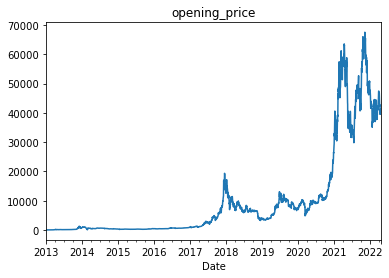

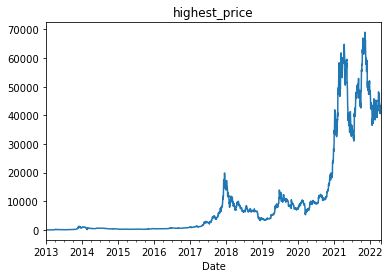

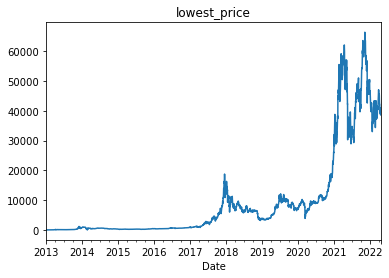

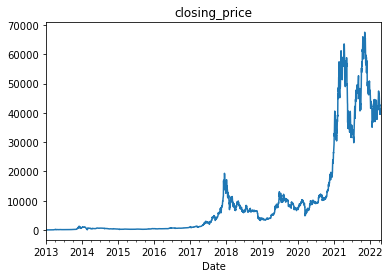

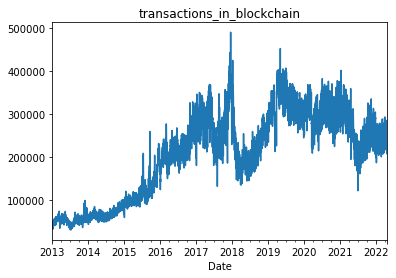

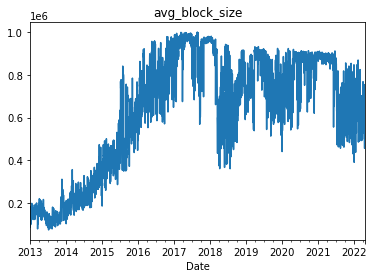

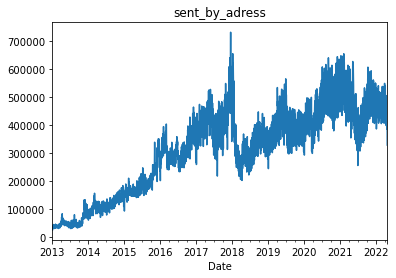

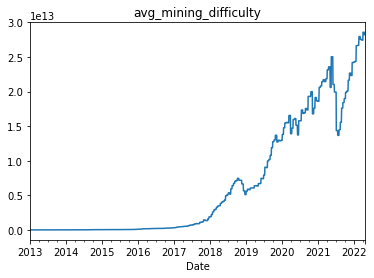

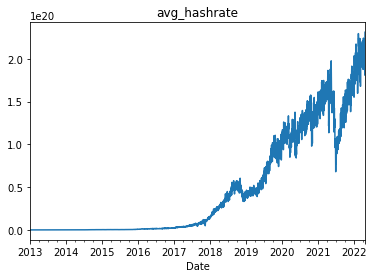

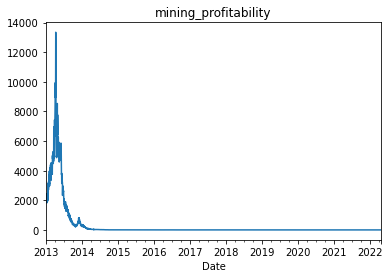

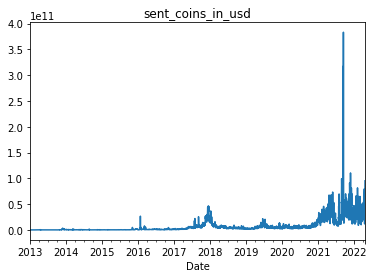

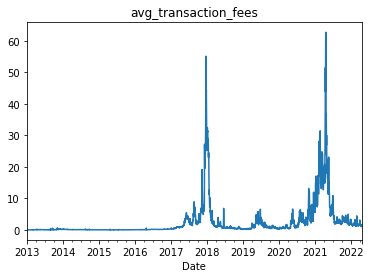

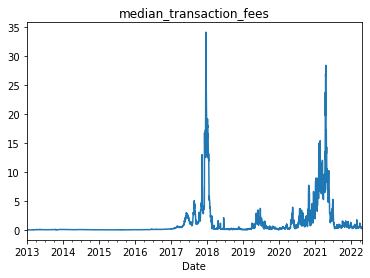

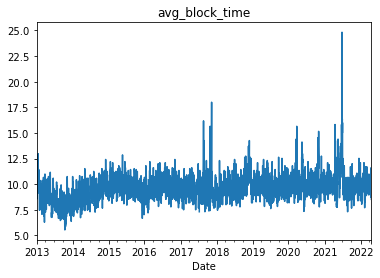

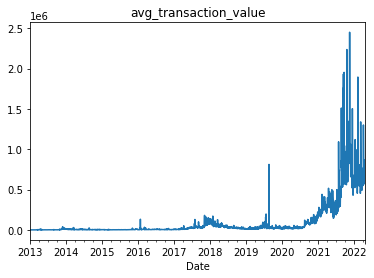

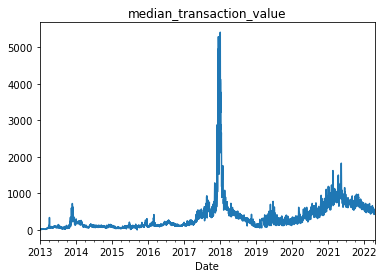

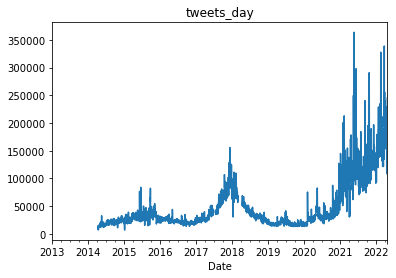

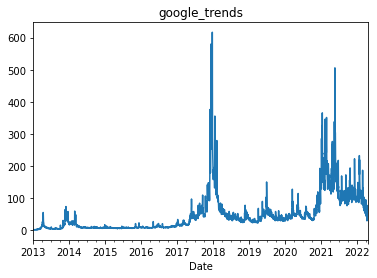

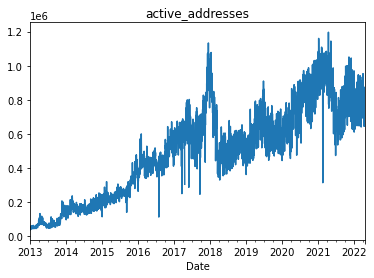

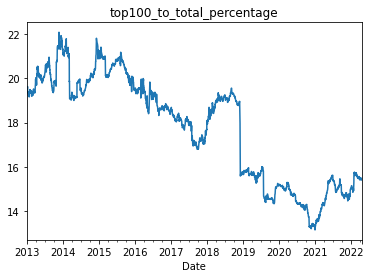

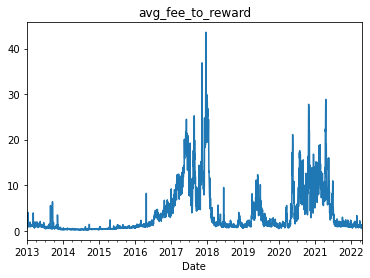

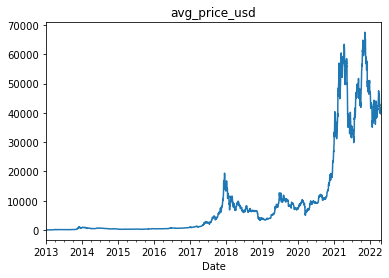

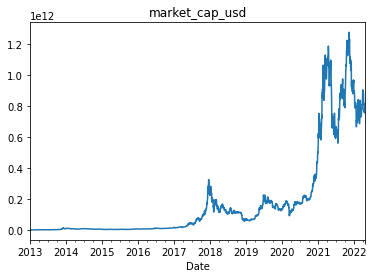

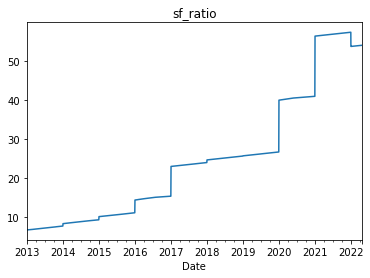

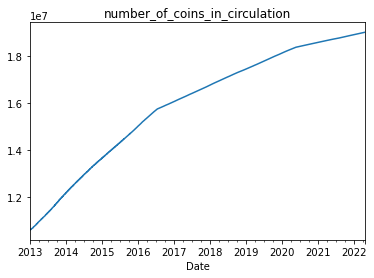

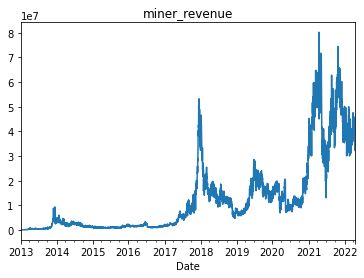

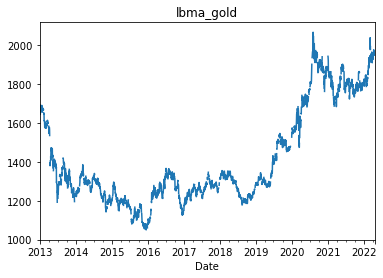

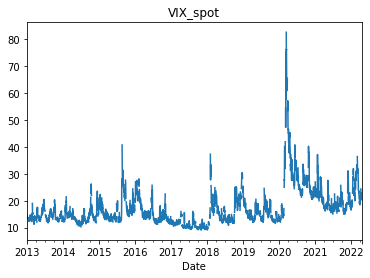

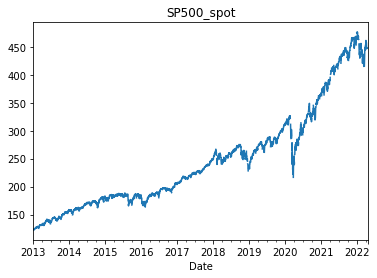

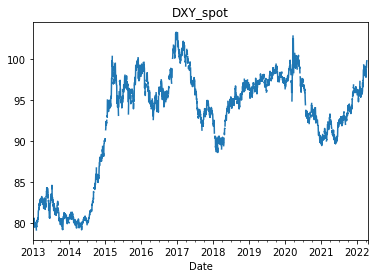

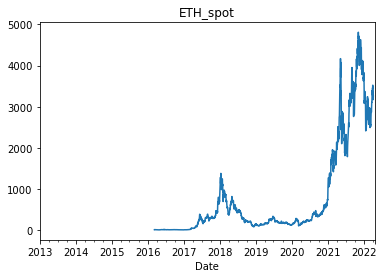

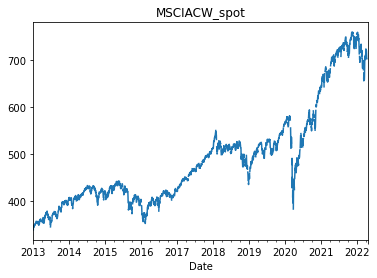

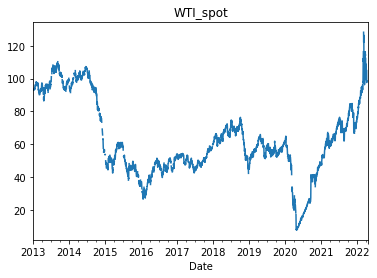

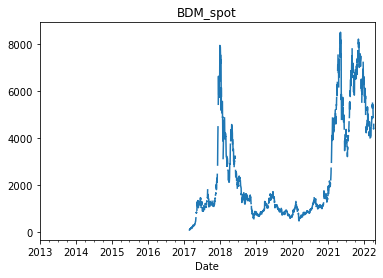

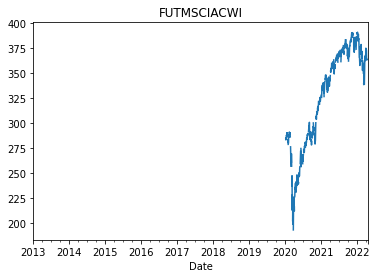

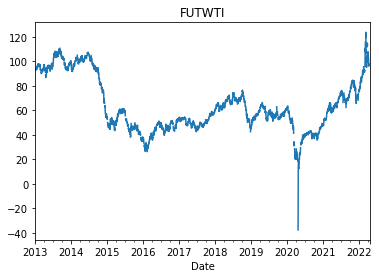

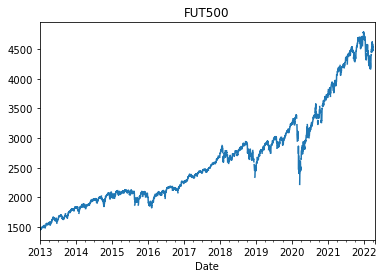

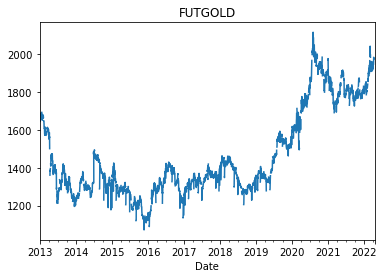

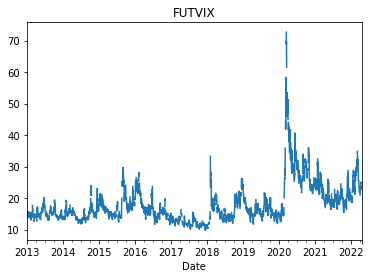

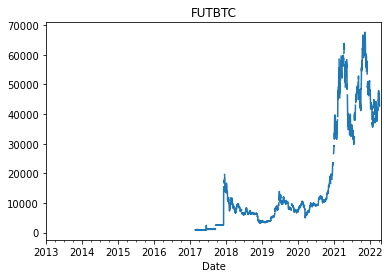

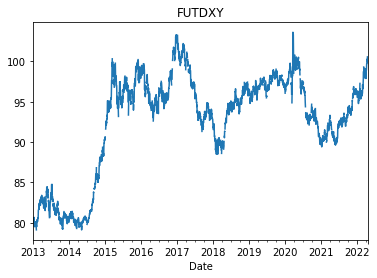

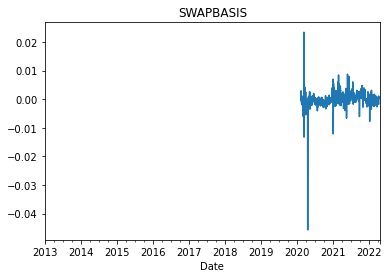

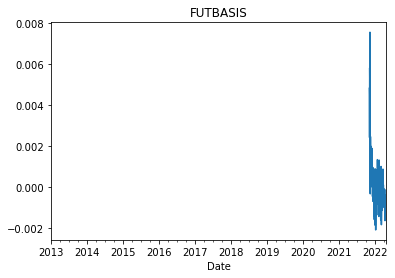

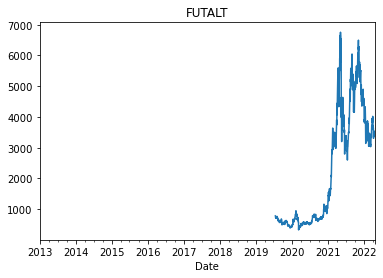

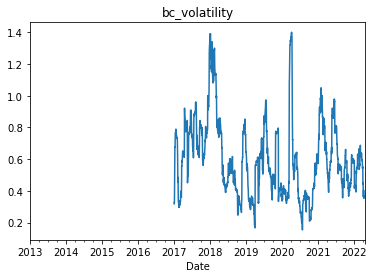

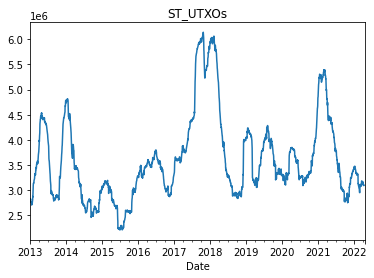

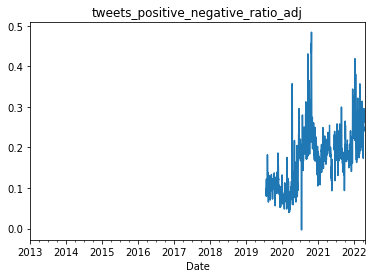

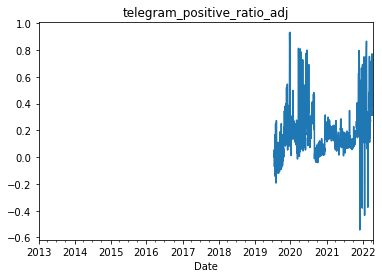

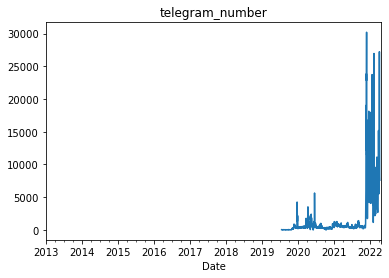

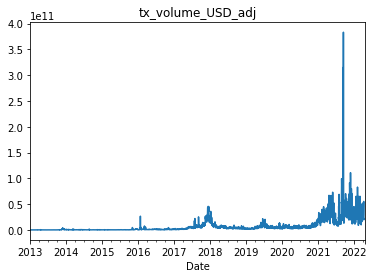

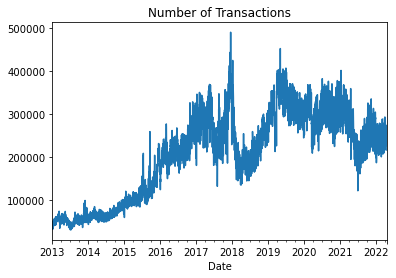

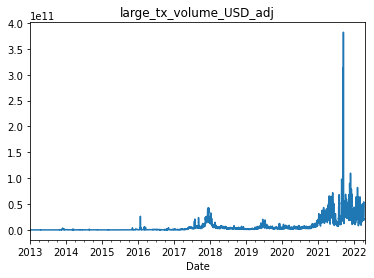

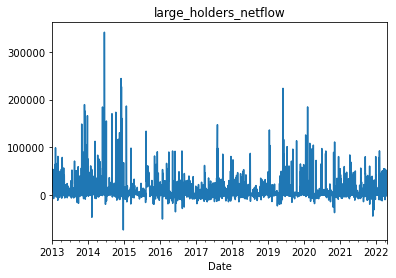

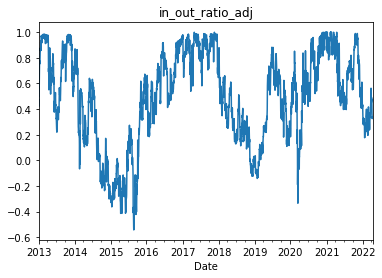

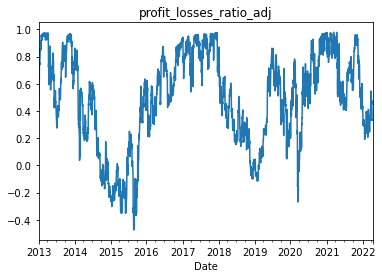

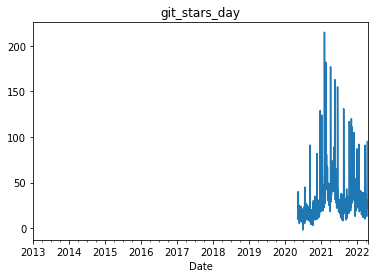

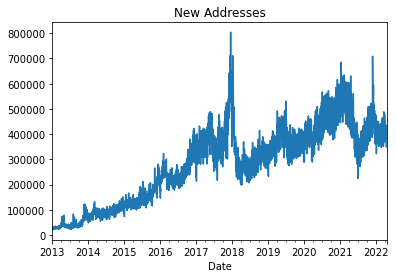

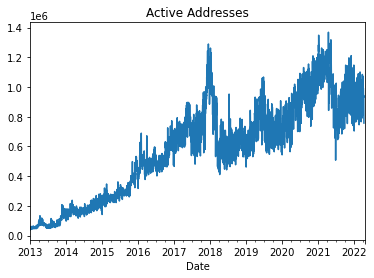

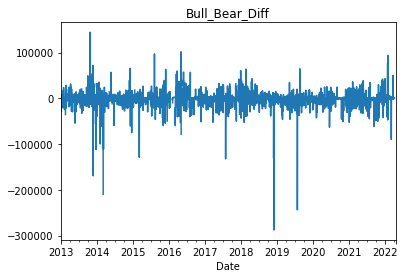

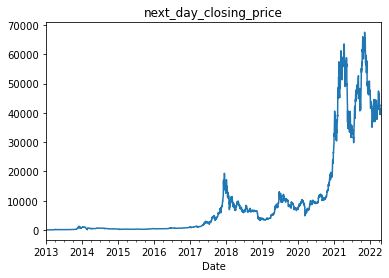

In [59]:
for i, col in enumerate(final_df.columns):
    final_df[col].plot(fig=plt.figure(i))
    plt.title(col)

plt.show()

In [60]:
## We will analyze only from 2018 as the market is evolving so that previous behaviour do not impact in our analysis

In [61]:
#lets see the features for which we dont have data since 01.01.2018


final_df.apply(pd.Series.first_valid_index)



opening_price                        2013-01-01
highest_price                        2013-01-01
lowest_price                         2013-01-01
closing_price                        2013-01-01
transactions_in_blockchain           2013-01-01
avg_block_size                       2013-01-01
sent_by_adress                       2013-01-01
avg_mining_difficulty                2013-01-01
avg_hashrate                         2013-01-01
mining_profitability                 2013-01-01
sent_coins_in_usd                    2013-01-01
avg_transaction_fees                 2013-01-01
median_transaction_fees              2013-01-01
avg_block_time                       2013-01-01
avg_transaction_value                2013-01-01
median_transaction_value             2013-01-01
tweets_day                           2014-04-09
google_trends                        2013-01-01
active_addresses                     2013-01-01
top100_to_total_percentage           2013-01-01
avg_fee_to_reward                    201

In [62]:
## before  cutting the dataset lets calculate Ichimoku over Bitcoin Price
ichimoku = ta.ichimoku(final_df['highest_price'], final_df['lowest_price'], final_df['closing_price'])


In [63]:
ichimoku[0]

ISA_9   ISB_26    ITS_9   IKS_26  ICS_26
Date                                                    
2013-01-01        NaN      NaN      NaN      NaN    17.8
2013-01-02        NaN      NaN      NaN      NaN    18.7
2013-01-03        NaN      NaN      NaN      NaN    19.5
2013-01-04        NaN      NaN      NaN      NaN    19.7
2013-01-05        NaN      NaN      NaN      NaN    20.4
...               ...      ...      ...      ...     ...
2022-04-17  40824.500  40056.3  41311.5  43700.5     NaN
2022-04-18  40976.325  40056.3  40999.0  43388.0     NaN
2022-04-19  41390.175  40056.3  40497.5  43388.0     NaN
2022-04-20  41955.775  40056.3  40390.0  43388.0     NaN
2022-04-21  41955.775  40056.3  40773.0  43388.0     NaN

[3398 rows x 5 columns]

In [64]:
final_df = pd.concat([final_df, ichimoku[0]], axis=1)

# After analyzing the data we take the following decisions:
    - Drop FUTBASIS and SWAPBASIS as they are very recent variables and in adittion BTC futures market is still very weak
    - Rest of variables for which we dont have full data are: 
        - FUTMSCIACWI - 06/01/2020 
        - FUTALT     - 20/07/2019 
        - tweets_positive_ratio, telegram_positive_ratio, telegram_number - substitute from data from santiment -- see below
        - git_stars_day - 2020-05-06 --> Drop this variable
        - Keep ETH and other indexes from 2017 as till 2017 BTC price didnt change much
        
We will take data from 20/07/2019, for the first model, later we will try to improve the data points for take a longer period of time

In [65]:
# Drop data from  FUTMSCIACWI

final_df.drop(['FUTMSCIACWI'],axis=1,inplace=True)

In [84]:
# Take data from santiment - CSV

# we will substitute also tweets day and telegram day by the social volume in santiment, which is more complete

final_df.drop(['tweets_day','tweets_positive_negative_ratio_adj','telegram_positive_ratio_adj', 'telegram_number', 'git_stars_day'],axis=1,inplace=True)

santiment_df=pd.read_csv('data/santiment.csv')
santiment_df



In [67]:
santiment_df['Date'] = pd.to_datetime(santiment_df['Date'], format= '%Y-%m-%d')

In [68]:
santiment_df['Date'] = santiment_df["Date"].dt.strftime("%Y-%m-%d")
santiment_df

Date  Social Volume  Social Volume AI  Positive sentiment (Total)  \
0     2010-05-11              2                 4                    0.000000   
1     2010-05-12              1                 2                    0.000000   
2     2010-05-13              1                 2                    0.000000   
3     2010-05-14              4                 7                    0.000000   
4     2010-05-15              0                 7                    0.000000   
...          ...            ...               ...                         ...   
4360  2022-04-18          13512             19130                 5186.965232   
4361  2022-04-19          14621             19475                 6205.641463   
4362  2022-04-20          17633             23443                 7783.578235   
4363  2022-04-21          19948             25122                 8948.167152   
4364  2022-04-22          10585             13335                 4379.584272   

      Negative sentiment (Total)  Weighted sentiment (Total)  
0                       0.000000                         NaN  
1                       0.000000                         NaN  
2                       0.000000                         NaN  
3                       0.955811                         NaN  
4                       0.000000                         NaN  
...                          ...                         ...  
4360                  787.376231                    0.332269  
4361                  631.928064                    1.245056  
4362                  639.665058                    2.703846  
4363                  725.499189                    4.018135  
4364                  428.014563                         NaN  

[4365 rows x 6 columns]

In [69]:
santiment_df

Date  Social Volume  Social Volume AI  Positive sentiment (Total)  \
0     2010-05-11              2                 4                    0.000000   
1     2010-05-12              1                 2                    0.000000   
2     2010-05-13              1                 2                    0.000000   
3     2010-05-14              4                 7                    0.000000   
4     2010-05-15              0                 7                    0.000000   
...          ...            ...               ...                         ...   
4360  2022-04-18          13512             19130                 5186.965232   
4361  2022-04-19          14621             19475                 6205.641463   
4362  2022-04-20          17633             23443                 7783.578235   
4363  2022-04-21          19948             25122                 8948.167152   
4364  2022-04-22          10585             13335                 4379.584272   

      Negative sentiment (Total)  Weighted sentiment (Total)  
0                       0.000000                         NaN  
1                       0.000000                         NaN  
2                       0.000000                         NaN  
3                       0.955811                         NaN  
4                       0.000000                         NaN  
...                          ...                         ...  
4360                  787.376231                    0.332269  
4361                  631.928064                    1.245056  
4362                  639.665058                    2.703846  
4363                  725.499189                    4.018135  
4364                  428.014563                         NaN  

[4365 rows x 6 columns]

In [92]:
santiment_df = santiment_df[(santiment_df['Date'] >= '2013-07-17')].reset_index(drop=True)
santiment_df = santiment_df[(santiment_df['Date'] <= '2022-03-26')].reset_index(drop=True)

In [93]:
final_df = final_df[(final_df.index >= '2013-07-17')]
final_df = final_df[(final_df.index <= '2022-03-26')]


In [72]:
final_df

opening_price  highest_price  lowest_price  closing_price  \
Date                                                                    
2013-07-17           97.1          100.0          96.2           98.5   
2013-07-18           98.5           98.8          86.2           90.1   
2013-07-19           90.1           95.2          87.6           92.0   
2013-07-20           92.0           93.1          89.3           89.8   
2013-07-21           89.8           92.0          88.0           92.0   
...                   ...            ...           ...            ...   
2022-04-04        46407.0        46899.0       45152.0        46629.0   
2022-04-05        46614.0        47201.0       45388.0        45506.0   
2022-04-06        45494.0        45519.0       43122.0        43173.0   
2022-04-07        43166.0        43893.0       42747.0        43448.0   
2022-04-08        43450.0        43979.0       42113.0        42275.0   

            transactions_in_blockchain  avg_block_size  sent_by_adress  \
Date                                                                     
2013-07-17                     40459.0        100827.0         45703.0   
2013-07-18                     41009.0        117039.0         45106.0   
2013-07-19                     36588.0         96865.0         43518.0   
2013-07-20                     33516.0         82983.0         32982.0   
2013-07-21                     35257.0         82978.0         35799.0   
...                                ...             ...             ...   
2022-04-04                    274948.0        635486.0        504316.0   
2022-04-05                    273285.0        642582.0        502015.0   
2022-04-06                    273490.0        622486.0        490459.0   
2022-04-07                    269266.0        704504.0        498290.0   
2022-04-08                    266671.0        675392.0        504813.0   

            avg_mining_difficulty  avg_hashrate  mining_profitability  ...  \
Date                                                                   ...   
2013-07-17           2.616288e+07  2.162608e+14              1902.000  ...   
2013-07-18           2.616288e+07  2.276863e+14              1543.000  ...   
2013-07-19           2.616288e+07  2.192230e+14              1643.000  ...   
2013-07-20           2.616288e+07  2.383648e+14              1644.000  ...   
2013-07-21           2.616288e+07  2.422884e+14              1731.000  ...   
...                           ...           ...                   ...  ...   
2022-04-04           2.858716e+13  2.173880e+20                 0.212  ...   
2022-04-05           2.858716e+13  2.241714e+20                 0.190  ...   
2022-04-06           2.858716e+13  2.029851e+20                 0.208  ...   
2022-04-07           2.858716e+13  2.094286e+20                 0.181  ...   
2022-04-08           2.858716e+13  1.944170e+20                 0.189  ...   

            git_stars_day  New Addresses  Active Addresses  Bull_Bear_Diff  \
Date                                                                         
2013-07-17            NaN        35317.0           63007.0         -210.30   
2013-07-18            NaN        34407.0           63180.0        19643.49   
2013-07-19            NaN        33515.0           58760.0       -20914.38   
2013-07-20            NaN        26221.0           52401.0         4303.56   
2013-07-21            NaN        27608.0           51123.0         -360.23   
...                   ...            ...               ...             ...   
2022-04-04           21.0       431980.0          991442.0            0.68   
2022-04-05           24.0       437314.0          954258.0          -48.27   
2022-04-06           13.0       422760.0          928405.0         -274.93   
2022-04-07           19.0       431582.0          943697.0          604.63   
2022-04-08           31.0       426364.0          932330.0         -147.44   

            next_day_closing_price      ISA_9    ISB_26     ITS_9    

In [73]:
santiment_df

Date  Social Volume  Social Volume AI  Positive sentiment (Total)  \
0     2013-07-17            869              1503                   94.738788   
1     2013-07-18            939              1748                  113.464988   
2     2013-07-19            828              1501                   97.831642   
3     2013-07-20            717              1311                   58.172020   
4     2013-07-21            738              1361                   79.274804   
...          ...            ...               ...                         ...   
3183  2022-04-04          10874             14949                 3757.590894   
3184  2022-04-05          13996             19916                 4674.628101   
3185  2022-04-06          14166             18457                 4726.199728   
3186  2022-04-07          14110             19292                 5214.200088   
3187  2022-04-08          13341             18230                 3917.947146   

      Negative sentiment (Total)  Weighted sentiment (Total)  
0                      88.666622                   -1.919762  
1                      86.926903                   -1.236765  
2                      68.894359                   -1.240729  
3                      49.399806                   -1.738634  
4                      50.117508                   -1.169890  
...                          ...                         ...  
3183                  559.184463                   -1.287500  
3184                  687.511626                   -0.279071  
3185                  717.823657                   -0.264811  
3186                  803.905520                    0.166337  
3187                  843.052326                   -0.804339  

[3188 rows x 6 columns]

In [80]:
final_df['Social_Volume'] = list(santiment_df['Social Volume'])
final_df['Social_Volume_AI'] = list(santiment_df['Social Volume AI'])
final_df['Weighted sentiment'] = list(santiment_df['Weighted sentiment (Total)'])
final_df

opening_price  highest_price  lowest_price  closing_price  \
Date                                                                    
2013-07-17           97.1          100.0          96.2           98.5   
2013-07-18           98.5           98.8          86.2           90.1   
2013-07-19           90.1           95.2          87.6           92.0   
2013-07-20           92.0           93.1          89.3           89.8   
2013-07-21           89.8           92.0          88.0           92.0   
...                   ...            ...           ...            ...   
2022-04-04        46407.0        46899.0       45152.0        46629.0   
2022-04-05        46614.0        47201.0       45388.0        45506.0   
2022-04-06        45494.0        45519.0       43122.0        43173.0   
2022-04-07        43166.0        43893.0       42747.0        43448.0   
2022-04-08        43450.0        43979.0       42113.0        42275.0   

            transactions_in_blockchain  avg_block_size  sent_by_adress  \
Date                                                                     
2013-07-17                     40459.0        100827.0         45703.0   
2013-07-18                     41009.0        117039.0         45106.0   
2013-07-19                     36588.0         96865.0         43518.0   
2013-07-20                     33516.0         82983.0         32982.0   
2013-07-21                     35257.0         82978.0         35799.0   
...                                ...             ...             ...   
2022-04-04                    274948.0        635486.0        504316.0   
2022-04-05                    273285.0        642582.0        502015.0   
2022-04-06                    273490.0        622486.0        490459.0   
2022-04-07                    269266.0        704504.0        498290.0   
2022-04-08                    266671.0        675392.0        504813.0   

            avg_mining_difficulty  avg_hashrate  mining_profitability  ...  \
Date                                                                   ...   
2013-07-17           2.616288e+07  2.162608e+14              1902.000  ...   
2013-07-18           2.616288e+07  2.276863e+14              1543.000  ...   
2013-07-19           2.616288e+07  2.192230e+14              1643.000  ...   
2013-07-20           2.616288e+07  2.383648e+14              1644.000  ...   
2013-07-21           2.616288e+07  2.422884e+14              1731.000  ...   
...                           ...           ...                   ...  ...   
2022-04-04           2.858716e+13  2.173880e+20                 0.212  ...   
2022-04-05           2.858716e+13  2.241714e+20                 0.190  ...   
2022-04-06           2.858716e+13  2.029851e+20                 0.208  ...   
2022-04-07           2.858716e+13  2.094286e+20                 0.181  ...   
2022-04-08           2.858716e+13  1.944170e+20                 0.189  ...   

            Bull_Bear_Diff  next_day_closing_price      ISA_9    ISB_26  \
Date                                                                      
2013-07-17         -210.30                    90.1    108.900    109.55   
2013-07-18        19643.49                    92.0    108.200    107.50   
2013-07-19       -20914.38                    89.8    108.300    107.50   
2013-07-20         4303.56                    92.0    108.575    112.00   
2013-07-21         -360.23                    91.6    108.000    112.00   
...                    ...                     ...        ...       ...   
2022-04-04            0.68                 45506.0  40531.975  39370.40   
2022-04-05          -48.27                 43173.0  40531.975  39370.40   
2022-04-06         -274.93                 43448.0  40227.725  39370.40   
2022-04-07          604.63                 42275.0  39920.600  39370.40   
2022-04-08         -147.44                 42767.0  39843.050  39370.40   

               ITS_9    IKS_26  ICS_26  Social_Volume  Social_Volume_AI  \
Date                             

In [75]:
# For our final DF we will take Social Volume, Social volume AI and the weighted sentiment
final_df

opening_price  highest_price  lowest_price  closing_price  \
Date                                                                    
2013-07-17           97.1          100.0          96.2           98.5   
2013-07-18           98.5           98.8          86.2           90.1   
2013-07-19           90.1           95.2          87.6           92.0   
2013-07-20           92.0           93.1          89.3           89.8   
2013-07-21           89.8           92.0          88.0           92.0   
...                   ...            ...           ...            ...   
2022-04-04        46407.0        46899.0       45152.0        46629.0   
2022-04-05        46614.0        47201.0       45388.0        45506.0   
2022-04-06        45494.0        45519.0       43122.0        43173.0   
2022-04-07        43166.0        43893.0       42747.0        43448.0   
2022-04-08        43450.0        43979.0       42113.0        42275.0   

            transactions_in_blockchain  avg_block_size  sent_by_adress  \
Date                                                                     
2013-07-17                     40459.0        100827.0         45703.0   
2013-07-18                     41009.0        117039.0         45106.0   
2013-07-19                     36588.0         96865.0         43518.0   
2013-07-20                     33516.0         82983.0         32982.0   
2013-07-21                     35257.0         82978.0         35799.0   
...                                ...             ...             ...   
2022-04-04                    274948.0        635486.0        504316.0   
2022-04-05                    273285.0        642582.0        502015.0   
2022-04-06                    273490.0        622486.0        490459.0   
2022-04-07                    269266.0        704504.0        498290.0   
2022-04-08                    266671.0        675392.0        504813.0   

            avg_mining_difficulty  avg_hashrate  mining_profitability  ...  \
Date                                                                   ...   
2013-07-17           2.616288e+07  2.162608e+14              1902.000  ...   
2013-07-18           2.616288e+07  2.276863e+14              1543.000  ...   
2013-07-19           2.616288e+07  2.192230e+14              1643.000  ...   
2013-07-20           2.616288e+07  2.383648e+14              1644.000  ...   
2013-07-21           2.616288e+07  2.422884e+14              1731.000  ...   
...                           ...           ...                   ...  ...   
2022-04-04           2.858716e+13  2.173880e+20                 0.212  ...   
2022-04-05           2.858716e+13  2.241714e+20                 0.190  ...   
2022-04-06           2.858716e+13  2.029851e+20                 0.208  ...   
2022-04-07           2.858716e+13  2.094286e+20                 0.181  ...   
2022-04-08           2.858716e+13  1.944170e+20                 0.189  ...   

            git_stars_day  New Addresses  Active Addresses  Bull_Bear_Diff  \
Date                                                                         
2013-07-17            NaN        35317.0           63007.0         -210.30   
2013-07-18            NaN        34407.0           63180.0        19643.49   
2013-07-19            NaN        33515.0           58760.0       -20914.38   
2013-07-20            NaN        26221.0           52401.0         4303.56   
2013-07-21            NaN        27608.0           51123.0         -360.23   
...                   ...            ...               ...             ...   
2022-04-04           21.0       431980.0          991442.0            0.68   
2022-04-05           24.0       437314.0          954258.0          -48.27   
2022-04-06           13.0       422760.0          928405.0         -274.93   
2022-04-07           19.0       431582.0          943697.0          604.63   
2022-04-08           31.0       426364.0          932330.0         -147.44   

            next_day_closing_price      ISA_9    ISB_26     ITS_9    

In [81]:
final_df.drop(['FUTBASIS','SWAPBASIS'],axis=1,inplace=True)

KeyError: "['FUTBASIS' 'SWAPBASIS'] not found in axis"

In [77]:
final_df

opening_price  highest_price  lowest_price  closing_price  \
Date                                                                    
2013-07-17           97.1          100.0          96.2           98.5   
2013-07-18           98.5           98.8          86.2           90.1   
2013-07-19           90.1           95.2          87.6           92.0   
2013-07-20           92.0           93.1          89.3           89.8   
2013-07-21           89.8           92.0          88.0           92.0   
...                   ...            ...           ...            ...   
2022-04-04        46407.0        46899.0       45152.0        46629.0   
2022-04-05        46614.0        47201.0       45388.0        45506.0   
2022-04-06        45494.0        45519.0       43122.0        43173.0   
2022-04-07        43166.0        43893.0       42747.0        43448.0   
2022-04-08        43450.0        43979.0       42113.0        42275.0   

            transactions_in_blockchain  avg_block_size  sent_by_adress  \
Date                                                                     
2013-07-17                     40459.0        100827.0         45703.0   
2013-07-18                     41009.0        117039.0         45106.0   
2013-07-19                     36588.0         96865.0         43518.0   
2013-07-20                     33516.0         82983.0         32982.0   
2013-07-21                     35257.0         82978.0         35799.0   
...                                ...             ...             ...   
2022-04-04                    274948.0        635486.0        504316.0   
2022-04-05                    273285.0        642582.0        502015.0   
2022-04-06                    273490.0        622486.0        490459.0   
2022-04-07                    269266.0        704504.0        498290.0   
2022-04-08                    266671.0        675392.0        504813.0   

            avg_mining_difficulty  avg_hashrate  mining_profitability  ...  \
Date                                                                   ...   
2013-07-17           2.616288e+07  2.162608e+14              1902.000  ...   
2013-07-18           2.616288e+07  2.276863e+14              1543.000  ...   
2013-07-19           2.616288e+07  2.192230e+14              1643.000  ...   
2013-07-20           2.616288e+07  2.383648e+14              1644.000  ...   
2013-07-21           2.616288e+07  2.422884e+14              1731.000  ...   
...                           ...           ...                   ...  ...   
2022-04-04           2.858716e+13  2.173880e+20                 0.212  ...   
2022-04-05           2.858716e+13  2.241714e+20                 0.190  ...   
2022-04-06           2.858716e+13  2.029851e+20                 0.208  ...   
2022-04-07           2.858716e+13  2.094286e+20                 0.181  ...   
2022-04-08           2.858716e+13  1.944170e+20                 0.189  ...   

            git_stars_day  New Addresses  Active Addresses  Bull_Bear_Diff  \
Date                                                                         
2013-07-17            NaN        35317.0           63007.0         -210.30   
2013-07-18            NaN        34407.0           63180.0        19643.49   
2013-07-19            NaN        33515.0           58760.0       -20914.38   
2013-07-20            NaN        26221.0           52401.0         4303.56   
2013-07-21            NaN        27608.0           51123.0         -360.23   
...                   ...            ...               ...             ...   
2022-04-04           21.0       431980.0          991442.0            0.68   
2022-04-05           24.0       437314.0          954258.0          -48.27   
2022-04-06           13.0       422760.0          928405.0         -274.93   
2022-04-07           19.0       431582.0          943697.0          604.63   
2022-04-08           31.0       426364.0          932330.0         -147.44   

            next_day_closing_price      ISA_9    ISB_26     ITS_9    

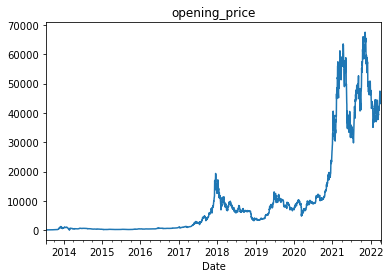

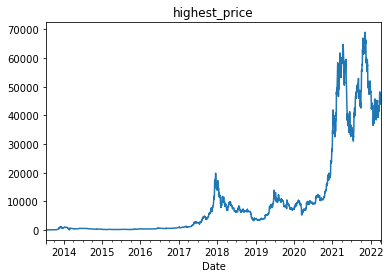

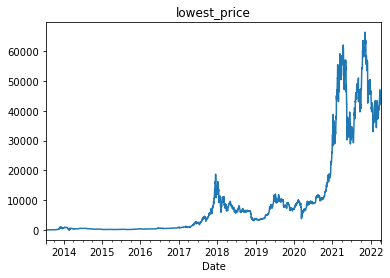

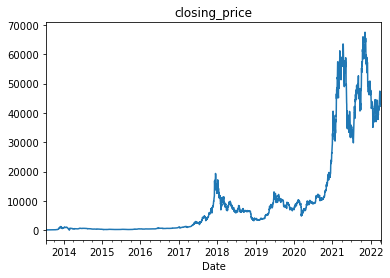

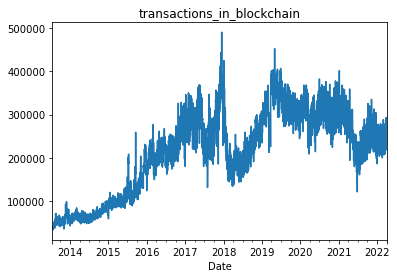

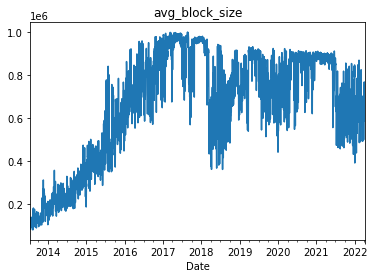

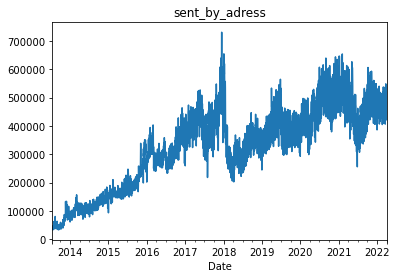

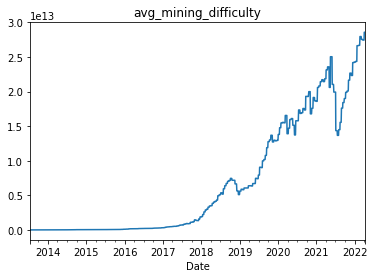

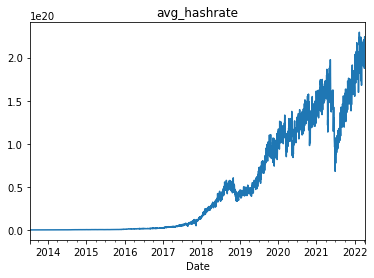

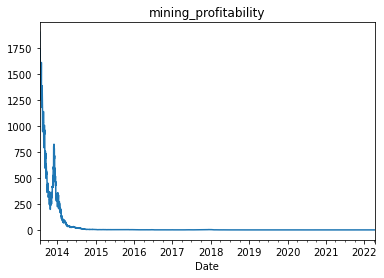

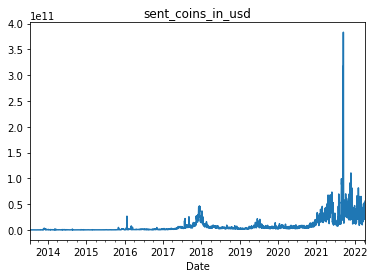

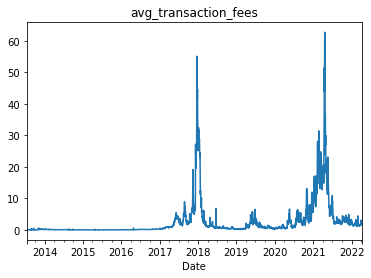

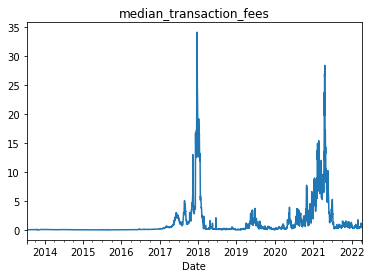

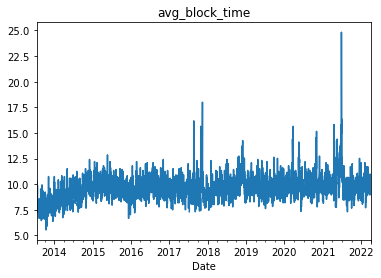

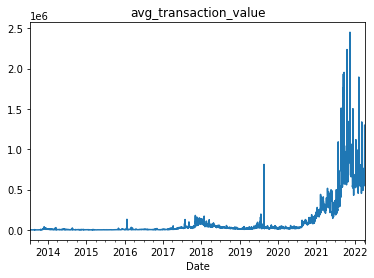

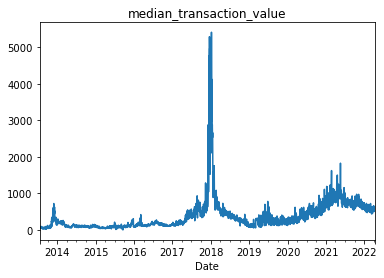

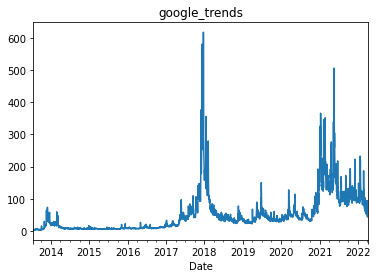

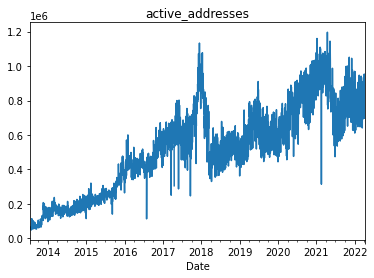

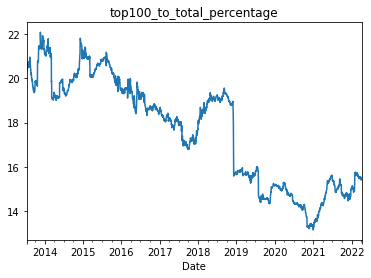

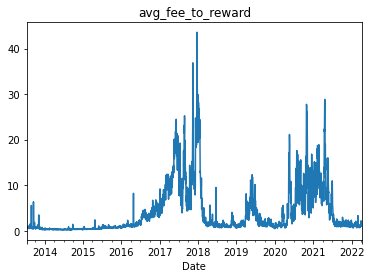

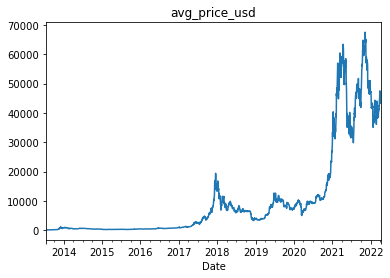

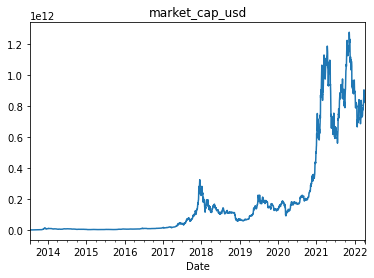

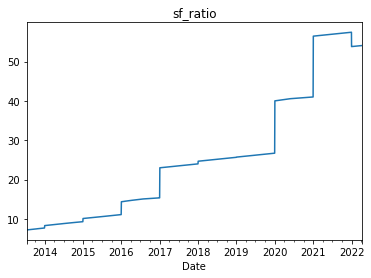

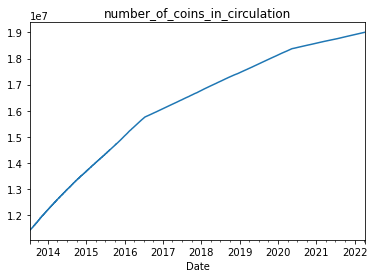

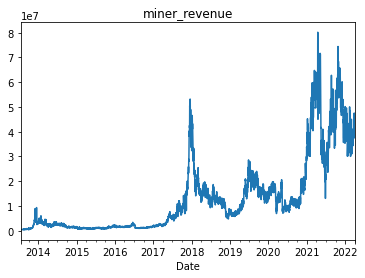

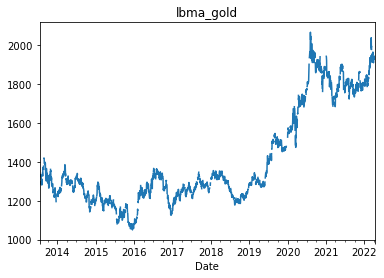

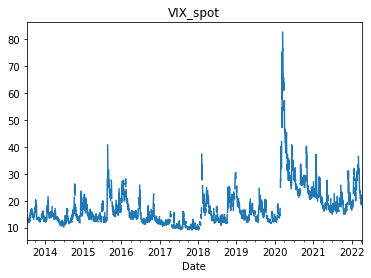

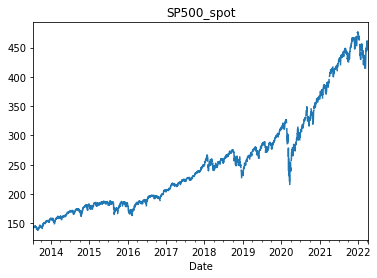

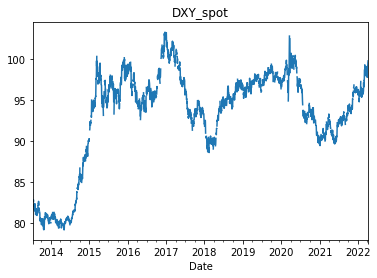

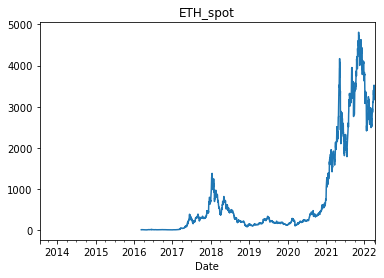

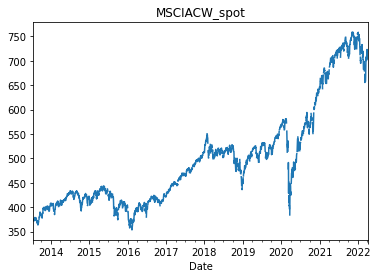

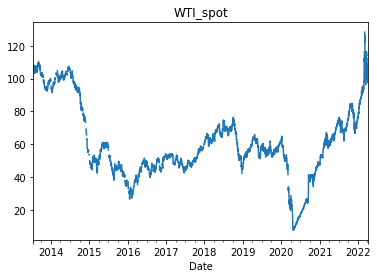

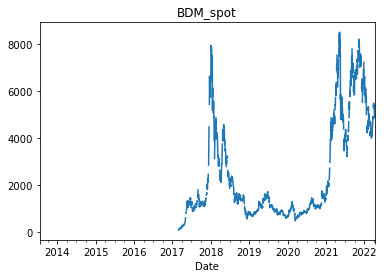

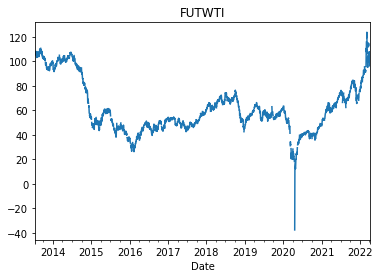

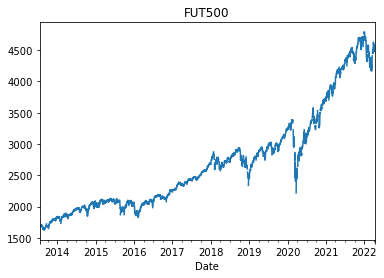

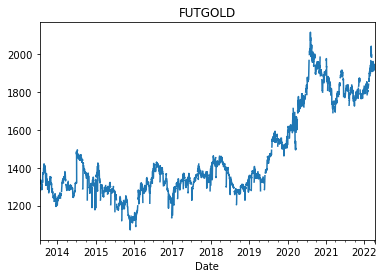

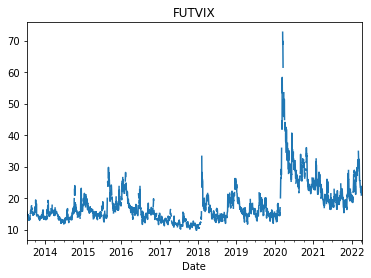

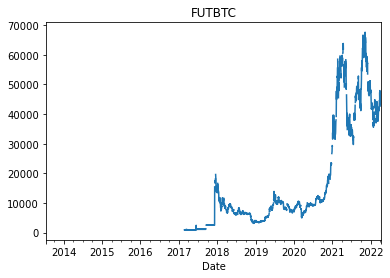

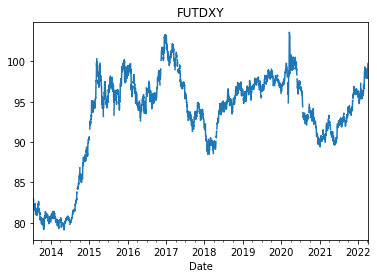

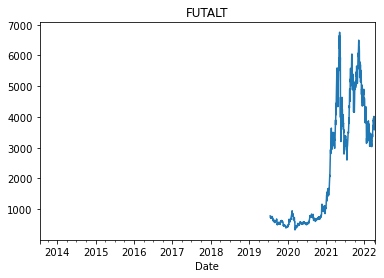

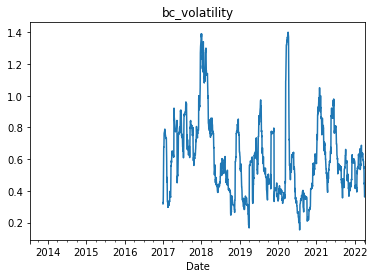

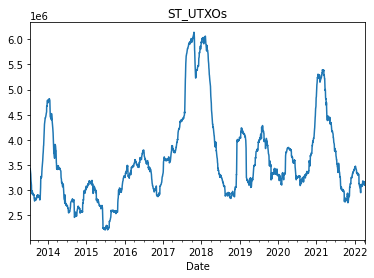

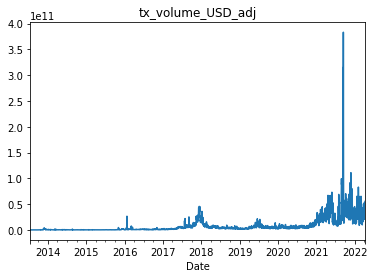

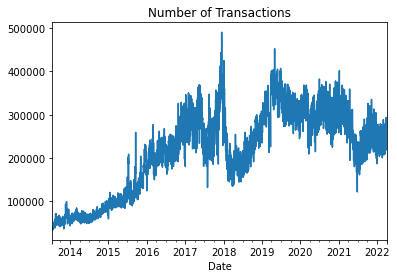

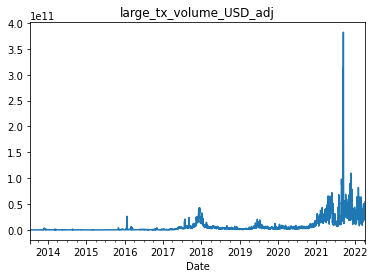

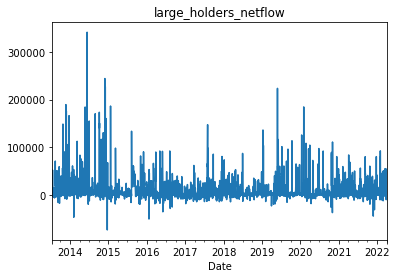

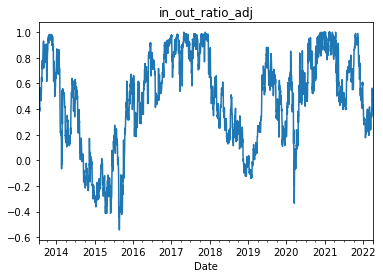

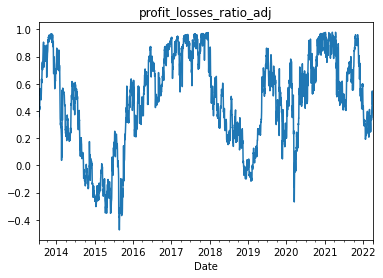

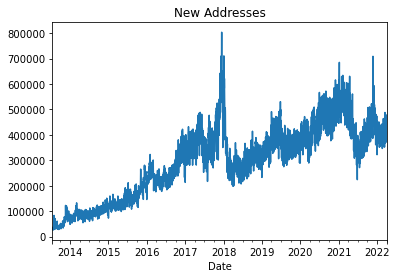

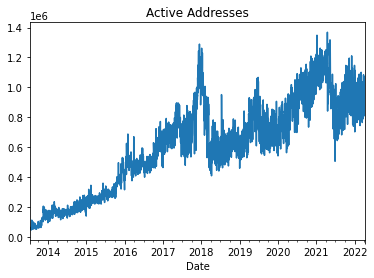

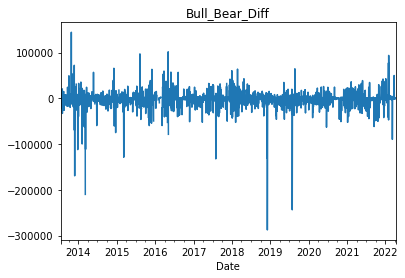

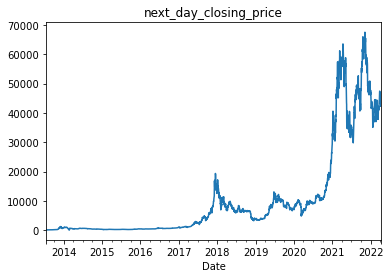

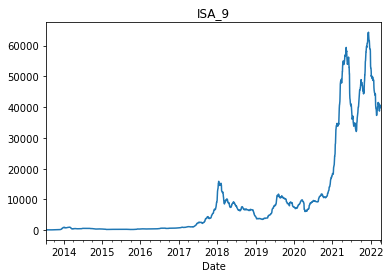

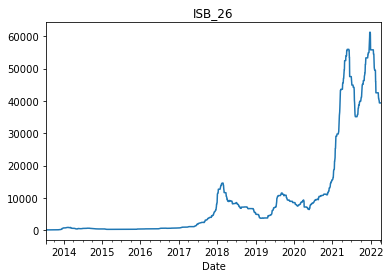

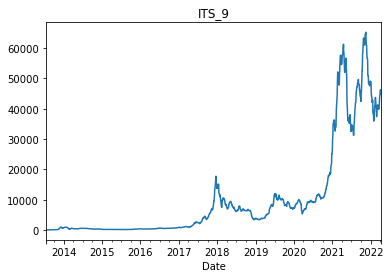

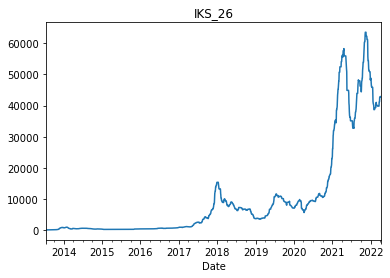

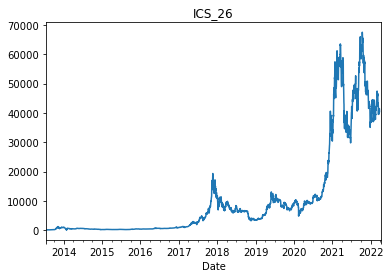

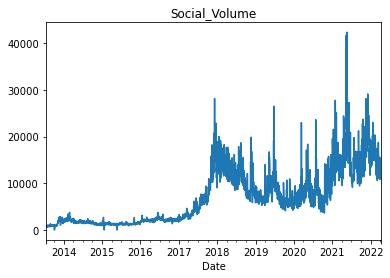

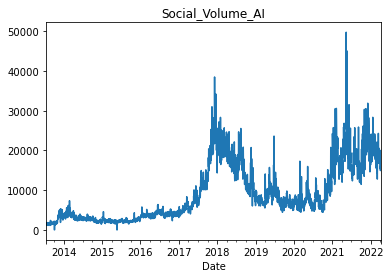

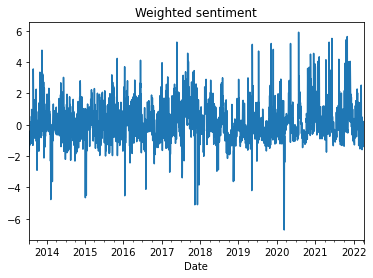

In [85]:
for i, col in enumerate(final_df.columns):
    final_df[col].plot(fig=plt.figure(i))
    plt.title(col)

plt.show()

In [79]:
# NO TENEMOS DATOS DE FUTUROS Y DE INDICES ALTERNATIVOS DE CRYPTOMONEDAS A TAN LARGO PLAZO, LO QUITAMOS
BDM 
FUT BTC 
FUT ALT

SyntaxError: invalid syntax (Temp/ipykernel_10012/3245795407.py, line 3)

## Missing Value Imputation

In [94]:
missing_values = pd.DataFrame(final_df.isna().sum(),columns=['missing_count'])
missing_values.sort_values(by='missing_count',ascending=False)

missing_count
FUTALT                                   2194
BDM_spot                                 1851
FUTBTC                                   1650
bc_volatility                            1264
lbma_gold                                 993
DXY_spot                                  986
SP500_spot                                985
VIX_spot                                  985
ETH_spot                                  967
FUTDXY                                    929
MSCIACW_spot                              907
FUTVIX                                    891
FUTWTI                                    888
FUTGOLD                                   880
FUT500                                    877
WTI_spot                                  722
Bull_Bear_Diff                             93
active_addresses                           22
top100_to_total_percentage                  6
in_out_ratio_adj                            3
profit_losses_ratio_adj                     1
avg_block_time                              1
ITS_9                                       0
Social_Volume_AI                            0
Social_Volume                               0
ICS_26                                      0
IKS_26                                      0
New Addresses                               0
ISB_26                                      0
ISA_9                                       0
ST_UTXOs                                    0
tx_volume_USD_adj                           0
Number of Transactions                      0
large_tx_volume_USD_adj                     0
Active Addresses                            0
large_holders_netflow                       0
next_day_closing_price                      0
opening_price                               0
highest_price                               0
miner_revenue                               0
lowest_price                                0
closing_price                               0
transactions_in_blockchain                  0
avg_block_size                              0
sent_by_adress                              0
avg_mining_difficulty                       0
avg_hashrate                                0
mining_profitability                        0
sent_coins_in_usd                           0
avg_transaction_fees                        0
median_transaction_fees                     0
avg_transaction_value                       0
median_transaction_value                    0
google_trends                               0
avg_fee_to_reward                           0
avg_price_usd                               0
market_cap_usd                              0
sf_ratio                                    0
number_of_coins_in_circulation              0
Weighted sentiment                          0

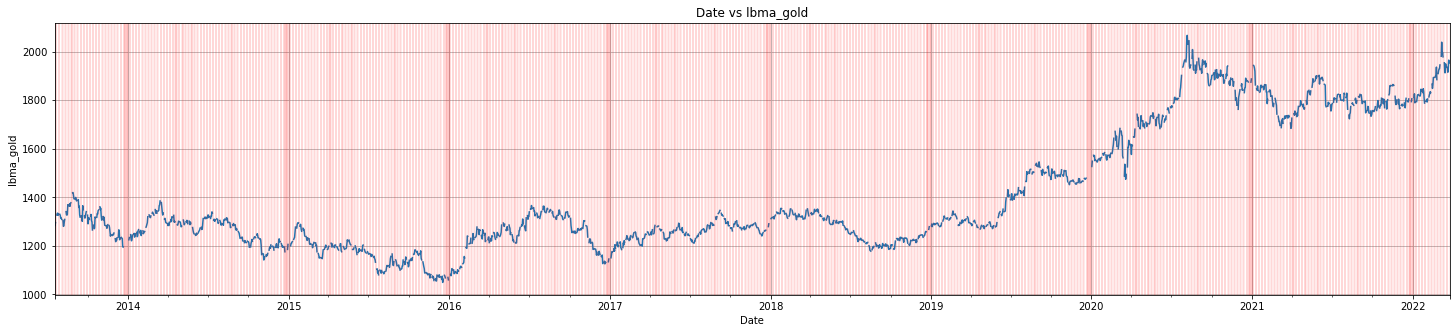

In [95]:
# For quoted values in which weekends and US national holidays are missing we use bfill() so that the last value is remembered
final_df['lbma_gold'].plot(x=final_df.index,y='lbma_gold',figsize=(25,5),grid=True)
for i in list(final_df.loc[pd.isna(final_df['lbma_gold']), :].index):
    plt.axvline(x=i,color='r',alpha=0.1)
plt.ylabel('lbma_gold')
plt.title('Date vs lbma_gold')
plt.show()


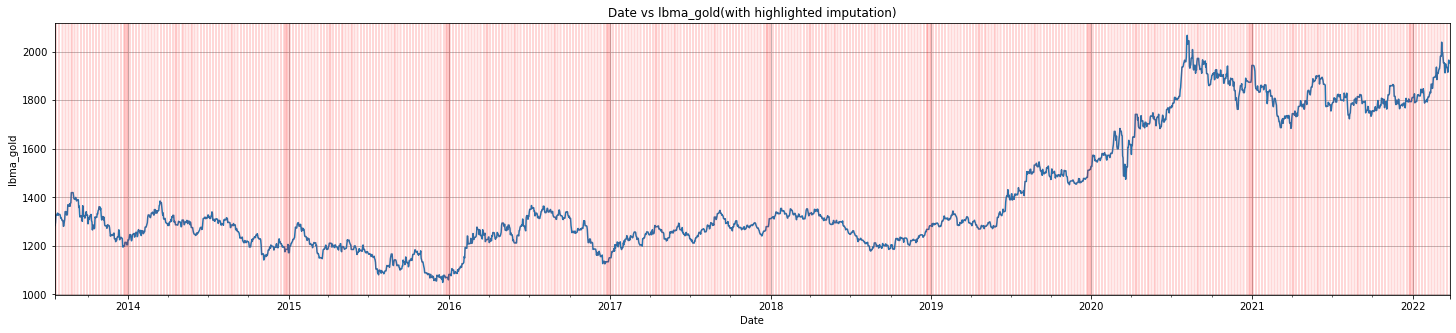

In [96]:
final_df['lbma_gold'].fillna(final_df['lbma_gold'].bfill().astype(float)).plot(x=final_df.index,y='lbma_gold',figsize=(25,5),grid=True)
for i in list(final_df.loc[pd.isna(final_df['lbma_gold']), :].index):
    plt.axvline(x=i,color='r',alpha=0.1)
plt.ylabel('lbma_gold')
plt.title('Date vs lbma_gold(with highlighted imputation)')
plt.show()


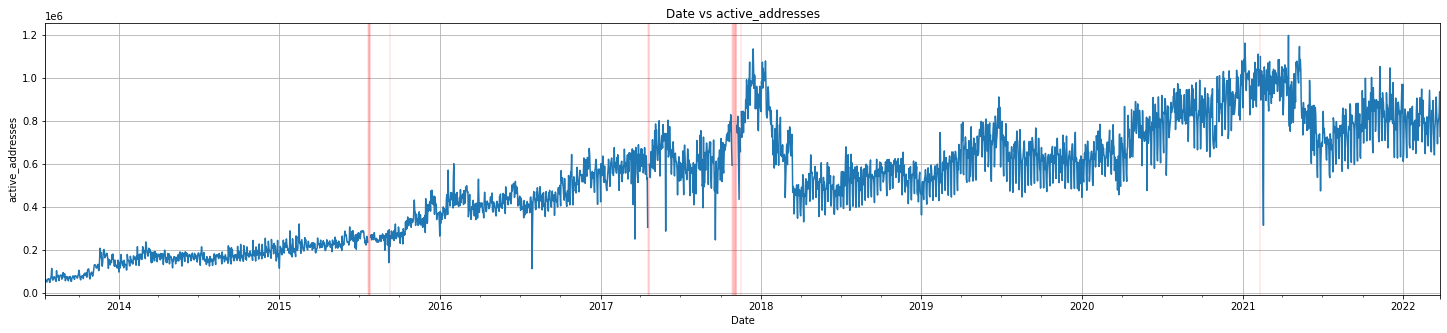

In [97]:
# For missing values we will use the rolling average with interpolate so that we take a 7 days window linear filling

final_df['active_addresses'].plot(x=final_df.index,y='active_addresses',figsize=(25,5),grid=True)
for i in list(final_df.loc[pd.isna(final_df['active_addresses']),:].index):
    plt.axvline(x=i,color='r',alpha=0.1)
plt.ylabel('active_addresses')
plt.title('Date vs active_addresses')
plt.show()

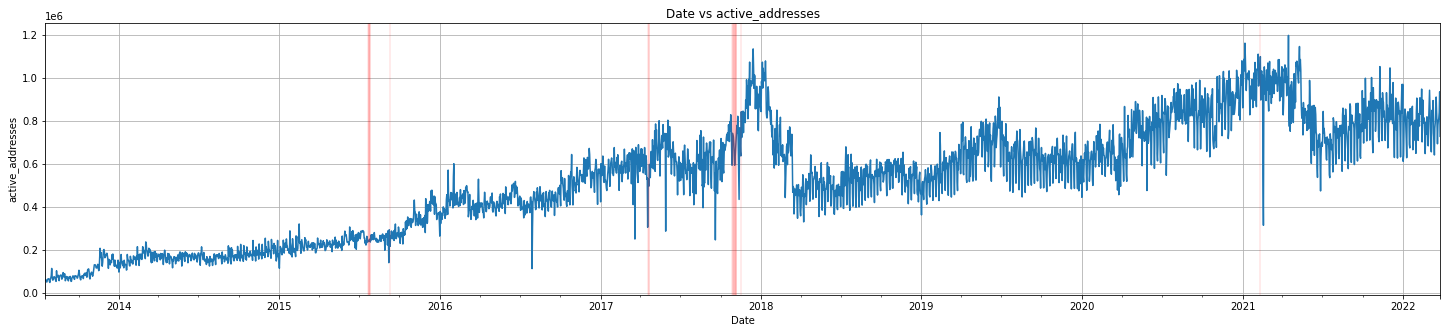

In [98]:
final_df['active_addresses'].fillna(final_df['active_addresses'].rolling(7, min_periods=1).mean().interpolate()).astype(float).plot(x=final_df.index,y='telegram_positive_ratio_adj',figsize=(25,5),grid=True)
for i in list(final_df.loc[pd.isna(final_df['active_addresses']),:].index):
    plt.axvline(x=i,color='r',alpha=0.1)
plt.ylabel('active_addresses')
plt.title('Date vs active_addresses')
plt.show()


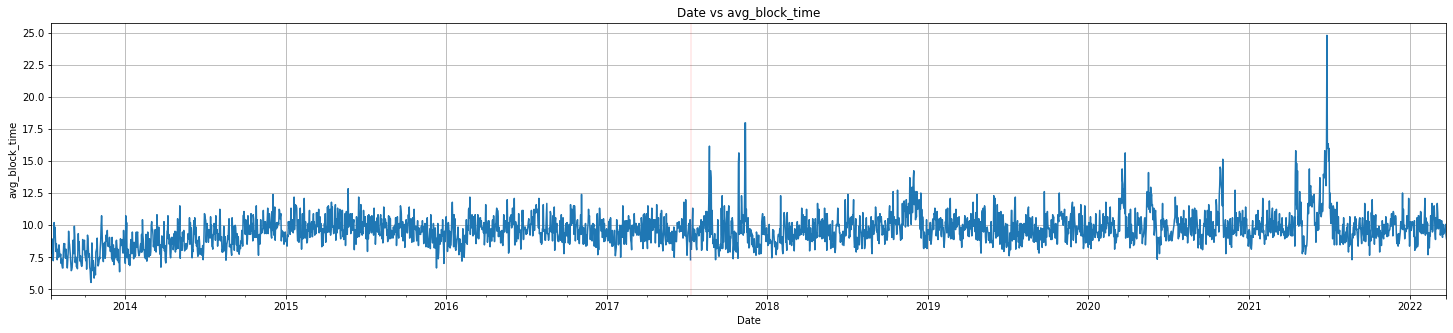

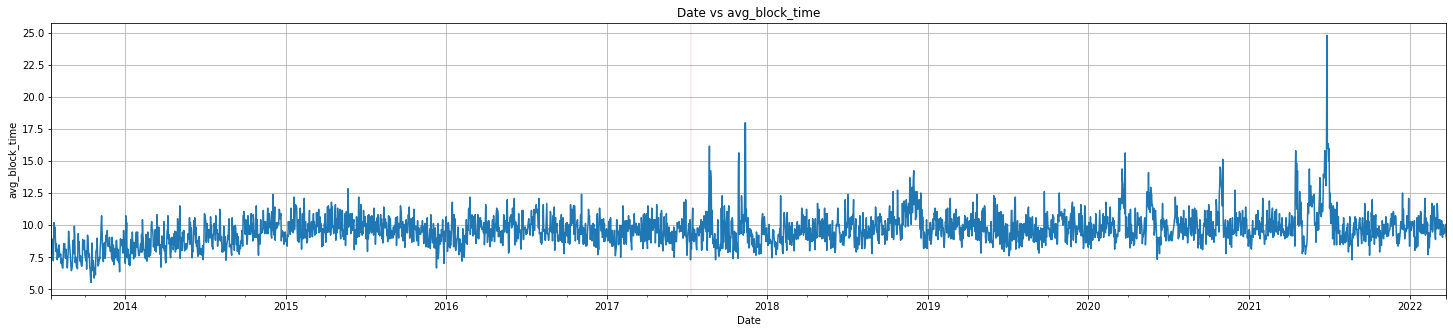

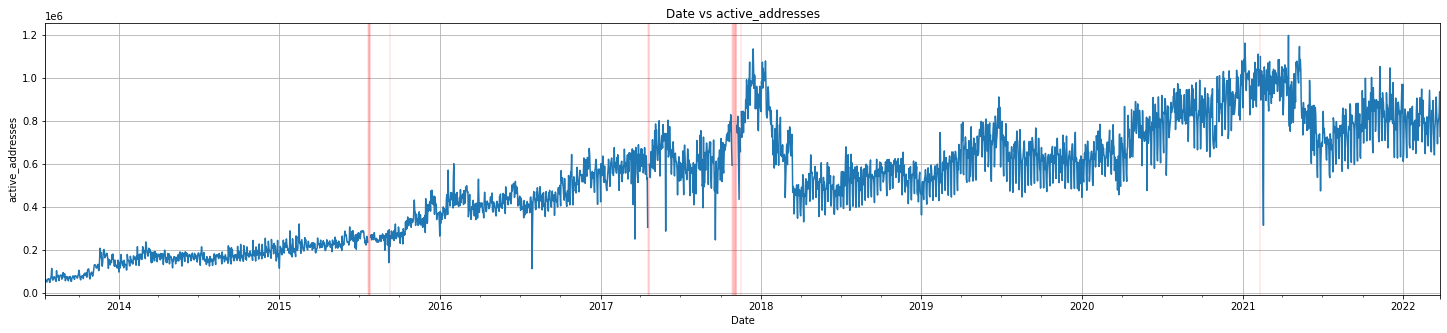

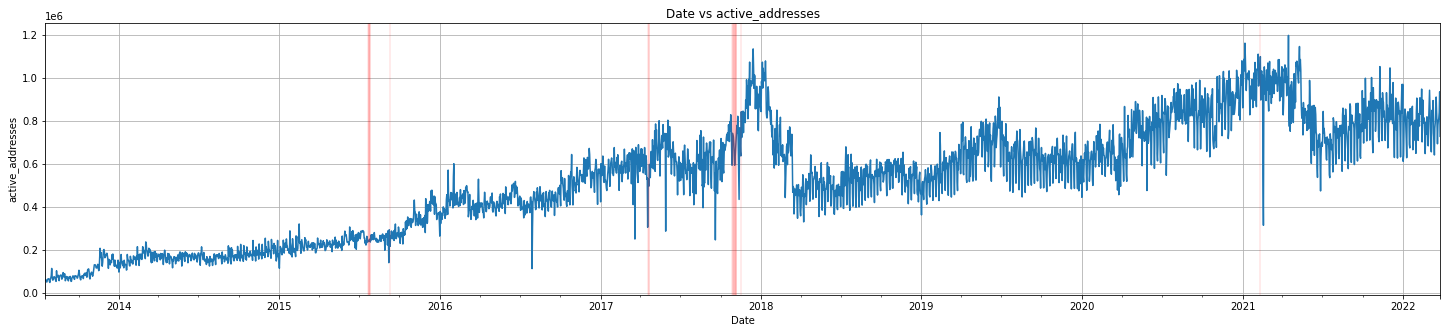

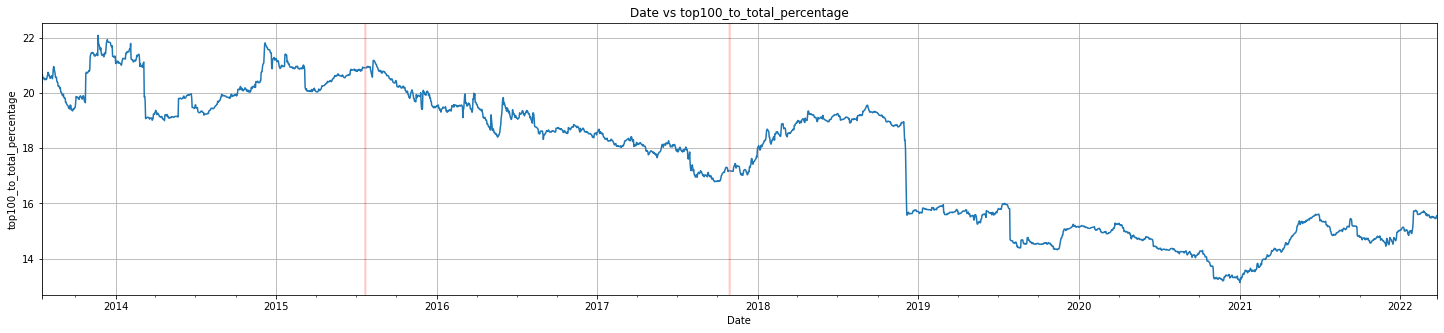

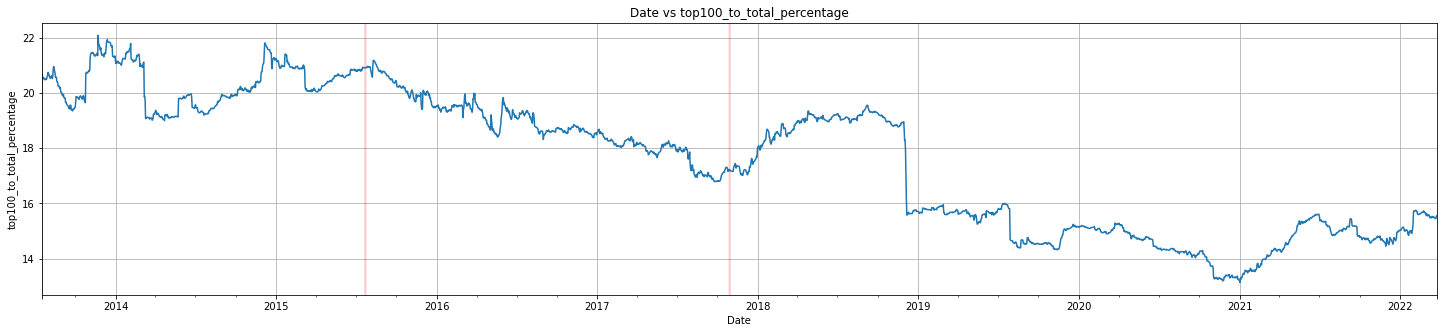

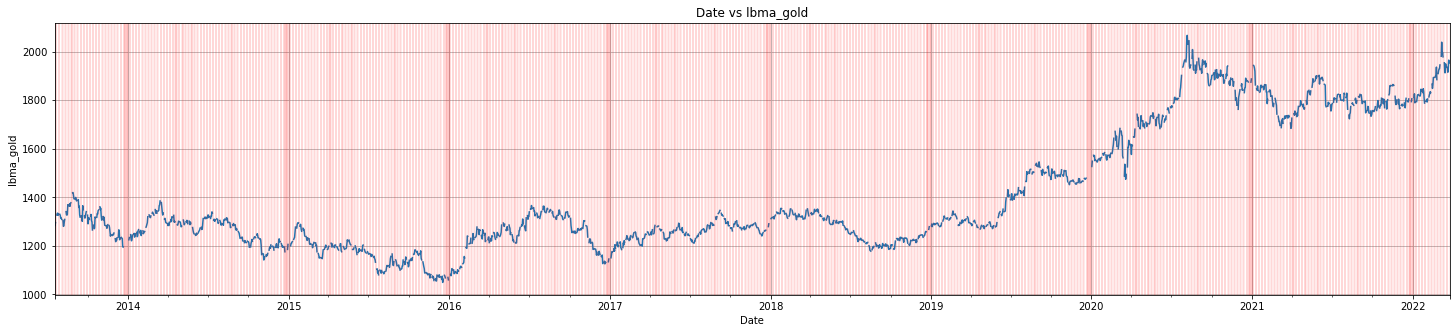

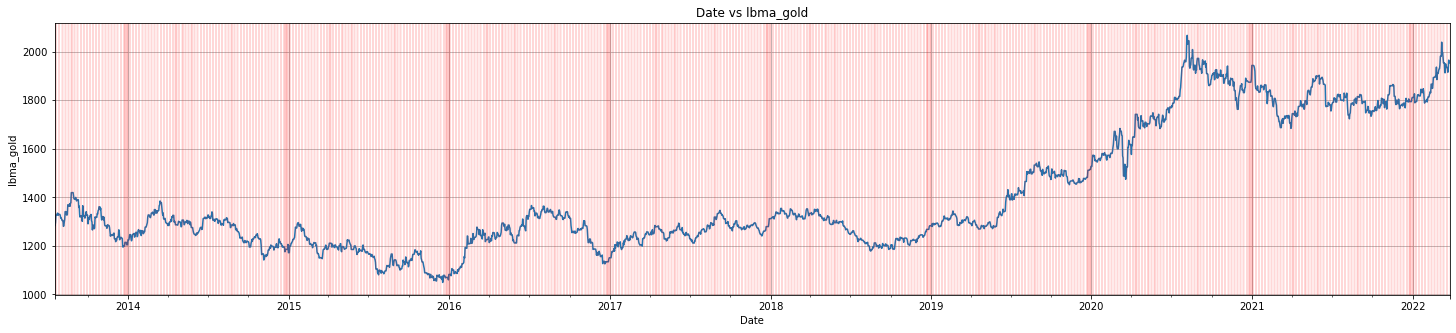

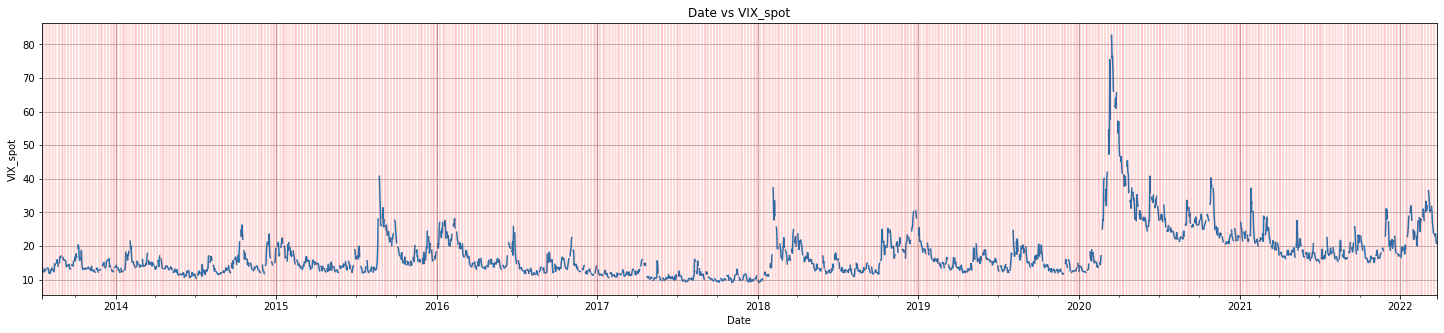

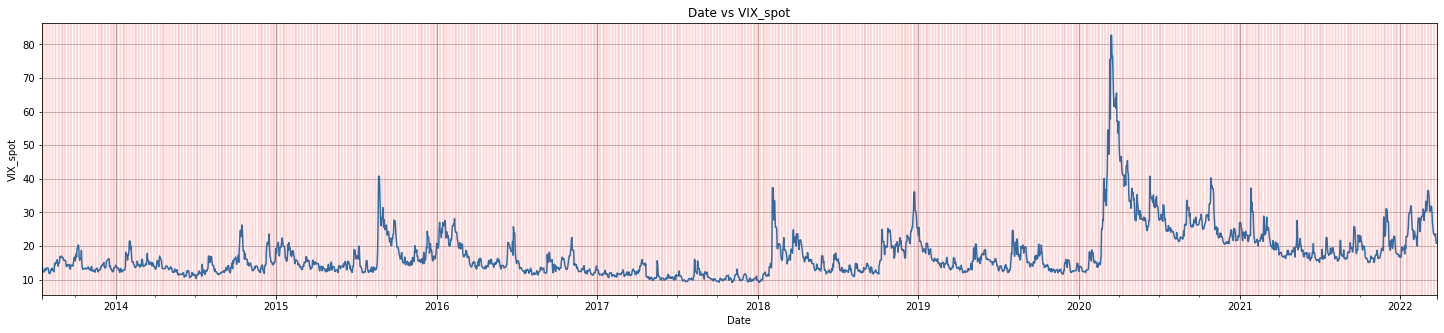

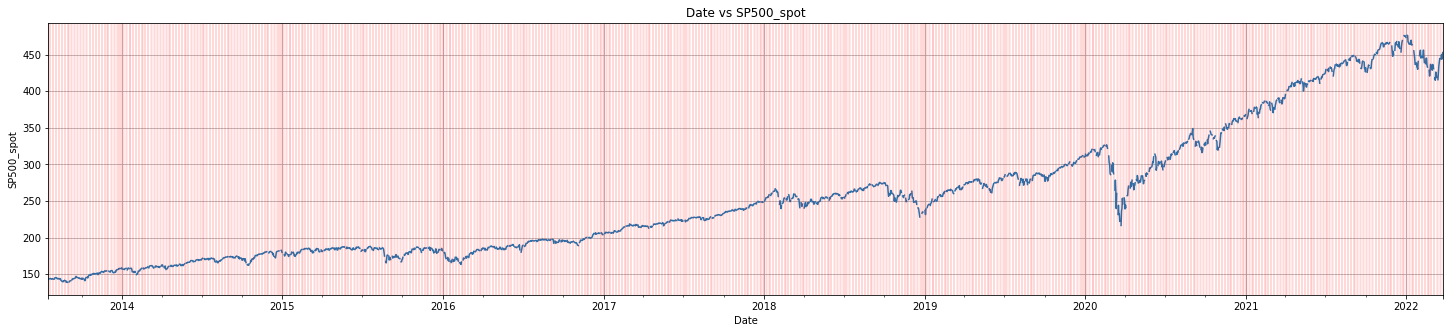

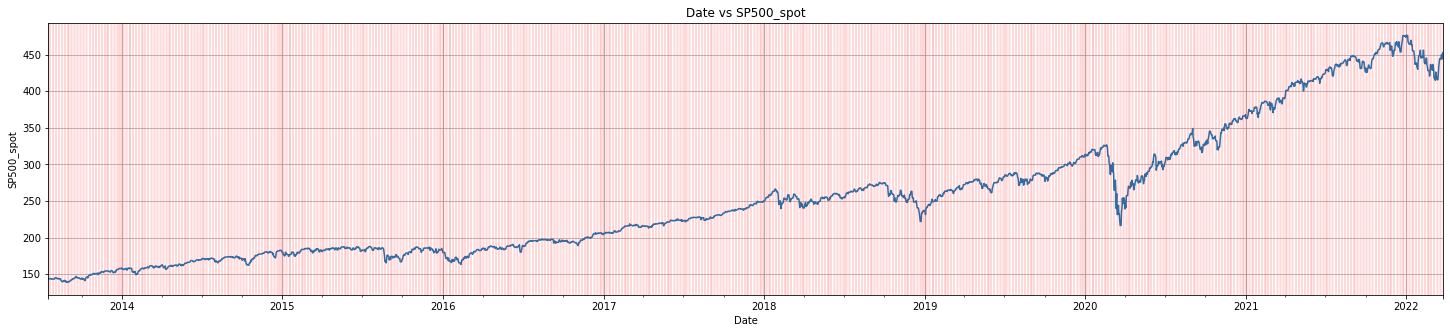

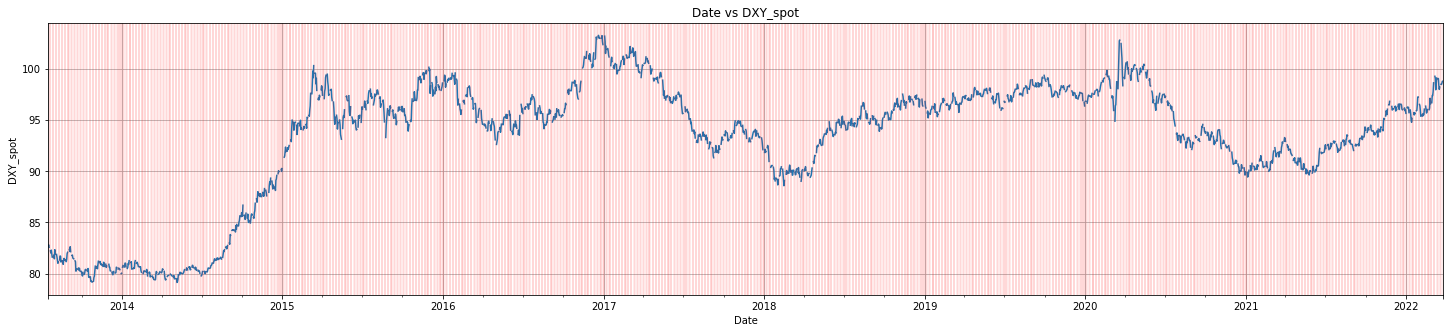

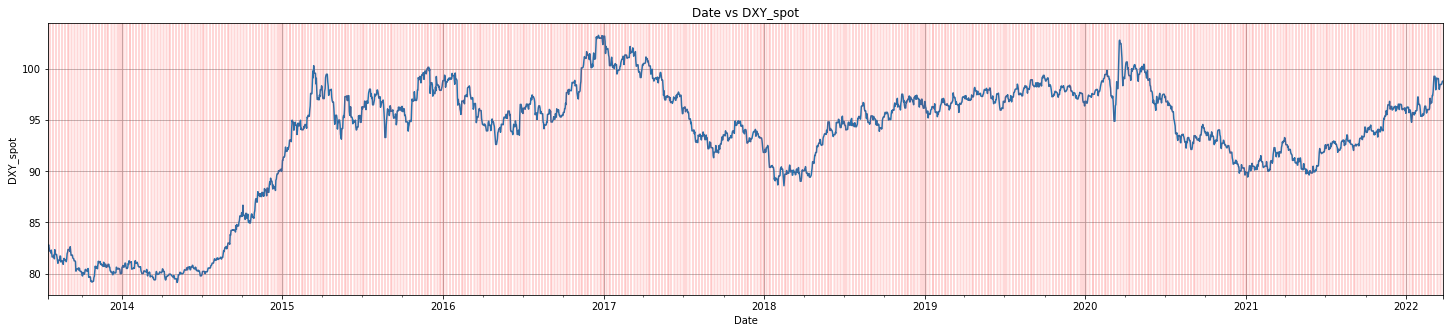

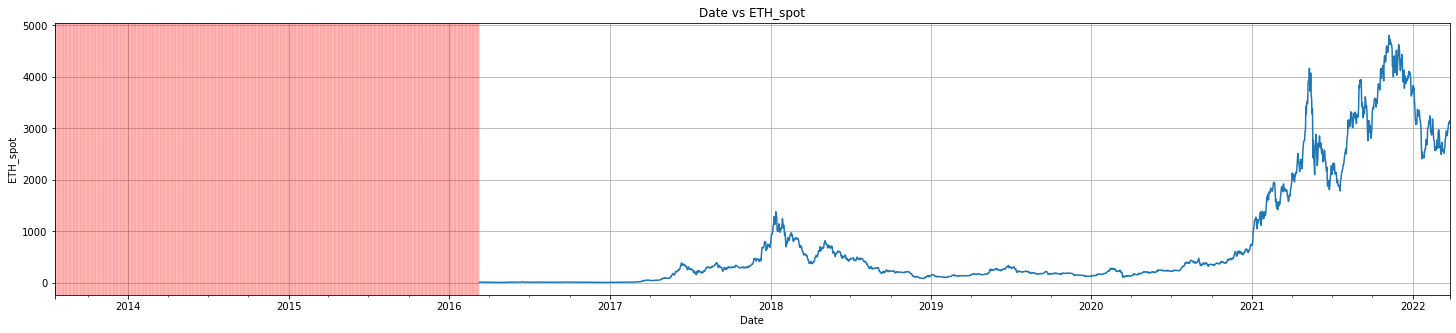

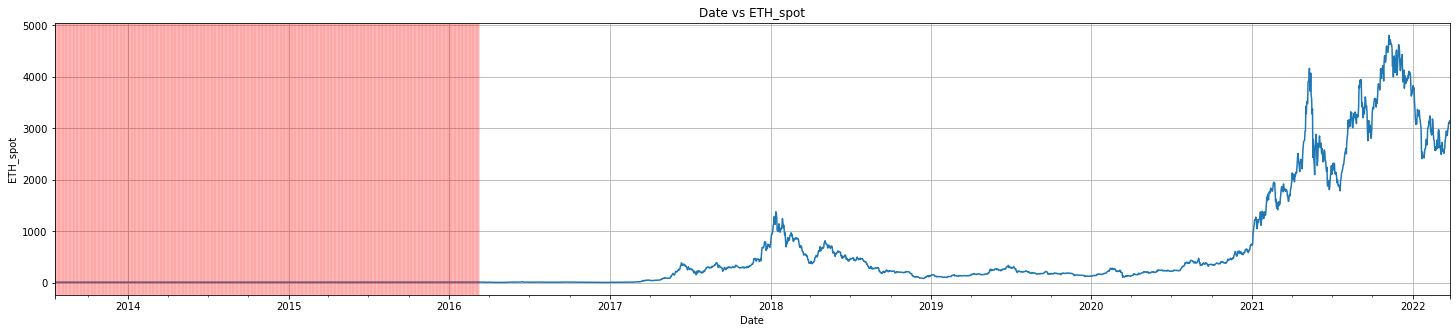

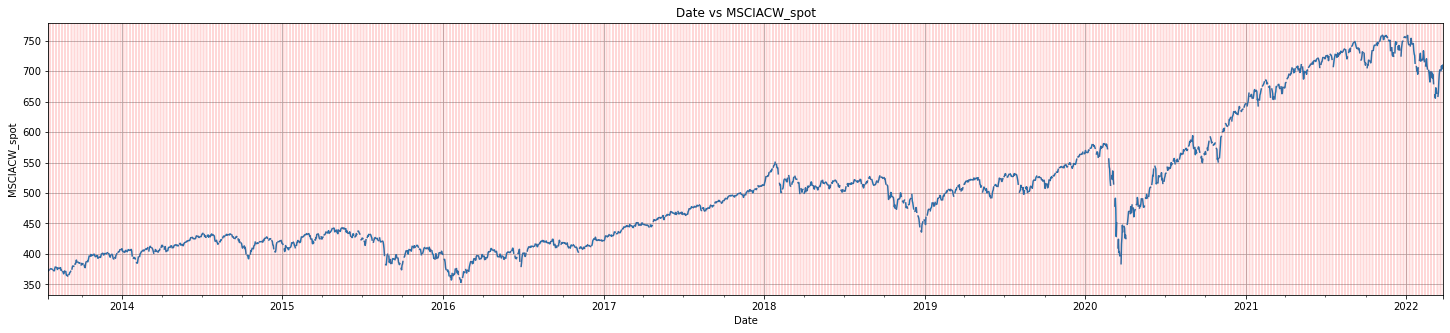

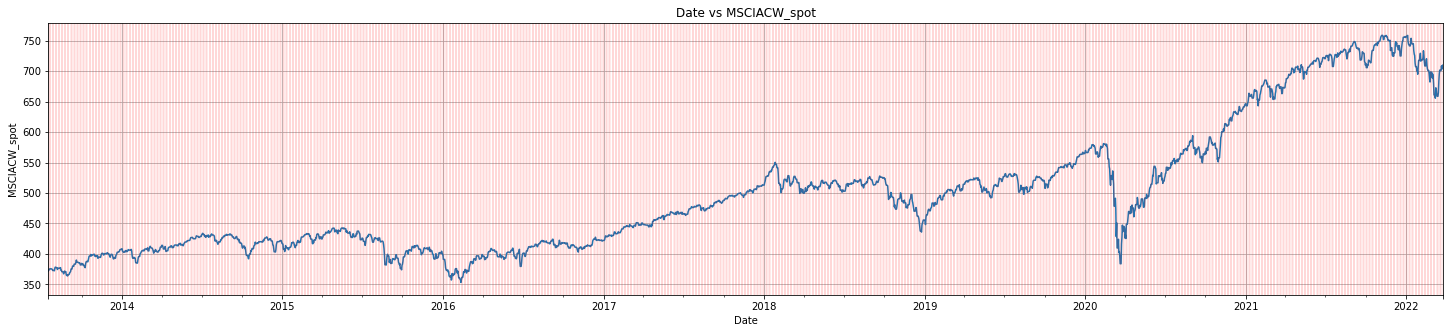

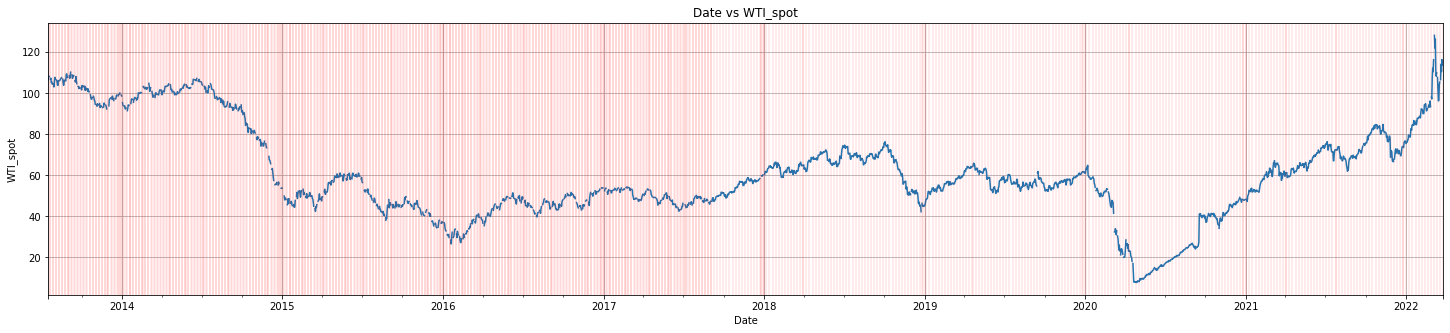

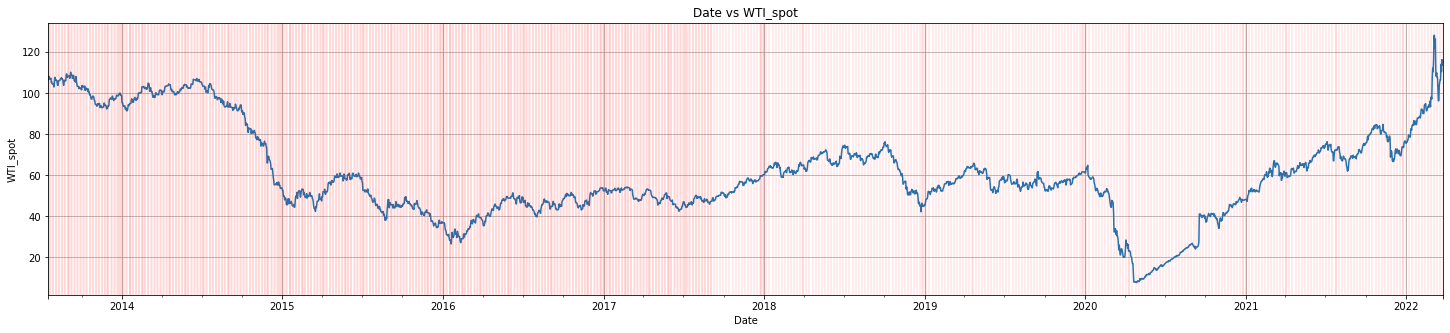

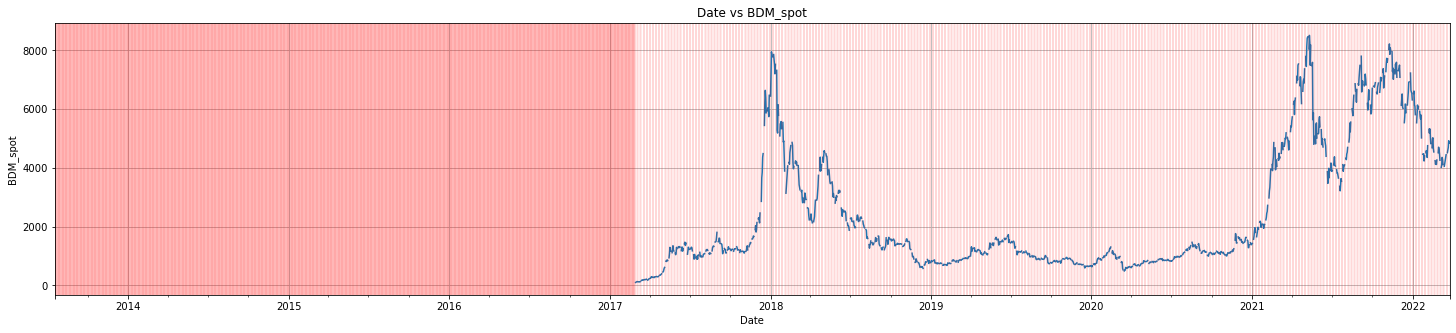

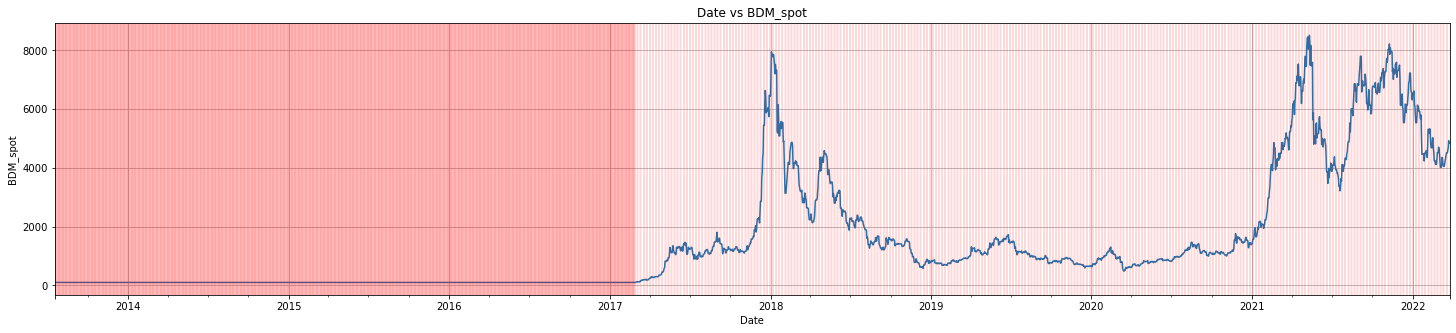

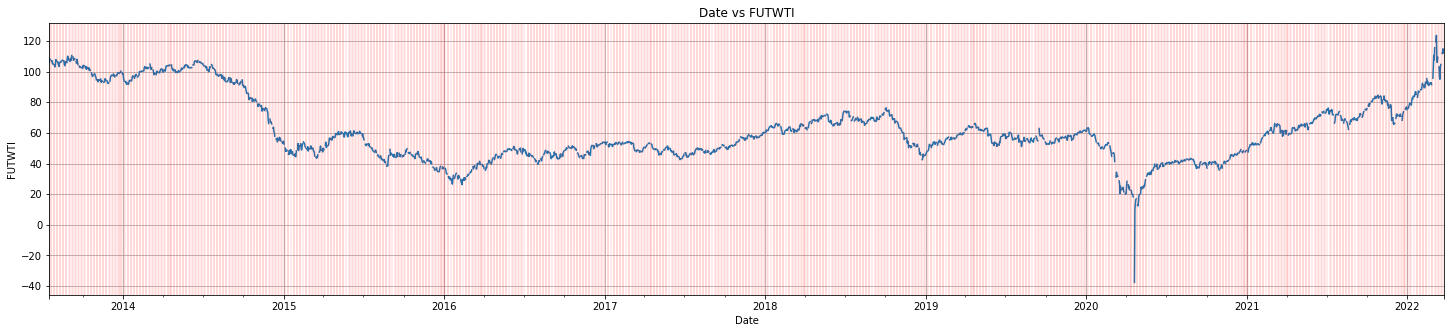

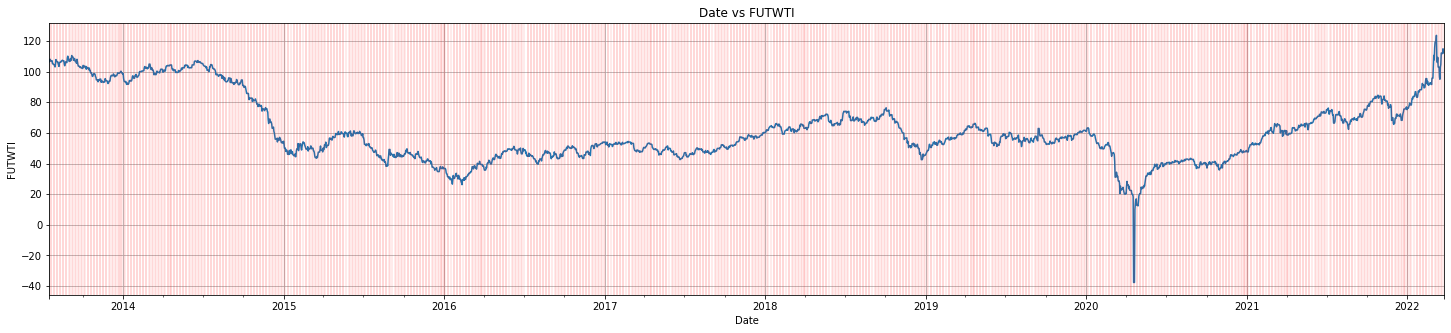

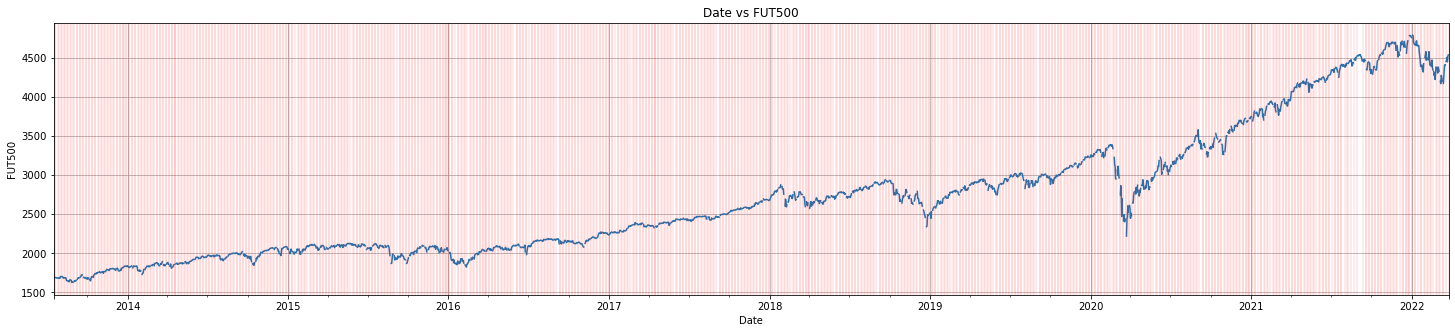

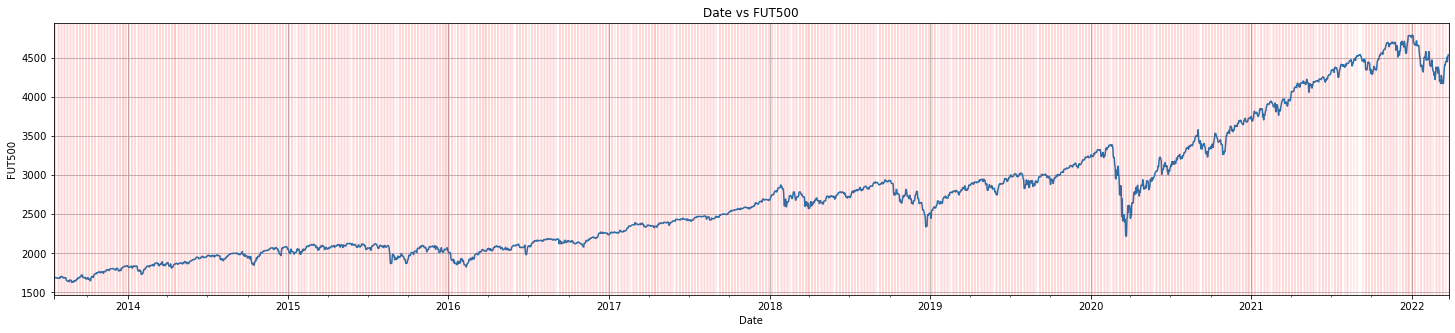

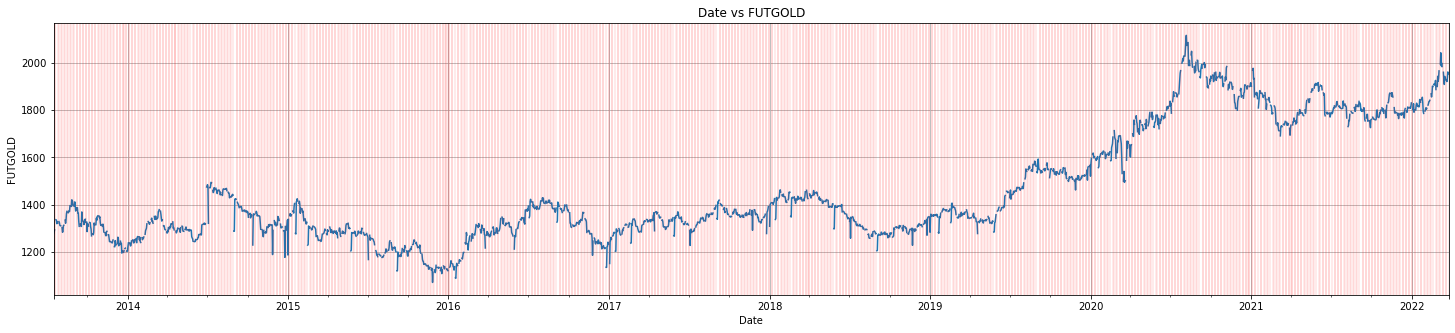

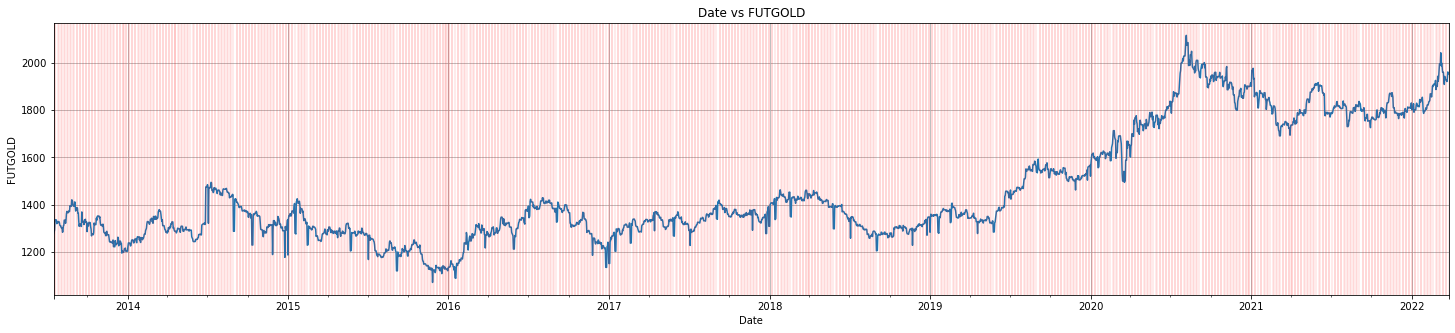

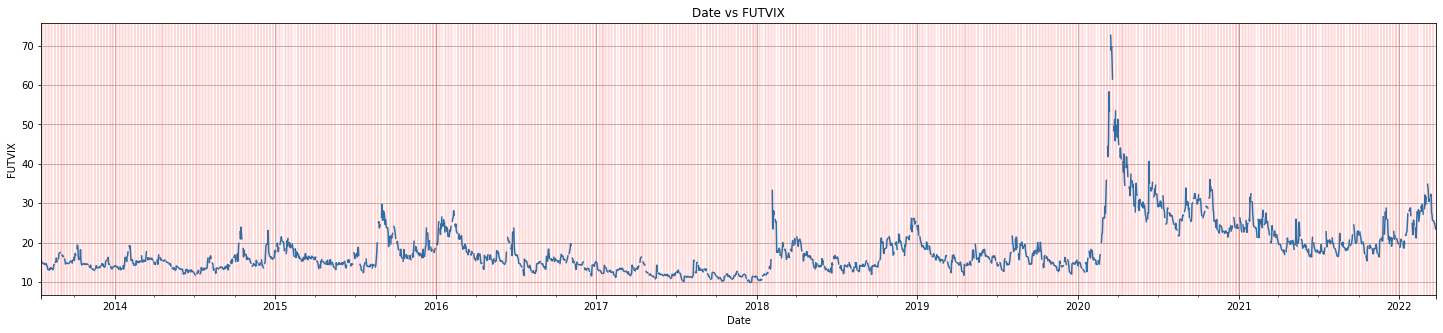

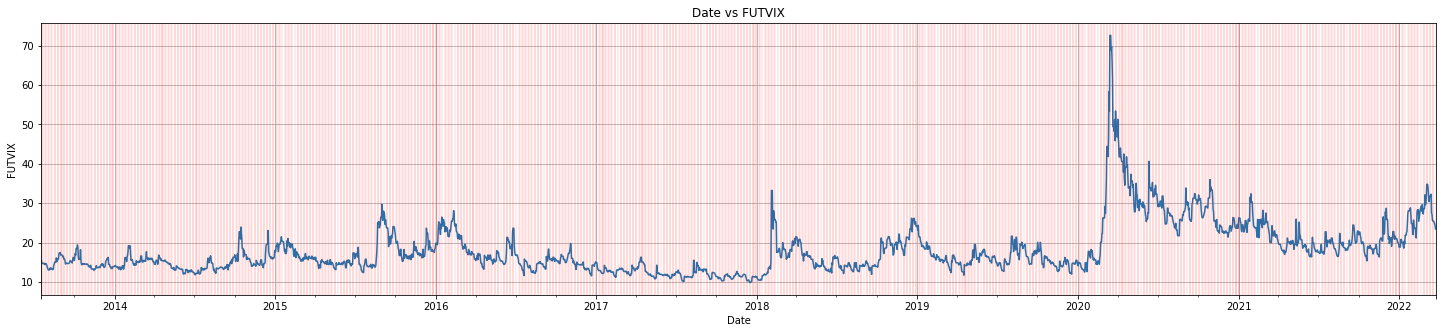

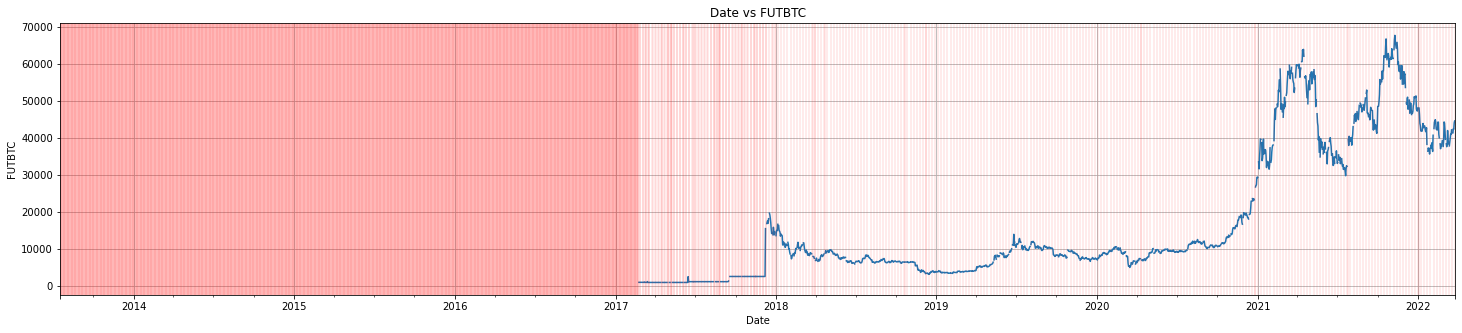

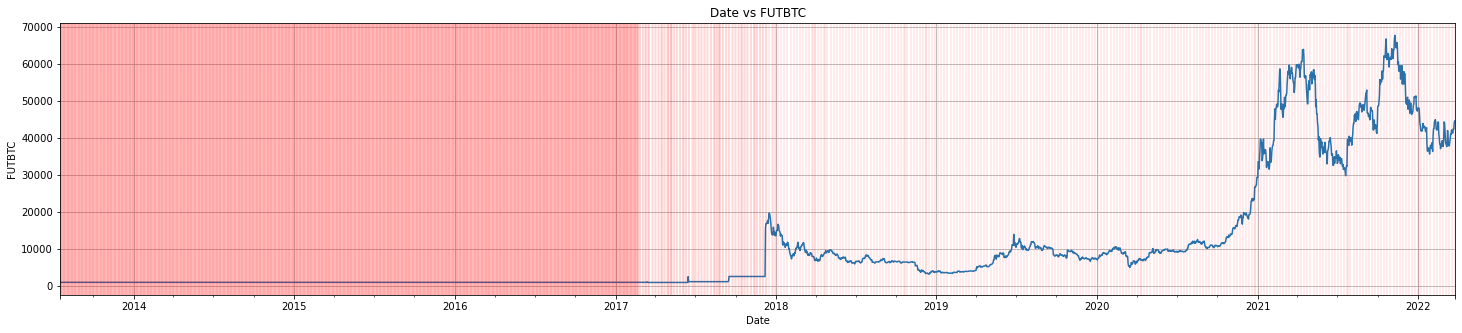

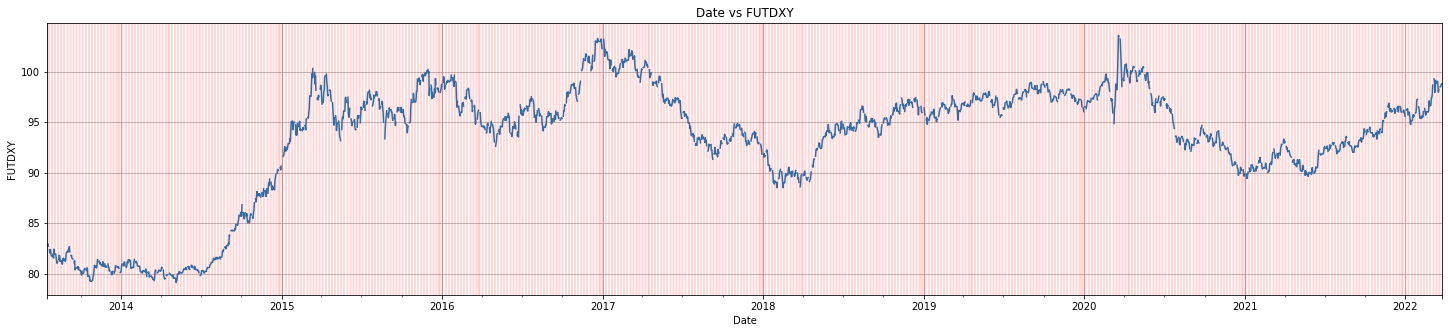

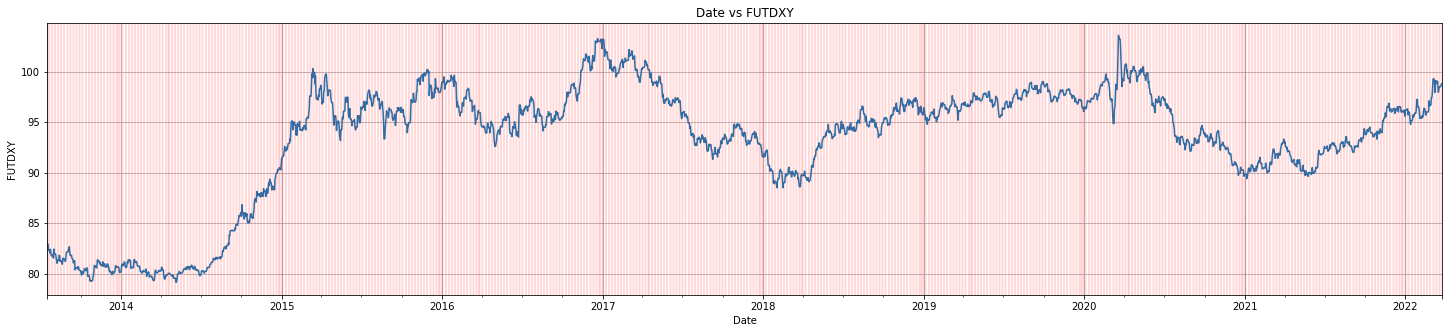

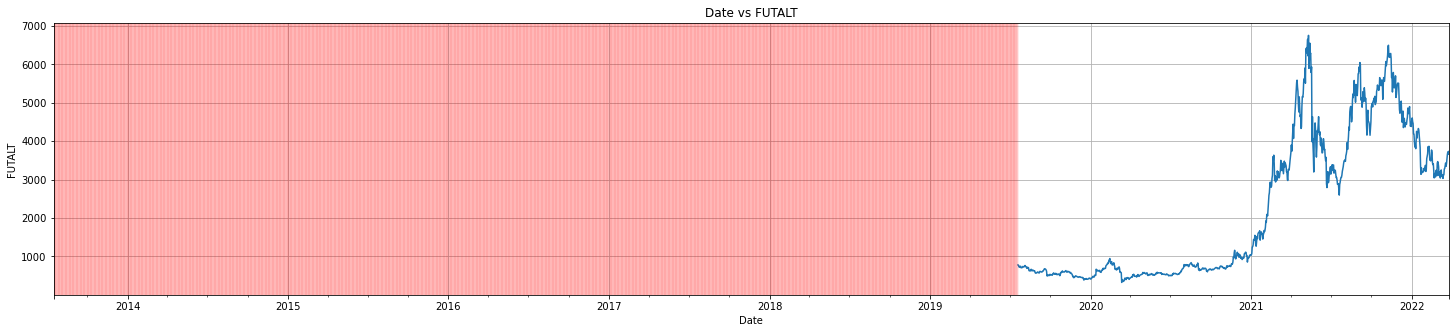

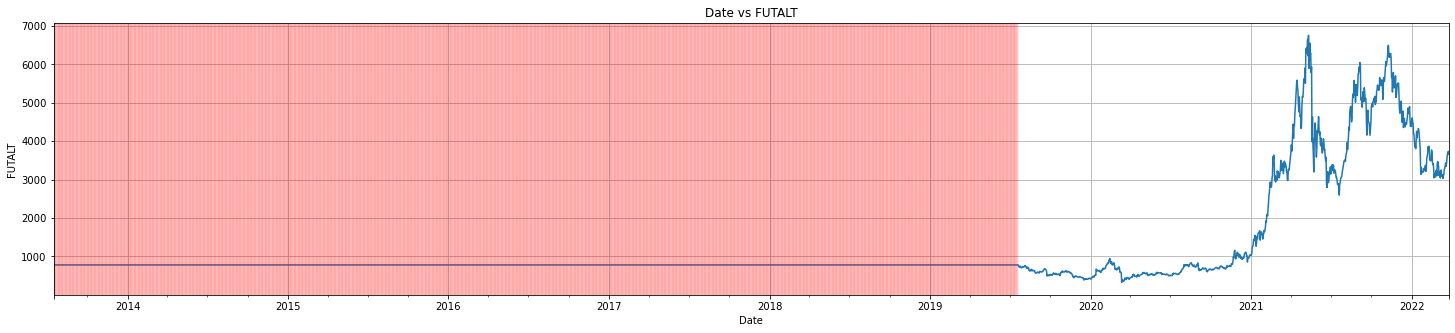

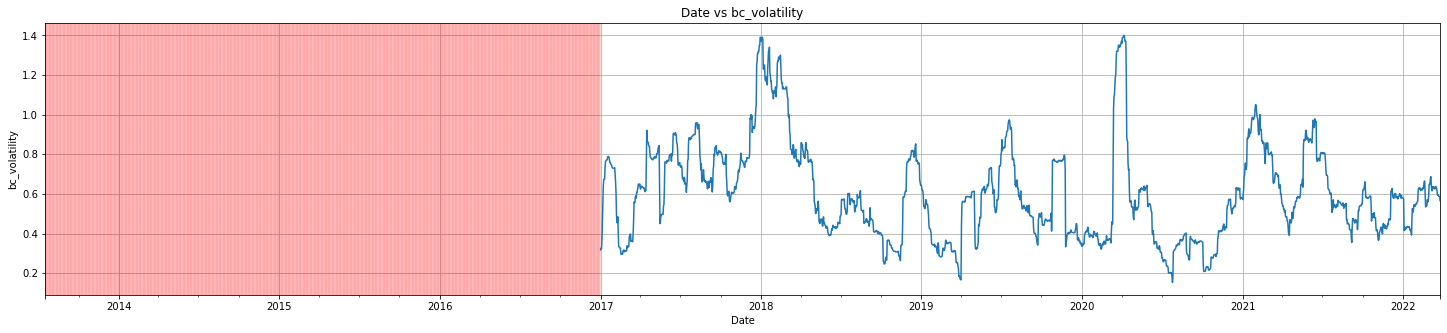

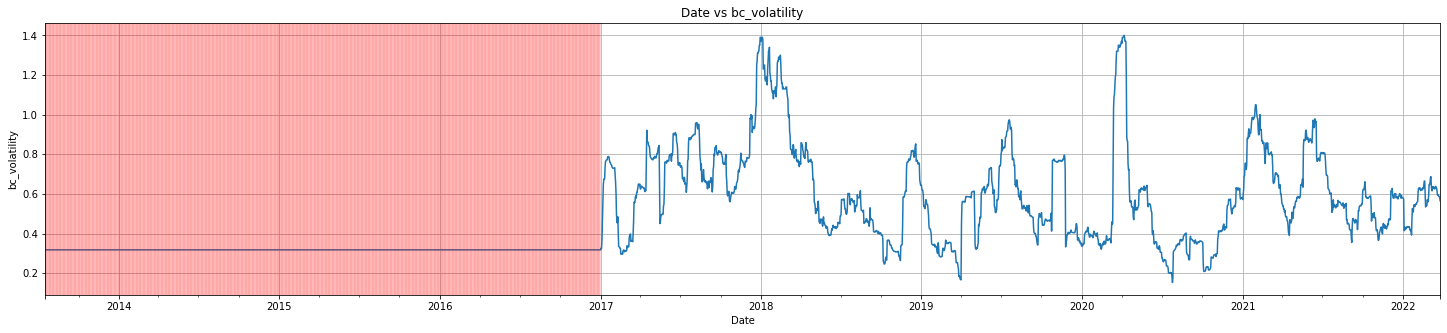

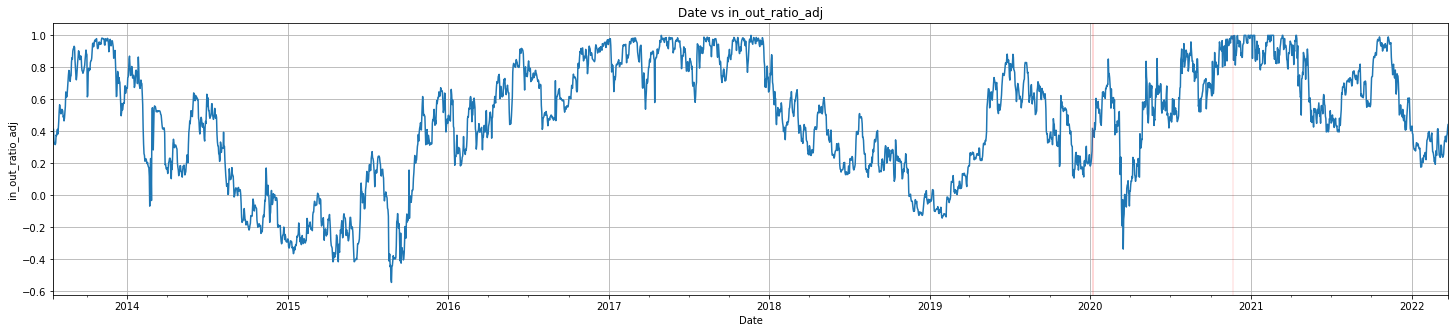

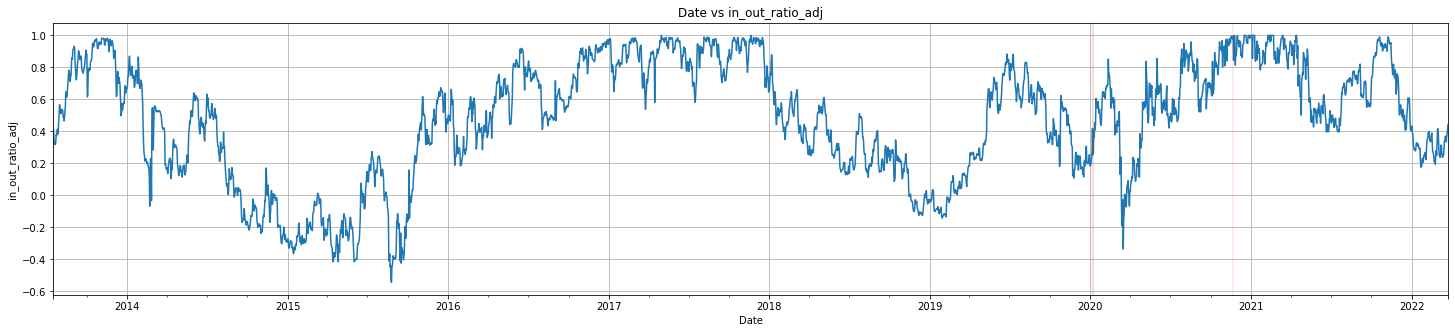

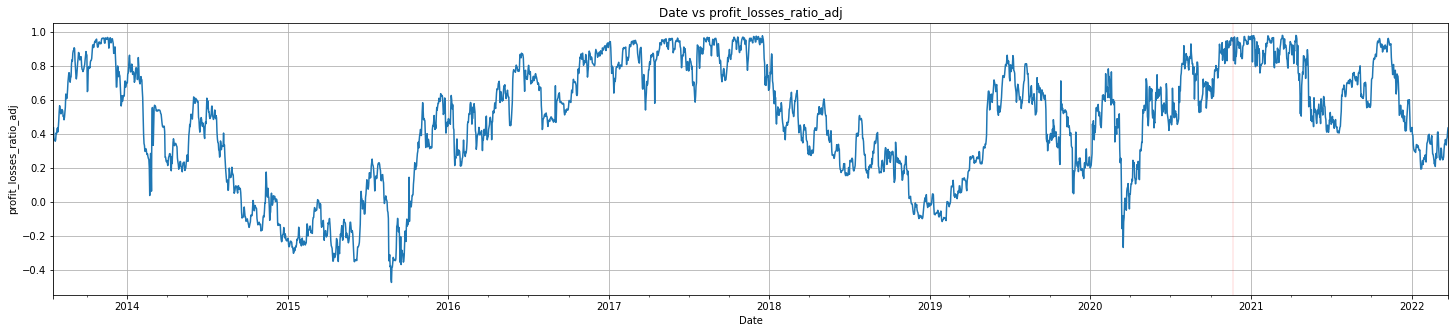

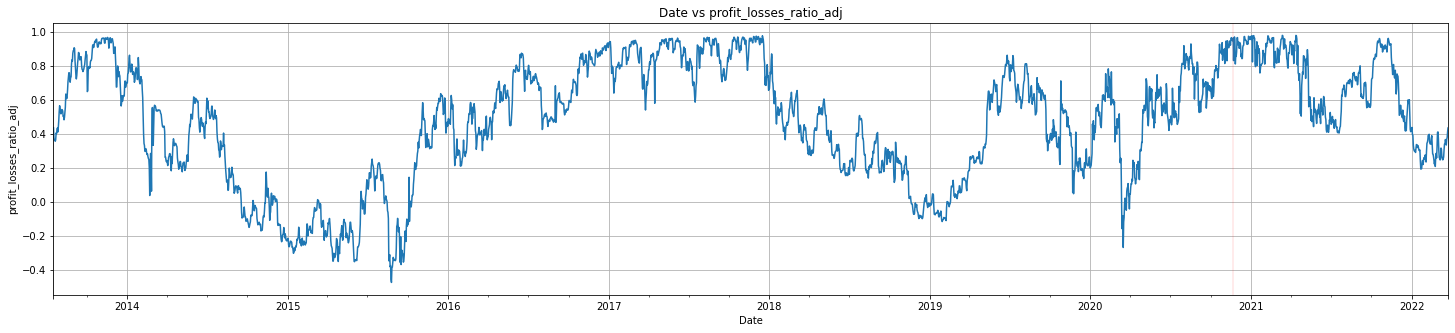

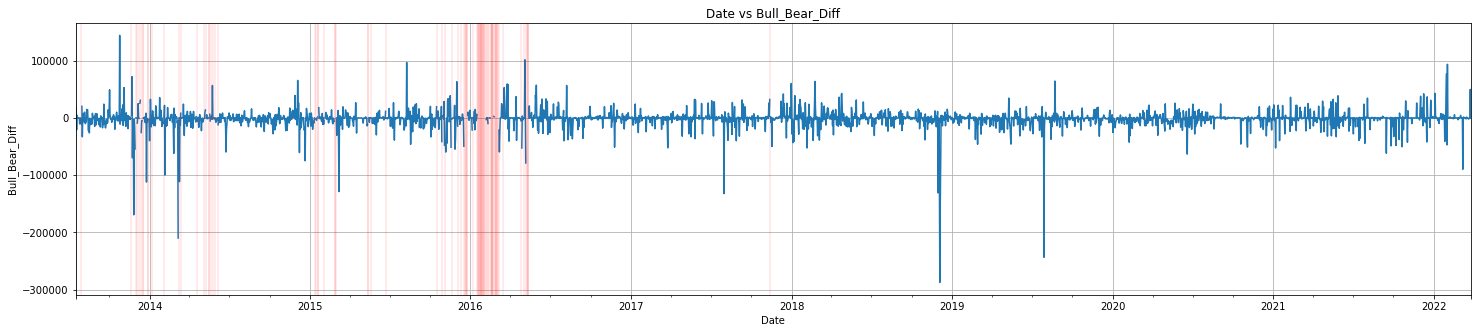

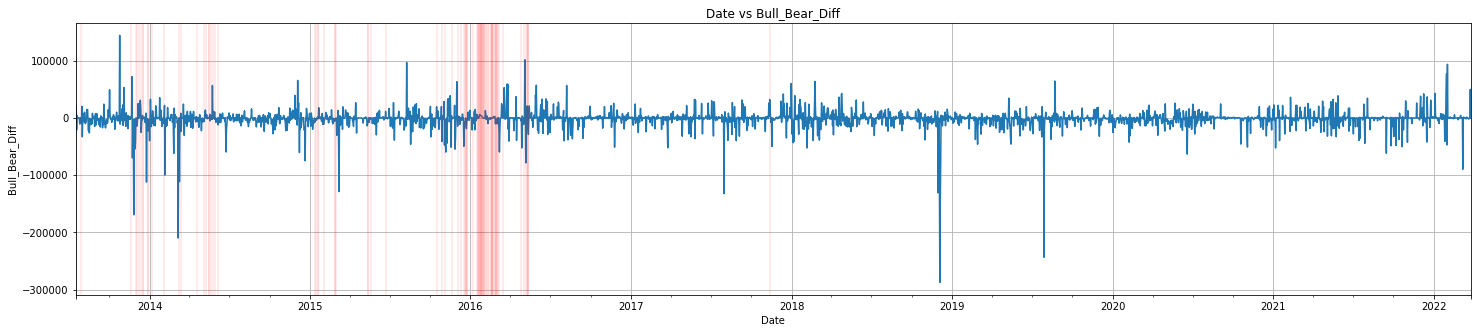

In [99]:
for col in final_df.columns:
    if final_df[col].isna().sum() > 100: # > 100 so that we take the quoted features in which weekends are missing
        
        final_df[col].plot(x=final_df.index,y=col,figsize=(25,5),grid=True)
        for i in list(final_df.loc[pd.isna(final_df[col]),:].index):
            plt.axvline(x=i,color='r',alpha=0.1)
        plt.ylabel(col)
        plt.title('Date vs ' + col)
        plt.show()
        
        final_df[col].fillna(final_df[col].bfill()).plot(x=final_df.index,y=col,figsize=(25,5),grid=True)
        for i in list(final_df.loc[pd.isna(final_df[col]),:].index):
            plt.axvline(x=i,color='r',alpha=0.1)
        plt.ylabel(col)
        plt.title('Date vs ' + col)
        plt.show()
        
        final_df[col] = final_df[col].fillna(final_df[col].bfill())
    
    elif final_df[col].isna().sum() > 0:
        
        final_df[col].plot(x=final_df.index,y=col,figsize=(25,5),grid=True)
        for i in list(final_df.loc[pd.isna(final_df[col]),:].index):
            plt.axvline(x=i,color='r',alpha=0.1)
        plt.ylabel(col)
        plt.title('Date vs ' + col)
        plt.show()
        
        
        final_df[col].fillna(final_df[col].rolling(7, min_periods=1).mean().interpolate()).astype(float).plot(x=final_df.index,y=col,figsize=(25,5),grid=True)
        for i in list(final_df.loc[pd.isna(final_df[col]),:].index):
            plt.axvline(x=i,color='r',alpha=0.1)
        plt.ylabel(col)
        plt.title('Date vs ' + col)
        plt.show()
        
        final_df[col] = final_df[col].fillna(final_df[col].rolling(7, min_periods=1).mean().interpolate())
        
        

In [105]:
final_df.drop(final_df.tail(1).index,inplace=True)
missing_values = pd.DataFrame(final_df.isna().sum(),columns=['missing_count'])
missing_values.sort_values(by='missing_count',ascending=False)

missing_count
opening_price                               0
highest_price                               0
BDM_spot                                    0
FUTWTI                                      0
FUT500                                      0
FUTGOLD                                     0
FUTVIX                                      0
FUTBTC                                      0
FUTDXY                                      0
FUTALT                                      0
bc_volatility                               0
ST_UTXOs                                    0
tx_volume_USD_adj                           0
Number of Transactions                      0
large_tx_volume_USD_adj                     0
large_holders_netflow                       0
in_out_ratio_adj                            0
profit_losses_ratio_adj                     0
New Addresses                               0
Active Addresses                            0
Bull_Bear_Diff                              0
next_day_closing_price                      0
ISA_9                                       0
ISB_26                                      0
ITS_9                                       0
IKS_26                                      0
ICS_26                                      0
Social_Volume                               0
Social_Volume_AI                            0
WTI_spot                                    0
MSCIACW_spot                                0
ETH_spot                                    0
avg_transaction_value                       0
lowest_price                                0
closing_price                               0
transactions_in_blockchain                  0
avg_block_size                              0
sent_by_adress                              0
avg_mining_difficulty                       0
avg_hashrate                                0
mining_profitability                        0
sent_coins_in_usd                           0
avg_transaction_fees                        0
median_transaction_fees                     0
avg_block_time                              0
median_transaction_value                    0
DXY_spot                                    0
google_trends                               0
active_addresses                            0
top100_to_total_percentage                  0
avg_fee_to_reward                           0
avg_price_usd                               0
market_cap_usd                              0
sf_ratio                                    0
number_of_coins_in_circulation              0
miner_revenue                               0
lbma_gold                                   0
VIX_spot                                    0
SP500_spot                                  0
Weighted sentiment                          0

In [103]:
# We will drop telegram number of tweets as there is a very big increase in 2020 that I'm not able to explain and may impact the model



Date
2013-07-17    372.00
2013-07-18    373.62
2013-07-19    373.85
2013-07-20    375.56
2013-07-21    375.56
               ...  
2022-03-22    708.21
2022-03-23    703.14
2022-03-24    708.82
2022-03-25    709.58
2022-03-26       NaN
Name: MSCIACW_spot, Length: 3175, dtype: float64

In [106]:
final_df.to_csv('data/final_df.csv')